In [1]:
# load libraies

%run py_libraries.py

/Users/4476224/.local/lib/python3.8/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.6.0 and strictly below 2.9.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.13.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
# loading utility files

from utility.sv_fig import savefig
from utility.make_cm import make_confusion_matrix
from utility.get_g_result import get_gamma_results
from utility.plt_result import plot_results

In [3]:
def savefig(filename, crop = True):
    plt.savefig('{}.pdf'.format(filename))

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)

# load data
data = pd.read_excel('data/PDAC_data_04_24.xlsx')
data = data.loc[0:317]

print(data.shape)

(318, 156)


In [5]:
Ndata = data[['DATSTAT_ALTPID', 'CACHEX_STAGE_0_VIG', 'GENDER','BMI','RACE_ETHN', \
              'ENA.78_T1', 'IFN.y_T1', 'IL.10_T1', 'IL.1B_T1', 'IL.6_T1', 'IL.8_T1', 'MCP.1_T1', \
              'MDC_T1', 'MIP.1a_T1', 'TNF.a_T1', 'C.peptide_T1', 'G.CSF_T1', 'IL.1a_T1', 'IL.22_T1', \
              'Insulin_T1', 'Leptin_T1', 'MIP.3a_T1', 'GRO.a_T1', 'HGF_T1', 'IGF.1_T1', 'MMP.2_T1', \
              'Adiponectin_T1', 'CRP_T1', 'GDF.15_T1', 'TIMP.1_T1', 'TGF.B2_T1', 'TGF.B3_T1', 'TGF.B1_T1', \
              'PPAR.y_T1', 'Activin A_T1', 'Activin RIIB_T1', 'Angiotensin II_T1', 'a.SMA_T1', 'HIF.1a_T1', \
              'Laminin_T1', 'HbA1c_T1', 'Cotinine_T1', 'CA19.9_T1', 'Glucose_T1', 'HDL_T1', 'CCK_T1', 'LDL_T1', \
              'Triglyceride_T1', 'Albumin_T1', 'Fibronectin_T1', 'Lumican_T1', 'ZAG_T1', 'MMP.14_T1']].copy()

Ndata = Ndata.rename(columns={'CACHEX_STAGE_0_VIG': 'CACHEXSTAGE0VIG'})

print(Ndata.shape)

(318, 53)


In [6]:

Ndata = Ndata.replace(to_replace="non cachexia",value="NCa")
Ndata = Ndata.replace(to_replace="pre cachexia",value="PCa")
Ndata = Ndata.replace(to_replace="cachexia",value="Ca")
Ndata = Ndata.replace(to_replace="refractory cachexia",value="RCa")


(318, 53)


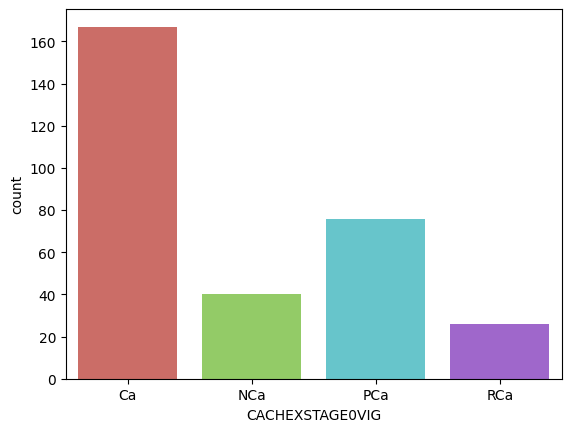

In [7]:
extracted_col0 = Ndata.iloc[:,0:1] #ID

extracted_col1 = Ndata["ENA.78_T1"];        extracted_col2 = Ndata["IFN.y_T1"];           extracted_col3 = Ndata["IL.10_T1"];
extracted_col4 = Ndata["IL.1B_T1"];         extracted_col5 = Ndata["IL.6_T1"];            extracted_col6 = Ndata["IL.8_T1"];
extracted_col7 = Ndata["MCP.1_T1"];         extracted_col8 = Ndata["MDC_T1"];             extracted_col9 = Ndata["MIP.1a_T1"];
extracted_col10 = Ndata["TNF.a_T1"];        extracted_col11 = Ndata["C.peptide_T1"];      extracted_col12 = Ndata["G.CSF_T1"];
extracted_col13 = Ndata["IL.1a_T1"];        extracted_col14 = Ndata["IL.22_T1"];          extracted_col15 = Ndata["Insulin_T1"];
extracted_col16 = Ndata["Leptin_T1"];       extracted_col17 = Ndata["MIP.3a_T1"];         extracted_col18 = Ndata["GRO.a_T1"];
extracted_col19 = Ndata["HGF_T1"];          extracted_col20 = Ndata["IGF.1_T1"];          extracted_col21 = Ndata["MMP.2_T1"];
extracted_col22 = Ndata["Adiponectin_T1"];  extracted_col23 = Ndata["CRP_T1"];            extracted_col24 = Ndata["GDF.15_T1"];
extracted_col25 = Ndata["TIMP.1_T1"];       extracted_col26 = Ndata["TGF.B2_T1"];         extracted_col27 = Ndata["TGF.B3_T1"];
extracted_col28 = Ndata["TGF.B1_T1"];       extracted_col29 = Ndata["PPAR.y_T1"];         extracted_col30 = Ndata["Activin A_T1"];
extracted_col31 = Ndata["Activin RIIB_T1"]; extracted_col32 = Ndata["Angiotensin II_T1"]; extracted_col33 = Ndata["a.SMA_T1"];
extracted_col34 = Ndata["HIF.1a_T1"];       extracted_col35 = Ndata["Laminin_T1"];        extracted_col36 = Ndata["HbA1c_T1"];
extracted_col37 = Ndata["Cotinine_T1"];     extracted_col38 = Ndata["CA19.9_T1"];         extracted_col39 = Ndata["Glucose_T1"];
extracted_col40 = Ndata["HDL_T1"];          extracted_col41 = Ndata["CCK_T1"];            extracted_col42 = Ndata["LDL_T1"];
extracted_col43 = Ndata["Triglyceride_T1"]; extracted_col44 = Ndata["Albumin_T1"];        extracted_col45 = Ndata["Fibronectin_T1"];
extracted_col46 = Ndata["Lumican_T1"];      extracted_col47 = Ndata["ZAG_T1"];            extracted_col48 = Ndata["MMP.14_T1"];
extracted_col49 = Ndata['GENDER'];          extracted_col50 = Ndata['BMI'];               extracted_col51 = Ndata['RACE_ETHN'];

extracted_col52 = Ndata["CACHEXSTAGE0VIG"]

ndata = extracted_col0
ndata = ndata.join(extracted_col1);  ndata = ndata.join(extracted_col2);  ndata = ndata.join(extracted_col3);  
ndata = ndata.join(extracted_col4);  ndata = ndata.join(extracted_col5);  ndata = ndata.join(extracted_col6);
ndata = ndata.join(extracted_col7);  ndata = ndata.join(extracted_col8);  ndata = ndata.join(extracted_col9);  
ndata = ndata.join(extracted_col10); ndata = ndata.join(extracted_col11); ndata = ndata.join(extracted_col12);
ndata = ndata.join(extracted_col13); ndata = ndata.join(extracted_col14); ndata = ndata.join(extracted_col15); 
ndata = ndata.join(extracted_col16); ndata = ndata.join(extracted_col17); ndata = ndata.join(extracted_col18);
ndata = ndata.join(extracted_col19); ndata = ndata.join(extracted_col20); ndata = ndata.join(extracted_col21); 
ndata = ndata.join(extracted_col22); ndata = ndata.join(extracted_col23); ndata = ndata.join(extracted_col24);
ndata = ndata.join(extracted_col25); ndata = ndata.join(extracted_col26); ndata = ndata.join(extracted_col27);
ndata = ndata.join(extracted_col28); ndata = ndata.join(extracted_col29); ndata = ndata.join(extracted_col30);
ndata = ndata.join(extracted_col31); ndata = ndata.join(extracted_col32); ndata = ndata.join(extracted_col33);
ndata = ndata.join(extracted_col34); ndata = ndata.join(extracted_col35); ndata = ndata.join(extracted_col36);
ndata = ndata.join(extracted_col37); ndata = ndata.join(extracted_col38); ndata = ndata.join(extracted_col39);
ndata = ndata.join(extracted_col40); ndata = ndata.join(extracted_col41); ndata = ndata.join(extracted_col42);
ndata = ndata.join(extracted_col43); ndata = ndata.join(extracted_col44); ndata = ndata.join(extracted_col45);
ndata = ndata.join(extracted_col46); ndata = ndata.join(extracted_col47); ndata = ndata.join(extracted_col48);
ndata = ndata.join(extracted_col49); ndata = ndata.join(extracted_col50); ndata = ndata.join(extracted_col51);

ndata = ndata.join(extracted_col52);

#ndata.dropna(inplace=True) # drop rows with Nan, no entries
print(ndata.shape)

# count class imbalance # data
ndata.CACHEXSTAGE0VIG.value_counts()/len(ndata.index)
sns.countplot(x='CACHEXSTAGE0VIG',data=ndata,palette='hls')

savefig('./figs/his_01')
#plt.show()

In [8]:
ndata

DATSTAT_ALTPID   ENA.78_T1     IFN.y_T1    IL.10_T1   IL.1B_T1   
0         AHO-0001  15457.4300   154.674359    8.165016   2.534887  \
1         AHO-0003  10914.7170   129.541610   21.200147   3.310764   
2         AHO-0004   4562.3494    82.810477    8.709707   0.603432   
3         AHO-0007   6418.4954   198.987199    5.648473        NaN   
4         AHO-0010  32981.7533   216.044346   12.834249   8.753446   
5         AHO-0014   5751.3318   130.038157    9.753816   1.433686   
6         AHO-0018   9340.6418    83.408072    9.541702   2.534887   
7         AHO-0019   1418.1513    99.675497    5.797317        NaN   
8         AHO-0025   3815.4892    75.390487    6.770730   1.822751   
9         AHO-0026   5965.3287   253.483781    5.271557   3.612617   
10        AHO-0027         NaN          NaN         NaN        NaN   
11        JMH-0001  39240.7693   147.129004    9.004614   0.880012   
12        LRH-0001   3043.3334    61.991651   10.268042   3.883982   
13        LRH-0004         NaN          NaN         NaN        NaN   
14        LRH-0007  13287.1349   459.045634   43.820680   1.552250   
15        LRH-0010         NaN          NaN         NaN        NaN   
16        LRH-0012         NaN          NaN         NaN        NaN   
17        MCC-0003         NaN          NaN         NaN        NaN   
18        MCC-0008  16694.5676    24.538203    1.384364   0.300689   
19        MCC-0013   2206.5082   125.629481    2.041482   0.674111   
20        MCC-0027   4832.4807    27.184419    0.634397        NaN   
21        MCC-0034  11349.7733    24.978527    1.946629   0.052050   
22        MCC-0040  11095.3851    16.972223    2.187427   0.694458   
23        MCC-0043  25483.4763   262.414876    3.393044   1.254529   
24        MCC-0052   8169.6357    35.352718    0.230065        NaN   
25        MCC-0055  10847.8915   152.222162   88.443619   1.576352   
26        MCC-0078   5542.0357    28.582020    1.617577   0.534720   
27        MCC-0085   8299.4952    40.139513    3.951095   1.951240   
28        MCC-0121   8327.8639    14.919109    2.003462        NaN   
29        MCC-0126   5468.8840    19.616734    1.328493   0.832457   
30        MCC-0130  13578.4328   146.516522    0.708981        NaN   
31        MCC-0134   8342.0916   915.135372   15.093198   0.940189   
32        MCC-0136         NaN          NaN         NaN        NaN   
33        MCC-0139  11186.1448    44.634597    1.718626   0.673205   
34        MCC-0143  33048.8995    99.803099    2.289551        NaN   
35        MCC-0146   5550.5375    44.487011    5.045880   0.449783   
36        MCC-0150   2985.7698   121.631422    2.219224        NaN   
37        MCC-0152   6709.7534    27.257848    5.446326   0.606706   
38        MCC-0154  18163.8986    91.593242   11.704566   0.888825   
39        MCC-0156   5907.9999     9.787331   17.147024   3.201517   
40        MCC-0157   9966.7678    38.003508    1.126924        NaN   
41        MCC-0160  23236.7145    61.550257    2.216680        NaN   
42        MCC-0161   9584.8513   121.720891    4.319174        NaN   
43        MCC-0162  14107.7486    63.448887    7.554423  24.428339   
44        MCC-0165         NaN          NaN         NaN        NaN   
45        MCC-0166   3959.8480   211.997727    8.036120   3.813354   
46        MCC-0176    605.1917    59.538454    2.761235   0.206768   
47        MCC-0177   9204.3470   611.995935    3.366156   1.277115   
48        MCC-0184         NaN          NaN         NaN        NaN   
49        MCC-0185  21924.1260   226.174962    1.940140   0.878988   
50        MCC-0186  14769.2364    68.382416    4.025114        NaN   
51        MCC-0187  42369.2196   132.842905    4.227614   2.660792   
52        MCC-0188  26738.1267    72.698977    5.754821   0.534149   
53        MCC-0189  10876.6564   124.825817    5.564504   0.453462   
54        MCC-0191   3292.6977    40.873007    4.869074        NaN   
55        MCC-0192  11349.8326    42.736298    0.994067        NaN   
56        MCC-

In [9]:
ndata[ndata.CACHEXSTAGE0VIG == 'NCa'].shape

(40, 53)

In [10]:
ndata[ndata.CACHEXSTAGE0VIG == 'PCa'].shape

(76, 53)

In [11]:
ndata[ndata.CACHEXSTAGE0VIG == 'Ca'].shape

(167, 53)

In [12]:
ndata[ndata.CACHEXSTAGE0VIG == 'RCa'].shape

(26, 53)

In [13]:
print(ndata.count())
print(ndata.shape)

DATSTAT_ALTPID       318
ENA.78_T1            206
IFN.y_T1             206
IL.10_T1             205
IL.1B_T1             130
IL.6_T1              206
IL.8_T1              206
MCP.1_T1             206
MDC_T1               206
MIP.1a_T1            199
TNF.a_T1             206
C.peptide_T1         205
G.CSF_T1             206
IL.1a_T1              41
IL.22_T1             197
Insulin_T1           202
Leptin_T1            202
MIP.3a_T1            192
GRO.a_T1             206
HGF_T1               206
IGF.1_T1              34
MMP.2_T1             204
Adiponectin_T1       206
CRP_T1               206
GDF.15_T1            206
TIMP.1_T1            206
TGF.B2_T1            181
TGF.B3_T1             38
TGF.B1_T1            206
PPAR.y_T1            205
Activin A_T1         145
Activin RIIB_T1       76
Angiotensin II_T1    146
a.SMA_T1             171
HIF.1a_T1            191
Laminin_T1           206
HbA1c_T1             206
Cotinine_T1           26
CA19.9_T1            186
Glucose_T1           199


In [14]:
# # Drop rows where column 'CACHEXSTAGE0VIG' is NaN

# ndata_c = ndata.dropna(subset=['CACHEXSTAGE0VIG'])
# ndata_c2 = ndata_c.drop(['GENDER','BMI','RACE_ETHN'], axis=1)
# # ndata_c2 = ndata_c2.drop(['MIP.3a_T1','a.SMA_T1','Fibronectin_T1','ZAG_T1','Albumin_T1'], axis=1)
# ndata_c2 = ndata_c2.drop(['MIP.3a_T1','a.SMA_T1','Fibronectin_T1','IL.22_T1','IL.10_T1','MIP.1a_T1','MMP.2_T1','Lumican_T1','Glucose_T1','HDL_T1','PPAR.y_T1','HGF_T1','CCK_T1','Leptin_T1'], axis=1)


# print(ndata_c2.count())
# print(ndata_c2.shape)

# Drop rows where column 'CACHEXSTAGE0VIG' is NaN

# 'ENA.78_T1', 'IFN.y_T1', 'IL.10_T1', 'IL.6_T1', 'IL.8_T1', 'MCP.1_T1', 'MDC_T1', 'TNF.a_T1', 'C.peptide_T1', 'G.CSF_T1', 
# 'GRO.a_T1', 'HGF_T1', 'MMP.2_T1', 'Adiponectin_T1', 'CRP_T1', 'GDF.15_T1', 'TIMP.1_T1', 'TGF.B1_T1', 'PPAR.y_T1', 'Laminin_T1', 
# 'HbA1c_T1', 'HDL_T1', 'CCK_T1', 'LDL_T1', 'Albumin_T1', 'Lumican_T1', 'ZAG_T1'

ndata_c = ndata.dropna(subset=['CACHEXSTAGE0VIG'])
ndata_c2 = ndata_c.drop(['GENDER','BMI','RACE_ETHN'], axis=1)
ndata_c2 = ndata_c2.drop(['MIP.3a_T1','a.SMA_T1','Fibronectin_T1','Albumin_T1'], axis=1)
# ndata_c2 = ndata_c2.drop(['MIP.3a_T1','a.SMA_T1','Fibronectin_T1',], axis=1)

# ndata_c2 = ndata_c2.drop(['MIP.3a_T1','a.SMA_T1','Fibronectin_T1','IL.1B_T1','IL.1a_T1',
#                           'IGF.1_T1','TGF.B2_T1','TGF.B3_T1','Activin A_T1','Activin RIIB_T1',
#                           'Angiotensin II_T1','Cotinine_T1','CA19.9_T1','Triglyceride_T1','MMP.14_T1'], axis=1)

# ndata_c2 = ndata_c2.drop(['MIP.3a_T1','a.SMA_T1','Fibronectin_T1','IL.1B_T1','MIP.1a_T1','IL.1a_T1','IL.22_T1',
#                           'Insulin_T1','Leptin_T1','IGF.1_T1','TGF.B2_T1','TGF.B3_T1','Activin A_T1','Activin RIIB_T1',
#                           'Angiotensin II_T1','HIF.1a_T1','Cotinine_T1','CA19.9_T1','Glucose_T1','Triglyceride_T1','MMP.14_T1'], axis=1)


print(ndata_c2.count())
print(ndata_c2.shape)

DATSTAT_ALTPID       309
ENA.78_T1            202
IFN.y_T1             202
IL.10_T1             201
IL.1B_T1             126
IL.6_T1              202
IL.8_T1              202
MCP.1_T1             202
MDC_T1               202
MIP.1a_T1            195
TNF.a_T1             202
C.peptide_T1         201
G.CSF_T1             202
IL.1a_T1              41
IL.22_T1             193
Insulin_T1           198
Leptin_T1            198
GRO.a_T1             202
HGF_T1               202
IGF.1_T1              34
MMP.2_T1             200
Adiponectin_T1       202
CRP_T1               202
GDF.15_T1            202
TIMP.1_T1            202
TGF.B2_T1            177
TGF.B3_T1             38
TGF.B1_T1            202
PPAR.y_T1            201
Activin A_T1         143
Activin RIIB_T1       74
Angiotensin II_T1    143
HIF.1a_T1            188
Laminin_T1           202
HbA1c_T1             202
Cotinine_T1           25
CA19.9_T1            183
Glucose_T1           196
HDL_T1               202
CCK_T1               200


In [15]:
# Remove columns with less than 100 non-NaN cells

threshold = 150  # Minimum number of non-NaN cells required
ndata_f = ndata_c2.loc[:, ndata_c2.notna().sum() >= threshold]

print(ndata_f.count())
print(ndata_f.shape)

DATSTAT_ALTPID     309
ENA.78_T1          202
IFN.y_T1           202
IL.10_T1           201
IL.6_T1            202
IL.8_T1            202
MCP.1_T1           202
MDC_T1             202
MIP.1a_T1          195
TNF.a_T1           202
C.peptide_T1       201
G.CSF_T1           202
IL.22_T1           193
Insulin_T1         198
Leptin_T1          198
GRO.a_T1           202
HGF_T1             202
MMP.2_T1           200
Adiponectin_T1     202
CRP_T1             202
GDF.15_T1          202
TIMP.1_T1          202
TGF.B2_T1          177
TGF.B1_T1          202
PPAR.y_T1          201
HIF.1a_T1          188
Laminin_T1         202
HbA1c_T1           202
CA19.9_T1          183
Glucose_T1         196
HDL_T1             202
CCK_T1             200
LDL_T1             202
Triglyceride_T1    180
Lumican_T1         202
ZAG_T1             202
CACHEXSTAGE0VIG    309
dtype: int64
(309, 37)


In [16]:
#

print(ndata_f.columns.tolist())

['DATSTAT_ALTPID', 'ENA.78_T1', 'IFN.y_T1', 'IL.10_T1', 'IL.6_T1', 'IL.8_T1', 'MCP.1_T1', 'MDC_T1', 'MIP.1a_T1', 'TNF.a_T1', 'C.peptide_T1', 'G.CSF_T1', 'IL.22_T1', 'Insulin_T1', 'Leptin_T1', 'GRO.a_T1', 'HGF_T1', 'MMP.2_T1', 'Adiponectin_T1', 'CRP_T1', 'GDF.15_T1', 'TIMP.1_T1', 'TGF.B2_T1', 'TGF.B1_T1', 'PPAR.y_T1', 'HIF.1a_T1', 'Laminin_T1', 'HbA1c_T1', 'CA19.9_T1', 'Glucose_T1', 'HDL_T1', 'CCK_T1', 'LDL_T1', 'Triglyceride_T1', 'Lumican_T1', 'ZAG_T1', 'CACHEXSTAGE0VIG']


In [17]:

cols_to_check = ['ENA.78_T1', 'IFN.y_T1', 'IL.10_T1', 'IL.6_T1', 'IL.8_T1', 'MCP.1_T1', 'MDC_T1', 'MIP.1a_T1', 'TNF.a_T1', 'C.peptide_T1', 
                 'G.CSF_T1', 'IL.22_T1', 'Insulin_T1', 'Leptin_T1', 'GRO.a_T1', 'HGF_T1', 'MMP.2_T1', 'Adiponectin_T1', 'CRP_T1', 'GDF.15_T1', 
                 'TIMP.1_T1', 'TGF.B2_T1', 'TGF.B1_T1', 'PPAR.y_T1', 'HIF.1a_T1', 'Laminin_T1', 'HbA1c_T1', 'CA19.9_T1', 'Glucose_T1', 'HDL_T1', 
                 'CCK_T1', 'LDL_T1', 'Triglyceride_T1', 'Lumican_T1', 'ZAG_T1',]
    
#     'ENA.78_T1', 'IFN.y_T1', 'IL.10_T1', 'IL.6_T1', 'IL.8_T1', 'MCP.1_T1', 'MDC_T1', 'MIP.1a_T1', 'TNF.a_T1', 'C.peptide_T1', 'G.CSF_T1', 
#     'IL.22_T1', 'Insulin_T1', 'Leptin_T1', 'GRO.a_T1', 'HGF_T1', 'MMP.2_T1', 'Adiponectin_T1', 'CRP_T1', 'GDF.15_T1', 'TIMP.1_T1', 'TGF.B2_T1', 
#     'TGF.B1_T1', 'PPAR.y_T1', 'HIF.1a_T1', 'Laminin_T1', 'HbA1c_T1', 'CA19.9_T1', 'Glucose_T1', 'HDL_T1', 'CCK_T1', 'LDL_T1', 'Triglyceride_T1', 'Albumin_T1', 'Lumican_T1', 'ZAG_T1'
# ]

ndata_f2 = ndata_f.dropna(subset=cols_to_check, how='all')





In [18]:
# ndata_f2

In [19]:
print(ndata_f2.count())
print(ndata_f2.shape)

DATSTAT_ALTPID     202
ENA.78_T1          202
IFN.y_T1           202
IL.10_T1           201
IL.6_T1            202
IL.8_T1            202
MCP.1_T1           202
MDC_T1             202
MIP.1a_T1          195
TNF.a_T1           202
C.peptide_T1       201
G.CSF_T1           202
IL.22_T1           193
Insulin_T1         198
Leptin_T1          198
GRO.a_T1           202
HGF_T1             202
MMP.2_T1           200
Adiponectin_T1     202
CRP_T1             202
GDF.15_T1          202
TIMP.1_T1          202
TGF.B2_T1          177
TGF.B1_T1          202
PPAR.y_T1          201
HIF.1a_T1          188
Laminin_T1         202
HbA1c_T1           202
CA19.9_T1          183
Glucose_T1         196
HDL_T1             202
CCK_T1             200
LDL_T1             202
Triglyceride_T1    180
Lumican_T1         202
ZAG_T1             202
CACHEXSTAGE0VIG    202
dtype: int64
(202, 37)


In [20]:

ndata_noR = ndata_f2[ndata_f2.CACHEXSTAGE0VIG != 'RCa']

print(ndata_noR.count())
print(ndata_noR.shape)

DATSTAT_ALTPID     184
ENA.78_T1          184
IFN.y_T1           184
IL.10_T1           183
IL.6_T1            184
IL.8_T1            184
MCP.1_T1           184
MDC_T1             184
MIP.1a_T1          178
TNF.a_T1           184
C.peptide_T1       183
G.CSF_T1           184
IL.22_T1           175
Insulin_T1         181
Leptin_T1          181
GRO.a_T1           184
HGF_T1             184
MMP.2_T1           182
Adiponectin_T1     184
CRP_T1             184
GDF.15_T1          184
TIMP.1_T1          184
TGF.B2_T1          164
TGF.B1_T1          184
PPAR.y_T1          183
HIF.1a_T1          172
Laminin_T1         184
HbA1c_T1           184
CA19.9_T1          170
Glucose_T1         179
HDL_T1             184
CCK_T1             183
LDL_T1             184
Triglyceride_T1    163
Lumican_T1         184
ZAG_T1             184
CACHEXSTAGE0VIG    184
dtype: int64
(184, 37)


In [21]:
# generate table for old data

from tableone import TableOne, load_dataset
from scipy import stats

# table for demographic data

col_tab = ['ENA.78_T1', 'IFN.y_T1', 'IL.10_T1', 'IL.6_T1', 'IL.8_T1', 'MCP.1_T1', 'MDC_T1', 'MIP.1a_T1', 'TNF.a_T1', 'C.peptide_T1', 
           'G.CSF_T1', 'IL.22_T1', 'Insulin_T1', 'Leptin_T1', 'GRO.a_T1', 'HGF_T1', 'MMP.2_T1', 'Adiponectin_T1', 'CRP_T1', 'GDF.15_T1', 
           'TIMP.1_T1', 'TGF.B2_T1', 'TGF.B1_T1', 'PPAR.y_T1', 'HIF.1a_T1', 'Laminin_T1', 'HbA1c_T1', 'CA19.9_T1', 'Glucose_T1', 'HDL_T1', 
           'CCK_T1', 'LDL_T1', 'Triglyceride_T1', 'Lumican_T1', 'ZAG_T1','CACHEXSTAGE0VIG']

categorical = ['CACHEXSTAGE0VIG']

groupby = ['CACHEXSTAGE0VIG']

myTable_demo = TableOne(ndata_noR,columns=col_tab,categorical=categorical,groupby=groupby,pval=True)

print(myTable_demo.tabulate(tablefmt="latex"))







\begin{tabular}{llllllll}
\hline
                            &     & Missing   & Overall                 & Ca                      & NCa                     & PCa                     & P-Value   \\
\hline
 n                          &     &           & 184                     & 103                     & 28                      & 53                      &           \\
 ENA.78\_T1, mean (SD)       &     & 0         & 12654.3 (10303.6)       & 12977.4 (11022.0)       & 12394.3 (10294.5)       & 12163.8 (8933.2)        & 0.888     \\
 IFN.y\_T1, mean (SD)        &     & 0         & 144.1 (192.0)           & 155.6 (188.3)           & 107.0 (81.0)            & 141.5 (236.1)           & 0.493     \\
 IL.10\_T1, mean (SD)        &     & 1         & 12.6 (21.6)             & 14.8 (19.8)             & 6.5 (7.3)               & 11.6 (28.7)             & 0.177     \\
 IL.6\_T1, mean (SD)         &     & 0         & 62.3 (163.2)            & 69.5 (153.8)            & 25.3 (19.2)             & 67.7 

In [22]:


ndata_noR = ndata_noR.replace(to_replace='NCa',value='0.0')
ndata_noR = ndata_noR.replace(to_replace='PCa',value='1.0')
ndata_noR = ndata_noR.replace(to_replace='Ca',value='2.0')

# copy following feats

ndata_noR_ft = ndata_noR[['DATSTAT_ALTPID', 'ENA.78_T1', 'IFN.y_T1', 'IL.10_T1', 'IL.6_T1', 'IL.8_T1', 'MCP.1_T1', 'MDC_T1', 
                          'MIP.1a_T1', 'TNF.a_T1', 'C.peptide_T1', 'G.CSF_T1', 'IL.22_T1', 'Insulin_T1', 'Leptin_T1', 'GRO.a_T1', 
                          'HGF_T1', 'MMP.2_T1', 'Adiponectin_T1', 'CRP_T1', 'GDF.15_T1', 'TIMP.1_T1', 'TGF.B2_T1', 'TGF.B1_T1', 
                          'PPAR.y_T1', 'HIF.1a_T1', 'Laminin_T1', 'HbA1c_T1', 'CA19.9_T1', 'Glucose_T1', 'HDL_T1', 'CCK_T1', 'LDL_T1', 
                          'Triglyceride_T1', 'Lumican_T1', 'ZAG_T1','CACHEXSTAGE0VIG']].copy()

ndata_noR_ft.reset_index(drop=True, inplace=True)

print(ndata_noR_ft.count())
print(ndata_noR_ft.shape)

DATSTAT_ALTPID     184
ENA.78_T1          184
IFN.y_T1           184
IL.10_T1           183
IL.6_T1            184
IL.8_T1            184
MCP.1_T1           184
MDC_T1             184
MIP.1a_T1          178
TNF.a_T1           184
C.peptide_T1       183
G.CSF_T1           184
IL.22_T1           175
Insulin_T1         181
Leptin_T1          181
GRO.a_T1           184
HGF_T1             184
MMP.2_T1           182
Adiponectin_T1     184
CRP_T1             184
GDF.15_T1          184
TIMP.1_T1          184
TGF.B2_T1          164
TGF.B1_T1          184
PPAR.y_T1          183
HIF.1a_T1          172
Laminin_T1         184
HbA1c_T1           184
CA19.9_T1          170
Glucose_T1         179
HDL_T1             184
CCK_T1             183
LDL_T1             184
Triglyceride_T1    163
Lumican_T1         184
ZAG_T1             184
CACHEXSTAGE0VIG    184
dtype: int64
(184, 37)


In [23]:
ndata_noR_ft = ndata_noR_ft.drop('DATSTAT_ALTPID', axis=1)

In [24]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# ---- Example setup ----
# df = pd.read_csv("your_data.csv")
# target_col = "y"

X = ndata_noR_ft.drop(columns=['CACHEXSTAGE0VIG'])
y = ndata_noR_ft['CACHEXSTAGE0VIG']

# Detect task type
is_classification = y.nunique() < 20 and y.dtype != float

# ---- 1. Mutual Information ----
if is_classification:
    mi = mutual_info_classif(X.fillna(0), y, discrete_features='auto')
else:
    mi = mutual_info_regression(X.fillna(0), y)

mi_scores = pd.Series(mi, index=X.columns).sort_values(ascending=False)

# ---- 2. One-feature CV performance ----
one_feat_scores = {}
for col in X.columns:
    Xi = X[[col]].fillna(0)
    if is_classification:
        model = RandomForestClassifier(n_estimators=200, random_state=42)
        scores = cross_val_score(model, Xi, y, cv=5, scoring="accuracy")
    else:
        model = RandomForestRegressor(n_estimators=200, random_state=42)
        scores = cross_val_score(model, Xi, y, cv=5, scoring="r2")
    one_feat_scores[col] = scores.mean()

one_feat_scores = pd.Series(one_feat_scores).sort_values(ascending=False)

# ---- 3. Added value test (full model vs. leave-one-out) ----
if is_classification:
    base_model = RandomForestClassifier(n_estimators=200, random_state=42)
    scoring = "accuracy"
else:
    base_model = RandomForestRegressor(n_estimators=200, random_state=42)
    scoring = "r2"

# Full model score
base_score = cross_val_score(base_model, X.fillna(0), y, cv=5, scoring=scoring).mean()

delta_scores = {}
for col in X.columns:
    X_reduced = X.drop(columns=[col]).fillna(0)
    score_reduced = cross_val_score(base_model, X_reduced, y, cv=5, scoring=scoring).mean()
    delta_scores[col] = base_score - score_reduced  # performance drop if removed

delta_scores = pd.Series(delta_scores).sort_values(ascending=False)

# ---- 4. Combine into summary table ----
summary = pd.DataFrame({
    "MI": mi_scores,
    "OneFeat_CV": one_feat_scores,
    "Delta_FullModel": delta_scores
})

print("\n=== Feature Predictiveness Summary ===")
print(summary.sort_values("Delta_FullModel", ascending=False).round(4))



=== Feature Predictiveness Summary ===
                     MI  OneFeat_CV  Delta_FullModel
IL.22_T1         0.0392      0.4511           0.0383
GDF.15_T1        0.0403      0.4842           0.0380
CA19.9_T1        0.0956      0.5108           0.0377
Triglyceride_T1  0.0000      0.3802           0.0216
MIP.1a_T1        0.0610      0.4943           0.0215
CRP_T1           0.0544      0.3802           0.0165
Insulin_T1       0.0712      0.4833           0.0164
HGF_T1           0.0000      0.4074           0.0164
MDC_T1           0.0000      0.4674           0.0164
TGF.B2_T1        0.0216      0.4239           0.0161
Leptin_T1        0.0953      0.5164           0.0161
G.CSF_T1         0.0440      0.4077           0.0111
MMP.2_T1         0.0141      0.4450           0.0111
IL.10_T1         0.0338      0.4619           0.0110
Adiponectin_T1   0.0382      0.3794           0.0108
LDL_T1           0.0469      0.4353           0.0108
Glucose_T1       0.0000      0.4179           0.0108
IL.8_T

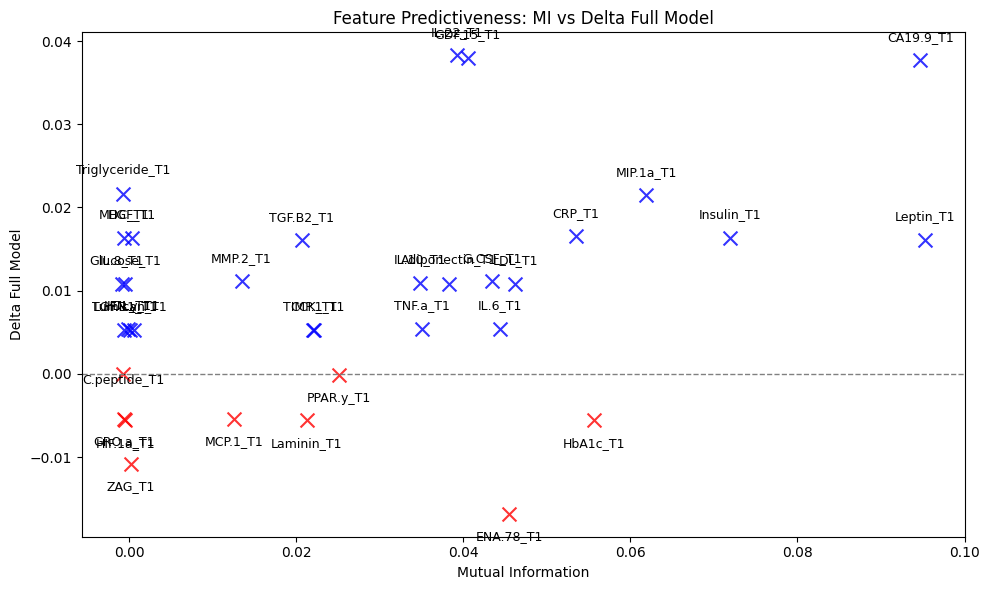

In [25]:
import matplotlib.pyplot as plt

# ---- 5. Plot Mutual Information vs Delta Full Model ----
plt.figure(figsize=(10, 6))

# Extract x and y values
x = summary["MI"].values
y = summary["Delta_FullModel"].values
labels = summary.index

# Jitter to avoid overlap
x_jitter = x + np.random.uniform(-0.001, 0.001, size=len(x))  # small horizontal jitter

# Color coding
colors = ['blue' if val > 0 else 'red' for val in y]

# Marker style
markers = ['x' for _ in y]

# Scatter plot
for xi, yi, c, m in zip(x_jitter, y, colors, markers):
    plt.scatter(xi, yi, color=c, marker=m, s=100, alpha=0.8)

# Horizontal separator at 0
plt.axhline(0, color='gray', linestyle='--', linewidth=1)

plt.xlabel("Mutual Information")
plt.ylabel("Delta Full Model")
plt.title("Feature Predictiveness: MI vs Delta Full Model")

# Annotate points to avoid overlap (optional)
for xi, yi, label in zip(x_jitter, y, labels):
    plt.text(xi, yi + 0.002*np.sign(yi), label, fontsize=9, ha='center', va='bottom' if yi > 0 else 'top')

plt.tight_layout()
plt.show()


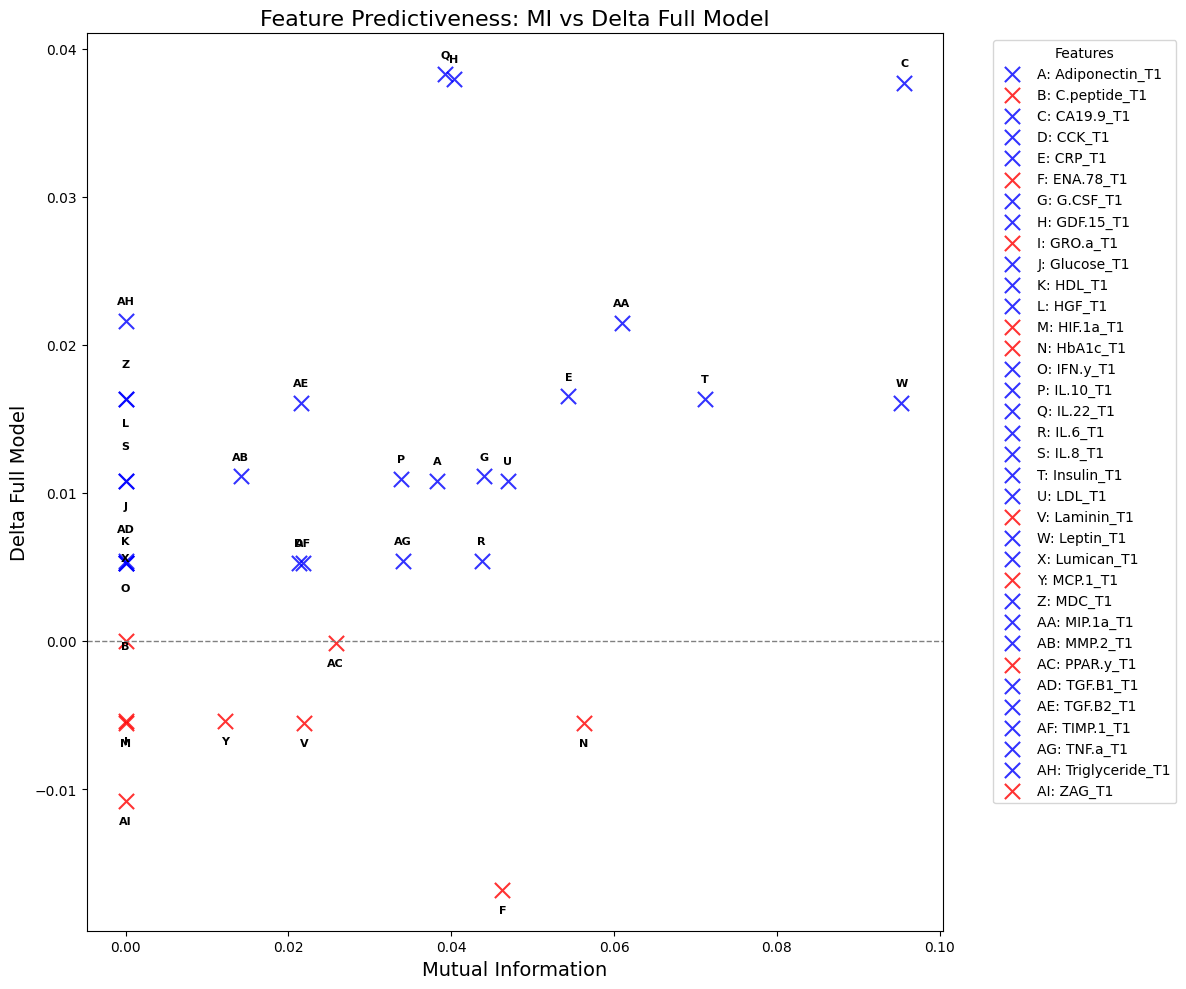

In [26]:
import matplotlib.pyplot as plt
import string
from collections import defaultdict

# ---- Helper: Excel-style labels ----
def excel_style_labels(n):
    labels = []
    i = 0
    while len(labels) < n:
        s = ''
        x = i
        while True:
            s = string.ascii_uppercase[x % 26] + s
            x = x // 26 - 1
            if x < 0:
                break
        labels.append(s)
        i += 1
    return labels

# ---- Prepare letters ----
features = summary.index
letters = excel_style_labels(len(features))
feature_to_letter = {feat: letter for feat, letter in zip(features, letters)}

# ---- Plot ----
plt.figure(figsize=(12, 10))

x = summary["MI"].values
y = summary["Delta_FullModel"].values

# Color coding
colors = ['blue' if val > 0 else 'red' for val in y]

# Scatter crosses (no jitter)
for xi, yi, feat, c in zip(x, y, features, colors):
    plt.scatter(xi, yi, color=c, marker='x', s=120, alpha=0.8)

# Minimal vertical jitter for overlapping letters
positions = defaultdict(list)
for xi, yi, feat in zip(x, y, features):
    key = (round(xi, 6), round(yi, 6))
    positions[key].append(feat)

for (xi, yi), feats in positions.items():
    n = len(feats)
    if n == 1:
        plt.text(xi, yi + 0.001*np.sign(yi), feature_to_letter[feats[0]],
                 fontsize=8, ha='center', va='bottom' if yi > 0 else 'top', fontweight='bold')
    else:
        # Small offsets around the original y
        offsets = np.linspace(-0.002, 0.002, n)
        for feat, off in zip(feats, offsets):
            plt.text(xi, yi + off, feature_to_letter[feat],
                     fontsize=8, ha='center',
                     va='bottom' if yi + off > 0 else 'top', fontweight='bold')

# Horizontal separator at 0
plt.axhline(0, color='gray', linestyle='--', linewidth=1)

plt.xlabel("Mutual Information", fontsize=14)
plt.ylabel("Delta Full Model", fontsize=14)
plt.title("Feature Predictiveness: MI vs Delta Full Model", fontsize=16)

# Legend
legend_labels = [f"{letter}: {feat}" for feat, letter in feature_to_letter.items()]
plt.legend(legend_labels, fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left', title="Features")

plt.tight_layout()
plt.show()


In [27]:
# 
ndata_noR_ft = ndata_noR_ft.drop(['C.peptide_T1','ENA.78_T1','GRO.a_T1','HIF.1a_T1','HbA1c_T1','Laminin_T1','Lumican_T1','PPAR.y_T1','ZAG_T1'], axis=1)


In [28]:
# ## Remove patients missing data in all columns

# # Remove rows missing data in all columns except the first and last
# ndata_noR_ft2 = ndata_noR_ft.dropna(how="all", subset=ndata_noR_ft.columns[1:-1])

# print(ndata_noR_ft2.count())
# print(ndata_noR_ft2.shape)

In [29]:
ndata_noR_ft

IFN.y_T1    IL.10_T1      IL.6_T1     IL.8_T1    MCP.1_T1     MDC_T1   
0     154.674359    8.165016    50.536025   308.46984   2952.2053  14925.619  \
1     129.541610   21.200147    53.791767   320.71905   3948.1801  10983.855   
2      82.810477    8.709707    24.938960   192.61958   2135.8145   8140.430   
3     198.987199    5.648473    42.322181   217.68662   2674.2227  20290.740   
4     216.044346   12.834249    48.311811   305.94208   2396.0186  15760.547   
5     130.038157    9.753816    21.607680   183.16113   2274.0484   9745.071   
6      83.408072    9.541702    35.474781   281.33710   2437.6857  12359.847   
7      99.675497    5.797317    12.823830   151.40915   1935.9634   5516.355   
8      75.390487    6.770730    44.136079   286.33993   2454.3143  13981.236   
9     253.483781    5.271557    19.324651   217.12468   4580.0005  11082.788   
10     61.991651   10.268042   192.140173   169.26169   2526.9580  11017.020   
11    459.045634   43.820680    40.923880   173.46726   2691.8971   9869.253   
12     24.538203    1.384364    22.369206   300.99568   3228.1947  40487.217   
13    125.629481    2.041482    51.046852   866.20119   1969.0355   9377.573   
14     27.184419    0.634397     5.077222    56.12172   2511.4391   9724.942   
15     24.978527    1.946629    22.983243   163.50290   3803.9517  11603.948   
16     16.972223    2.187427    26.390381   303.78693   2870.7135  10647.567   
17    262.414876    3.393044    51.557608   325.78530   2276.3955  17917.801   
18     35.352718    0.230065    11.336578    98.06866   1473.7582  10692.007   
19    152.222162   88.443619   136.555100   850.37140   5847.3111  22101.570   
20     28.582020    1.617577    15.447388   162.01540   2291.8251  14666.143   
21     40.139513    3.951095    25.899454   189.20784   3934.0135  12589.693   
22     14.919109    2.003462    11.243651   114.61832   2972.6540   8789.629   
23    146.516522    0.708981    16.975255   174.93478   3604.1284   9932.783   
24    915.135372   15.093198    39.708931   617.90530  12945.3503  14827.461   
25     44.634597    1.718626    20.508430   431.38423   1957.2818  27472.990   
26     99.803099    2.289551     7.541767   171.29335   2797.5380  11445.616   
27     44.487011    5.045880  1368.765125   139.47726   2715.6432  13022.272   
28    121.631422    2.219224    13.988859    58.31248   2651.9936  11426.509   
29     27.257848    5.446326    25.290188   606.26767   4313.1464  12579.341   
30     91.593242   11.704566   587.743174   160.31865   6941.3988  10478.490   
31      9.787331   17.147024   141.688972  2520.96765   2774.0220  12387.981   
32     38.003508    1.126924     8.616116   133.17612   3731.8754  11935.957   
33     61.550257    2.216680    11.429716   112.81030   2116.9099  10111.523   
34    121.720891    4.319174     7.119091   162.24087   2870.5548   5049.861   
35     63.448887    7.554423   290.237917   503.61137   8071.4786  24799.920   
36     59.538454    2.761235    15.929273   130.60562   2200.1544  13715.377   
37    226.174962    1.940140    10.466401   158.33248   3494.4894  13129.005   
38     68.382416    4.025114     7.232319   102.72482   4138.5964   8930.321   
39    132.842905    4.227614    24.327167   263.40854   1682.1364  11241.039   
40     72.698977    5.754821    18.761553   309.75485   4454.5995  12320.593   
41    124.825817    5.564504    45.455610   193.11993   2149.2591  18721.639   
42     40.873007    4.869074    34.316085   400.73712   2917.3945  11710.806   
43     42.736298    0.994067    15.563832    42.46964   3986.4703   9591.563   
44     47.112645   11.951359    27.971925   405.92935   5442.1982  28571.296   
45     21.833442    0.631005     9.668188  1341.28451   2693.6003   9664.458   
46     35.568225    3.639910    13.184700   160.63907   2448.9420  17840.705   
47     16.472298    5.228124    26.169500   101.19472   1913.6910  19425.502   
48     48.476308    1.616403    10.493474   119.67195   2721.4799  11628.237   
49     1

In [30]:
# remove ID 

# ndata_noR_ft2.reset_index(drop=True, inplace=True)
# ndata_noR_ft = ndata_noR_ft.drop('DATSTAT_ALTPID', axis=1)

print(ndata_noR_ft.shape)

(184, 27)


In [31]:
# Print the column names as a list
print(ndata_noR_ft.columns.tolist())

['IFN.y_T1', 'IL.10_T1', 'IL.6_T1', 'IL.8_T1', 'MCP.1_T1', 'MDC_T1', 'MIP.1a_T1', 'TNF.a_T1', 'G.CSF_T1', 'IL.22_T1', 'Insulin_T1', 'Leptin_T1', 'HGF_T1', 'MMP.2_T1', 'Adiponectin_T1', 'CRP_T1', 'GDF.15_T1', 'TIMP.1_T1', 'TGF.B2_T1', 'TGF.B1_T1', 'CA19.9_T1', 'Glucose_T1', 'HDL_T1', 'CCK_T1', 'LDL_T1', 'Triglyceride_T1', 'CACHEXSTAGE0VIG']


In [35]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from scipy import stats

col_to_scale = ['IFN.y_T1', 'IL.10_T1', 'IL.6_T1', 'IL.8_T1', 'MCP.1_T1', 'MDC_T1', 'MIP.1a_T1', 'TNF.a_T1', 'G.CSF_T1', 
                'IL.22_T1', 'Insulin_T1', 'Leptin_T1', 'HGF_T1', 'MMP.2_T1', 'Adiponectin_T1', 'CRP_T1', 'GDF.15_T1', 
                'TIMP.1_T1', 'TGF.B2_T1', 'TGF.B1_T1', 'CA19.9_T1', 'Glucose_T1', 'HDL_T1', 'CCK_T1', 'LDL_T1', 'Triglyceride_T1', ]

def midas_impl(missing, col_to_scale, n_epoch):
    missing_cp = missing.copy() # make copy of missing df
    
    # scaler = MinMaxScaler().fit(missing_cp[col_to_scale]) # scale data
    scaler = StandardScaler().fit(missing_cp[col_to_scale]) # scale data
    missing_sc = scaler.transform(missing_cp[col_to_scale]) # this is an array, convert to df

    missing_df = pd.DataFrame({'IFN.y_T1':missing_sc[:,0],
                               'IL.10_T1':missing_sc[:,1],
                               'IL.6_T1':missing_sc[:,2],
                               'IL.8_T1':missing_sc[:,3],
                               'MCP.1_T1':missing_sc[:,4],
                               'MDC_T1':missing_sc[:,5],
                               'MIP.1a_T1':missing_sc[:,6],
                               'TNF.a_T1':missing_sc[:,7],
                               'G.CSF_T1':missing_sc[:,8],
                               'IL.22_T1':missing_sc[:,9],
                               'Insulin_T1':missing_sc[:,10],
                               'Leptin_T1':missing_sc[:,11],
                               'HGF_T1':missing_sc[:,12],
                               'MMP.2_T1':missing_sc[:,13],
                               'Adiponectin_T1':missing_sc[:,14],
                               'CRP_T1':missing_sc[:,15],
                               'GDF.15_T1':missing_sc[:,16],
                               'TIMP.1_T1':missing_sc[:,17],
                               'TGF.B2_T1':missing_sc[:,18],
                               'TGF.B1_T1':missing_sc[:,19],
                               'CA19.9_T1':missing_sc[:,20],
                               'Glucose_T1':missing_sc[:,21],
                               'HDL_T1':missing_sc[:,22],
                               'CCK_T1':missing_sc[:,23],
                               'LDL_T1':missing_sc[:,24],
                               'Triglyceride_T1':missing_sc[:,25],
                               })
    
    # Extract cat columns from missing
    ext_col1 = missing_cp['CACHEXSTAGE0VIG']
    

    # Add the extracted cat columns to missing_df
    missing_df = pd.concat([missing_df, ext_col1.rename('CACHEXSTAGE0VIG')], axis=1)
    

    missing_df.to_csv('missing.csv')
    data_0 = pd.read_csv('missing.csv')
    data_0.columns.str.strip()

    categorical = ['CACHEXSTAGE0VIG']
    
    data_cat, cat_cols_list = md.cat_conv(data_0[categorical])

    data_0.drop(categorical, axis = 1, inplace = True)
    constructor_list = [data_0]
    constructor_list.append(data_cat)
    data_in = pd.concat(constructor_list, axis=1)

    na_loc = data_in.isnull()
    data_in[na_loc] = np.nan

    # imputer = md.Midas(layer_structure = [128,128], vae_layer = True, seed = 89, input_drop = 0.75, learn_rate = 0.0001)
    imputer = md.Midas(layer_structure = [128,128], vae_layer = False, seed = 42, input_drop = 0.75, learn_rate = 0.001)
    imputer.build_model(data_in, softmax_columns = cat_cols_list)
    imputer.train_model(training_epochs = n_epoch)

    # do not update M
    imputations = imputer.generate_samples(m=20).output_list

    flat_cats = [cat for variable in cat_cols_list for cat in variable]
    for i in range(len(imputations)):
        tmp_cat = [imputations[i][x].idxmax(axis=1) for x in cat_cols_list]
        cat_df = pd.DataFrame({categorical[i]:tmp_cat[i] for i in range(len(categorical))})
        imputations[i] = pd.concat([imputations[i], cat_df], axis = 1).drop(flat_cats, axis = 1)

    mapping_ca = {'CACHEXSTAGE0VIG_0.0': 0,'CACHEXSTAGE0VIG_1.0': 1, 'CACHEXSTAGE0VIG_2.0': 2,}

    imputations[0] = imputations[0].replace({'CACHEXSTAGE0VIG': mapping_ca})
    imputations[1] = imputations[1].replace({'CACHEXSTAGE0VIG': mapping_ca})
    imputations[2] = imputations[2].replace({'CACHEXSTAGE0VIG': mapping_ca})
    imputations[3] = imputations[3].replace({'CACHEXSTAGE0VIG': mapping_ca})
    imputations[4] = imputations[4].replace({'CACHEXSTAGE0VIG': mapping_ca})
    imputations[5] = imputations[5].replace({'CACHEXSTAGE0VIG': mapping_ca})
    imputations[6] = imputations[6].replace({'CACHEXSTAGE0VIG': mapping_ca})
    imputations[7] = imputations[7].replace({'CACHEXSTAGE0VIG': mapping_ca})
    imputations[8] = imputations[8].replace({'CACHEXSTAGE0VIG': mapping_ca})
    imputations[9] = imputations[9].replace({'CACHEXSTAGE0VIG': mapping_ca})
    imputations[10] = imputations[10].replace({'CACHEXSTAGE0VIG': mapping_ca})
    imputations[11] = imputations[11].replace({'CACHEXSTAGE0VIG': mapping_ca})
    imputations[12] = imputations[12].replace({'CACHEXSTAGE0VIG': mapping_ca})
    imputations[13] = imputations[13].replace({'CACHEXSTAGE0VIG': mapping_ca})
    imputations[14] = imputations[14].replace({'CACHEXSTAGE0VIG': mapping_ca})
    imputations[15] = imputations[15].replace({'CACHEXSTAGE0VIG': mapping_ca})
    imputations[16] = imputations[16].replace({'CACHEXSTAGE0VIG': mapping_ca})
    imputations[17] = imputations[17].replace({'CACHEXSTAGE0VIG': mapping_ca})
    imputations[18] = imputations[18].replace({'CACHEXSTAGE0VIG': mapping_ca})
    imputations[19] = imputations[19].replace({'CACHEXSTAGE0VIG': mapping_ca})

    # rescale imputations
    imputations[0][col_to_scale] = scaler.inverse_transform(imputations[0][col_to_scale])
    imputations[1][col_to_scale] = scaler.inverse_transform(imputations[1][col_to_scale])
    imputations[2][col_to_scale] = scaler.inverse_transform(imputations[2][col_to_scale])
    imputations[3][col_to_scale] = scaler.inverse_transform(imputations[3][col_to_scale])
    imputations[4][col_to_scale] = scaler.inverse_transform(imputations[4][col_to_scale])
    imputations[5][col_to_scale] = scaler.inverse_transform(imputations[5][col_to_scale])
    imputations[6][col_to_scale] = scaler.inverse_transform(imputations[6][col_to_scale])
    imputations[7][col_to_scale] = scaler.inverse_transform(imputations[7][col_to_scale])
    imputations[8][col_to_scale] = scaler.inverse_transform(imputations[8][col_to_scale])
    imputations[9][col_to_scale] = scaler.inverse_transform(imputations[9][col_to_scale])
    imputations[10][col_to_scale] = scaler.inverse_transform(imputations[10][col_to_scale])
    imputations[11][col_to_scale] = scaler.inverse_transform(imputations[11][col_to_scale])
    imputations[12][col_to_scale] = scaler.inverse_transform(imputations[12][col_to_scale])
    imputations[13][col_to_scale] = scaler.inverse_transform(imputations[13][col_to_scale])
    imputations[14][col_to_scale] = scaler.inverse_transform(imputations[14][col_to_scale])
    imputations[15][col_to_scale] = scaler.inverse_transform(imputations[15][col_to_scale])
    imputations[16][col_to_scale] = scaler.inverse_transform(imputations[16][col_to_scale])
    imputations[17][col_to_scale] = scaler.inverse_transform(imputations[17][col_to_scale])
    imputations[18][col_to_scale] = scaler.inverse_transform(imputations[18][col_to_scale])
    imputations[19][col_to_scale] = scaler.inverse_transform(imputations[19][col_to_scale])

    n=0
    for i in imputations:
        file_out_csv = "midas_imp_" + str(n) + ".csv"
        i.to_csv(file_out_csv, index=False)
        n += 1

    df0 = pd.read_csv('midas_imp_0.csv'); df0 = df0.iloc[:,1:]
    df1 = pd.read_csv('midas_imp_1.csv'); df1 = df1.iloc[:,1:]
    df2 = pd.read_csv('midas_imp_2.csv'); df2 = df2.iloc[:,1:]
    df3 = pd.read_csv('midas_imp_3.csv'); df3 = df3.iloc[:,1:]
    df4 = pd.read_csv('midas_imp_4.csv'); df4 = df4.iloc[:,1:]
    df5 = pd.read_csv('midas_imp_5.csv'); df5 = df5.iloc[:,1:]
    df6 = pd.read_csv('midas_imp_6.csv'); df6 = df6.iloc[:,1:]
    df7 = pd.read_csv('midas_imp_7.csv'); df7 = df7.iloc[:,1:]
    df8 = pd.read_csv('midas_imp_8.csv'); df8 = df8.iloc[:,1:]
    df9 = pd.read_csv('midas_imp_9.csv'); df9 = df9.iloc[:,1:]
    df10 = pd.read_csv('midas_imp_10.csv'); df10 = df10.iloc[:,1:]
    df11 = pd.read_csv('midas_imp_11.csv'); df11 = df11.iloc[:,1:]
    df12 = pd.read_csv('midas_imp_12.csv'); df12 = df12.iloc[:,1:]
    df13 = pd.read_csv('midas_imp_13.csv'); df13 = df13.iloc[:,1:]
    df14 = pd.read_csv('midas_imp_14.csv'); df14 = df14.iloc[:,1:]
    df15 = pd.read_csv('midas_imp_15.csv'); df15 = df15.iloc[:,1:]
    df16 = pd.read_csv('midas_imp_16.csv'); df16 = df16.iloc[:,1:]
    df17 = pd.read_csv('midas_imp_17.csv'); df17 = df17.iloc[:,1:]
    df18 = pd.read_csv('midas_imp_18.csv'); df18 = df18.iloc[:,1:]
    df19 = pd.read_csv('midas_imp_19.csv'); df19 = df19.iloc[:,1:]

    # Initialize the output dataframe with the same dimensions
    output_df = pd.DataFrame(index=df0.index, columns=df0.columns)

    # Process continuous columns (first 4 columns)
    for col in df1.columns[:26]:
        output_df[col] = (abs(df0[col]) + abs(df1[col]) + abs(df2[col]) + abs(df3[col]) + abs(df4[col]) + 
                          abs(df5[col]) + abs(df6[col]) + abs(df7[col]) + abs(df8[col]) + abs(df9[col]) + 
                         abs(df10[col]) + abs(df11[col]) + abs(df12[col]) + abs(df13[col]) + abs(df14[col]) + 
                          abs(df15[col]) + abs(df16[col]) + abs(df17[col]) + abs(df18[col]) + abs(df19[col])) / 20

    # Process categorical columns (last 12 columns)
    for col in df1.columns[26:]:
        output_df[col] = pd.concat([df0[col],df1[col],df2[col],df3[col],df4[col],df5[col],df6[col],df7[col],df8[col],df9[col],
                                   df10[col],df11[col],df12[col],df13[col],df14[col],df15[col],df16[col],df17[col],df18[col],df19[col]], axis=1).median(axis=1)
        
        # median = stats.median([df0[col],df1[col],df2[col],df3[col],df4[col],df5[col],df6[col],df7[col],df8[col],df9[col],
        #                   df10[col],df11[col],df12[col],df13[col],df14[col],df15[col],df16[col],df17[col],df18[col],df19[col]], axis=0).median[0]
        # output_df[col] = median

    # Write the output dataframe to a CSV file
    output_df.to_csv('output.csv', index=False)

    # re-order cols in output_df
    output_df_re = output_df[['IFN.y_T1', 'IL.10_T1', 'IL.6_T1', 'IL.8_T1', 'MCP.1_T1', 'MDC_T1', 'MIP.1a_T1', 'TNF.a_T1', 'G.CSF_T1', 
                'IL.22_T1', 'Insulin_T1', 'Leptin_T1', 'HGF_T1', 'MMP.2_T1', 'Adiponectin_T1', 'CRP_T1', 'GDF.15_T1', 
                'TIMP.1_T1', 'TGF.B2_T1', 'TGF.B1_T1', 'CA19.9_T1', 'Glucose_T1', 'HDL_T1', 'CCK_T1', 'LDL_T1', 'Triglyceride_T1', 'CACHEXSTAGE0VIG']].copy()

    return output_df_re





In [36]:
# calculate proportion of missingness in ndata_noR

# total num of NaN in the ndata_noR
total_nan_count = ndata_noR_ft.isna().sum().sum()

# total num of cells in ndata_noR
total_cells = ndata_noR_ft.size

# proportion of NaN
NaN_proportion = total_nan_count / total_cells

print('NaN_proportions:',NaN_proportion)


NaN_proportions: 0.01710950080515298


In [37]:
# 35.7% missingness by in ndata_16f_93p

ndata_noR_md = midas_impl(ndata_noR_ft, col_to_scale, 200)

Size index: [27, 3]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 144.5828857421875
Epoch: 1 , loss: 125.37877932461825
Epoch: 2 , loss: 109.19889137961648
Epoch: 3 , loss: 90.71697581898083
Epoch: 4 , loss: 77.6235746903853
Epoch: 5 , loss: 69.73878513682972
Epoch: 6 , loss: 61.35150701349432
Epoch: 7 , loss: 57.555145263671875
Epoch: 8 , loss: 56.30860346013849
Epoch: 9 , loss: 56.40573501586914
Epoch: 10 , loss: 58.3918491710316
Epoch: 11 , loss: 54.610054362903945
Epoch: 12 , loss: 54.018945173783735
Epoch: 13 , loss: 49.96700772372159
Epoch: 14 , loss: 53.69081185080788
Epoch: 15 , loss: 52.22753628817472
Epoch: 16 , loss: 51.06454589150169
Epoch: 17 , loss: 50.480059537020594
Epoch: 18 , loss: 50.20303379405629
Epoch: 19 , loss: 49.6659760908647
Epoch: 20 , loss: 52.06611009077592
Epoch: 21 , loss: 49.917753566395156
Epoch: 22 , loss: 49.09138870239258
Epoch: 23 , loss: 48.27815315940163
Epoch: 24 , loss: 46.02471993186257
Epoch: 25 , loss: 47.54794866388494

In [38]:
ndata_noR_md

IFN.y_T1    IL.10_T1      IL.6_T1     IL.8_T1    MCP.1_T1     MDC_T1   
0     154.674359    8.165016    50.536025   308.46984   2952.2053  14925.619  \
1     129.541610   21.200147    53.791767   320.71905   3948.1801  10983.855   
2      82.810477    8.709707    24.938960   192.61958   2135.8145   8140.430   
3     198.987199    5.648473    42.322181   217.68662   2674.2227  20290.740   
4     216.044346   12.834249    48.311811   305.94208   2396.0186  15760.547   
5     130.038157    9.753816    21.607680   183.16113   2274.0484   9745.071   
6      83.408072    9.541702    35.474781   281.33710   2437.6857  12359.847   
7      99.675497    5.797317    12.823830   151.40915   1935.9634   5516.355   
8      75.390487    6.770730    44.136079   286.33993   2454.3143  13981.236   
9     253.483781    5.271557    19.324651   217.12468   4580.0005  11082.788   
10     61.991651   10.268042   192.140173   169.26169   2526.9580  11017.020   
11    459.045634   43.820680    40.923880   173.46726   2691.8971   9869.253   
12     24.538203    1.384364    22.369206   300.99568   3228.1947  40487.217   
13    125.629481    2.041482    51.046852   866.20119   1969.0355   9377.573   
14     27.184419    0.634397     5.077222    56.12172   2511.4391   9724.942   
15     24.978527    1.946629    22.983243   163.50290   3803.9517  11603.948   
16     16.972223    2.187427    26.390381   303.78693   2870.7135  10647.567   
17    262.414876    3.393044    51.557608   325.78530   2276.3955  17917.801   
18     35.352718    0.230065    11.336578    98.06866   1473.7582  10692.007   
19    152.222162   88.443619   136.555100   850.37140   5847.3111  22101.570   
20     28.582020    1.617577    15.447388   162.01540   2291.8251  14666.143   
21     40.139513    3.951095    25.899454   189.20784   3934.0135  12589.693   
22     14.919109    2.003462    11.243651   114.61832   2972.6540   8789.629   
23    146.516522    0.708981    16.975255   174.93478   3604.1284   9932.783   
24    915.135372   15.093198    39.708931   617.90530  12945.3503  14827.461   
25     44.634597    1.718626    20.508430   431.38423   1957.2818  27472.990   
26     99.803099    2.289551     7.541767   171.29335   2797.5380  11445.616   
27     44.487011    5.045880  1368.765125   139.47726   2715.6432  13022.272   
28    121.631422    2.219224    13.988859    58.31248   2651.9936  11426.509   
29     27.257848    5.446326    25.290188   606.26767   4313.1464  12579.341   
30     91.593242   11.704566   587.743174   160.31865   6941.3988  10478.490   
31      9.787331   17.147024   141.688972  2520.96765   2774.0220  12387.981   
32     38.003508    1.126924     8.616116   133.17612   3731.8754  11935.957   
33     61.550257    2.216680    11.429716   112.81030   2116.9099  10111.523   
34    121.720891    4.319174     7.119091   162.24087   2870.5548   5049.861   
35     63.448887    7.554423   290.237917   503.61137   8071.4786  24799.920   
36     59.538454    2.761235    15.929273   130.60562   2200.1544  13715.377   
37    226.174962    1.940140    10.466401   158.33248   3494.4894  13129.005   
38     68.382416    4.025114     7.232319   102.72482   4138.5964   8930.321   
39    132.842905    4.227614    24.327167   263.40854   1682.1364  11241.039   
40     72.698977    5.754821    18.761553   309.75485   4454.5995  12320.593   
41    124.825817    5.564504    45.455610   193.11993   2149.2591  18721.639   
42     40.873007    4.869074    34.316085   400.73712   2917.3945  11710.806   
43     42.736298    0.994067    15.563832    42.46964   3986.4703   9591.563   
44     47.112645   11.951359    27.971925   405.92935   5442.1982  28571.296   
45     21.833442    0.631005     9.668188  1341.28451   2693.6003   9664.458   
46     35.568225    3.639910    13.184700   160.63907   2448.9420  17840.705   
47     16.472298    5.228124    26.169500   101.19472   1913.6910  19425.502   
48     48.476308    1.616403    10.493474   119.67195   2721.4799  11628.237   
49     1

In [39]:

# NCa v PCa
ndata_NCa_PCa = ndata_noR_md[ndata_noR_md["CACHEXSTAGE0VIG"] != 2]
ndata_NCa_PCa.reset_index(drop=True, inplace=True)
print(ndata_NCa_PCa.shape)

# NCa v Ca
ndata_NCa_Ca = ndata_noR_md[ndata_noR_md["CACHEXSTAGE0VIG"] != 1]
ndata_NCa_Ca.reset_index(drop=True, inplace=True)
print(ndata_NCa_Ca.shape)

# PCa v Ca
ndata_PCa_Ca = ndata_noR_md[ndata_noR_md["CACHEXSTAGE0VIG"] != 0]
ndata_PCa_Ca.reset_index(drop=True, inplace=True)
print(ndata_PCa_Ca.shape)

(81, 27)
(131, 27)
(156, 27)


In [40]:
# ## NCa v PCa

# # Replace all occurrences of 0 with -1
# # ndata_NCa_PCa["CACHEXSTAGE0VIG"] = ndata_NCa_PCa["CACHEXSTAGE0VIG"].replace(0, -1)

# ndata_NCa_PCa = ndata_NCa_PCa.apply(pd.to_numeric) # convert all columns of Ndata to numerics

# X = ndata_NCa_PCa.iloc[:,:-1]
# y = ndata_NCa_PCa.iloc[:, -1] #.values

# # X.head()

## PCa v Ca

# Replace all occurrences of 2 with 0
ndata_PCa_Ca["CACHEXSTAGE0VIG"] = ndata_PCa_Ca["CACHEXSTAGE0VIG"].replace(2, 0)

ndata_PCa_Ca = ndata_PCa_Ca.apply(pd.to_numeric) # convert all columns of Ndata to numerics

X = ndata_PCa_Ca.iloc[:,:-1]
y = ndata_PCa_Ca.iloc[:, -1] #.values

# X.head()


In [41]:
# # count number of NCa

# # NCa
# ndata_NCa_PCa[ndata_NCa_PCa.CACHEXSTAGE0VIG == 0].shape

# count number of Ca

# Ca
ndata_PCa_Ca[ndata_PCa_Ca.CACHEXSTAGE0VIG == 0].shape

(103, 27)

In [42]:
# # count number of PCa

# # PCa
# ndata_NCa_PCa[ndata_NCa_PCa.CACHEXSTAGE0VIG == 1].shape

# count number of PCa

# PCa
ndata_PCa_Ca[ndata_PCa_Ca.CACHEXSTAGE0VIG == 1].shape

(53, 27)

In [43]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    1.0
Name: CACHEXSTAGE0VIG, dtype: float64

In [44]:
def data_split(X,y,rnd_st,tst_sz):
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size = tst_sz, 
                                                        random_state=rnd_st,
                                                        stratify=y)
    
    return X_train, X_test, y_train, y_test

In [45]:
#

X_train, X_test, y_train, y_test = data_split(X,y,rnd_st=1234,tst_sz=0.30)        # working best for now


In [46]:
print(X_train.shape)


(109, 26)


In [47]:
scaler0 = StandardScaler().fit(X_train) # build a scaler for the training data


In [48]:
# scaled x_train

X_train_sc = scaler0.transform(X_train) # use the scaler to transform the training data


In [49]:
# scaled x_test

X_test_sc = scaler0.transform(X_test) # use the scaler to transform the training data


In [50]:


feats = ['IFN.y_T1', 'IL.10_T1', 'IL.6_T1', 'IL.8_T1', 'MCP.1_T1', 'MDC_T1', 'MIP.1a_T1', 'TNF.a_T1', 'G.CSF_T1', 
                'IL.22_T1', 'Insulin_T1', 'Leptin_T1', 'HGF_T1', 'MMP.2_T1', 'Adiponectin_T1', 'CRP_T1', 'GDF.15_T1', 
                'TIMP.1_T1', 'TGF.B2_T1', 'TGF.B1_T1', 'CA19.9_T1', 'Glucose_T1', 'HDL_T1', 'CCK_T1', 'LDL_T1', 'Triglyceride_T1']

feat_labels = feats

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# feature selection with random forest random seed 1
X_trainA1, X_testA1, y_trainA1, y_testA1 = train_test_split(X_train, y_train, test_size = 0.30, random_state=1,stratify=y_train)

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=500, random_state=1234, n_jobs=-1)

# Train the classifier
clf.fit(X_trainA1, y_trainA1)

print("Accuracy on test data: {:.2f}".format(clf.score(X_testA1, y_testA1)))
    
# # Print the name and gini importance of each feature
# for feature in zip(feat_labels, clf.feature_importances_):
#     print(feature)

ft_list1 = []
# Print the name and gini importance of each feature
for feature in zip(clf.feature_importances_):
    #print(feature[0])
    ft_list1.append(feature[0])
print(ft_list1)

tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

# fig, (ax1) = plt.subplots(1, 1, figsize=(8, 10))
# ax1.barh(tree_indices, clf.feature_importances_[tree_importance_sorted_idx], height=0.5)
# ax1.set_yticks(tree_indices)
# ax1.set_yticklabels(np.array(feat_labels)[tree_importance_sorted_idx])
# ax1.set_ylim((0, len(clf.feature_importances_)))
# ax1.set_title("Feature importance score ranking using a Random Forest Classifier")
# fig.tight_layout()

# savefig('./figs/RF_bio_01')

Accuracy on test data: 0.64
[0.06441615238661318, 0.04844071600409161, 0.028506282701432472, 0.02511561245527127, 0.03173415841604774, 0.02843671424990008, 0.04017330894666905, 0.05524730172221062, 0.024393146855246975, 0.06495016211295045, 0.06788757958581841, 0.03723516983012791, 0.03720312461125848, 0.0542962063720881, 0.023044444250294435, 0.026463106996031067, 0.04027388320397764, 0.032369399714369765, 0.025495917856422204, 0.030356475053081627, 0.03093639484629128, 0.05473453104265899, 0.02777240972486459, 0.038749428970022, 0.040101482306192225, 0.021666889786067754]


In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# feature selection with random forest random seed 2
X_trainA2, X_testA2, y_trainA2, y_testA2 = train_test_split(X_train, y_train, test_size = 0.30, random_state=12,stratify=y_train)

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=500, random_state=1234, n_jobs=-1)         

# Train the classifier
clf.fit(X_trainA2, y_trainA2)

print("Accuracy on test data: {:.2f}".format(clf.score(X_testA2, y_testA2)))

# # Print the name and gini importance of each feature
# for feature in zip(feat_labels, clf.feature_importances_):
#     print(feature)
    
ft_list2 = []
# Print the name and gini importance of each feature
for feature in zip(clf.feature_importances_):
    #print(feature[0])
    ft_list2.append(feature[0])
print(ft_list2)
    
tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

# fig, (ax1) = plt.subplots(1, 1, figsize=(8, 10))
# ax1.barh(tree_indices, clf.feature_importances_[tree_importance_sorted_idx], height=0.5)
# ax1.set_yticks(tree_indices)
# ax1.set_yticklabels(np.array(feat_labels)[tree_importance_sorted_idx])
# ax1.set_ylim((0, len(clf.feature_importances_)))
# ax1.set_title("Feature importance score ranking using a Random Forest Classifier")
# fig.tight_layout()

# savefig('./figs/RF_bio_02')


Accuracy on test data: 0.67
[0.07238362672079313, 0.06170636151447474, 0.02417810824697759, 0.02041636405964849, 0.02493350408481137, 0.023176483253614082, 0.04101095875121425, 0.05269357209389077, 0.032108303664309945, 0.06378486517039766, 0.0275841127838012, 0.05917316494423266, 0.03344668899868629, 0.04496434820675297, 0.04352396739064627, 0.024281804078309023, 0.03349251647851333, 0.032303211785132964, 0.03127119611959206, 0.03522340882401095, 0.028038276040254516, 0.03572845435702703, 0.04910033644201398, 0.034445961720087695, 0.03524623702517821, 0.0357841672456288]


In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# feature selection with random forest random seed 3
X_trainA3, X_testA3, y_trainA3, y_testA3 = train_test_split(X_train, y_train, test_size = 0.30, random_state=123,stratify=y_train)

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=500, random_state=1234, n_jobs=-1)

# Train the classifier
clf.fit(X_trainA3, y_trainA3)

print("Accuracy on test data: {:.2f}".format(clf.score(X_testA3, y_testA3)))

# # Print the name and gini importance of each feature
# for feature in zip(feat_labels, clf.feature_importances_):
#     print(feature)
    
ft_list3 = []
# Print the name and gini importance of each feature
for feature in zip(clf.feature_importances_):
    #print(feature[0])
    ft_list3.append(feature[0])
print(ft_list3)
    
tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

# fig, (ax1) = plt.subplots(1, 1, figsize=(8, 10))
# ax1.barh(tree_indices, clf.feature_importances_[tree_importance_sorted_idx], height=0.5)
# ax1.set_yticks(tree_indices)
# ax1.set_yticklabels(np.array(feat_labels)[tree_importance_sorted_idx])
# ax1.set_ylim((0, len(clf.feature_importances_)))
# ax1.set_title("Feature importance score ranking using a Random Forest Classifier")
# fig.tight_layout()

# savefig('./figs/RF_bio_03')


Accuracy on test data: 0.70
[0.06092284230482781, 0.04569538260852577, 0.048327354241884384, 0.029767908877781146, 0.023233124204070855, 0.019844199454799656, 0.06430283462661679, 0.13064737211291833, 0.02635411456482884, 0.05255177009943243, 0.02576655973040781, 0.03529468121427858, 0.035136459713702516, 0.037306375873827076, 0.035421748458574244, 0.029153359107905796, 0.027955693463651527, 0.03015918956842196, 0.025031334752757473, 0.023524528253116905, 0.04111037649789071, 0.04268004281521706, 0.029223358001840134, 0.03202535279435769, 0.02153472720749299, 0.02702930945087168]


In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# feature selection with random forest random seed 4
X_trainA4, X_testA4, y_trainA4, y_testA4 = train_test_split(X_train, y_train, test_size = 0.30, random_state=1234,stratify=y_train)

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=500, random_state=1234, n_jobs=-1)        

# Train the classifier
clf.fit(X_trainA4, y_trainA4)

print("Accuracy on test data: {:.2f}".format(clf.score(X_testA4, y_testA4)))

# # Print the name and gini importance of each feature
# for feature in zip(feat_labels, clf.feature_importances_):
#     print(feature)
    
ft_list4 = []
# Print the name and gini importance of each feature
for feature in zip(clf.feature_importances_):
    #print(feature[0])
    ft_list4.append(feature[0])
print(ft_list4)
    
tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

# fig, (ax1) = plt.subplots(1, 1, figsize=(8, 10))
# ax1.barh(tree_indices, clf.feature_importances_[tree_importance_sorted_idx], height=0.5)
# ax1.set_yticks(tree_indices)
# ax1.set_yticklabels(np.array(feat_labels)[tree_importance_sorted_idx])
# ax1.set_ylim((0, len(clf.feature_importances_)))
# ax1.set_title("Feature importance score ranking using a Random Forest Classifier")
# fig.tight_layout()

# savefig('./figs/RF_bio_04')


Accuracy on test data: 0.70
[0.067567100863753, 0.029341782227130065, 0.03012327130068399, 0.026002551672132085, 0.025186513656222848, 0.027066189489958675, 0.04393720392036075, 0.0689317408290039, 0.020697016475492484, 0.0508736810964455, 0.023246610807247402, 0.06276887217002089, 0.040677109610550426, 0.06646580527002996, 0.04411259925218944, 0.02704670320524935, 0.030469390044102897, 0.027019424517074023, 0.043643620940709095, 0.03067592618783467, 0.038144419396425745, 0.046339713394215935, 0.028300865472125528, 0.0323458797663022, 0.04012642253661022, 0.028889585898128758]


In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# feature selection with random forest random seed 5
X_trainA5, X_testA5, y_trainA5, y_testA5 = train_test_split(X_train, y_train, test_size = 0.30, random_state=12345,stratify=y_train)

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=500, random_state=1234, n_jobs=-1)          

# Train the classifier
clf.fit(X_trainA5, y_trainA5)

print("Accuracy on test data: {:.2f}".format(clf.score(X_testA5, y_testA5)))

# # Print the name and gini importance of each feature
# for feature in zip(feat_labels, clf.feature_importances_):
#     print(feature)
    
ft_list5 = []
# Print the name and gini importance of each feature
for feature in zip(clf.feature_importances_):
    #print(feature[0])
    ft_list5.append(feature[0])
print(ft_list5)
    
tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

# fig, (ax1) = plt.subplots(1, 1, figsize=(8, 10))
# ax1.barh(tree_indices, clf.feature_importances_[tree_importance_sorted_idx], height=0.5)
# ax1.set_yticks(tree_indices)
# ax1.set_yticklabels(np.array(feat_labels)[tree_importance_sorted_idx])
# ax1.set_ylim((0, len(clf.feature_importances_)))
# ax1.set_title("Feature importance score ranking using a Random Forest Classifier")
# fig.tight_layout()

# savefig('./figs/RF_bio_05')


Accuracy on test data: 0.73
[0.04690235043157197, 0.02631123433328546, 0.026489279446575847, 0.029236068342203308, 0.029407221884272142, 0.03158941649051931, 0.04984892576199228, 0.06798662785855991, 0.027802554777097185, 0.04241583435613394, 0.03349438581734531, 0.04326588423490759, 0.058537113974494265, 0.041970966298250256, 0.038754184289891566, 0.03335866980284068, 0.02311963775601597, 0.039695229764714554, 0.031665165457817696, 0.02390278357818834, 0.04644737836241717, 0.05077258721841522, 0.06073694773421641, 0.028260301630018216, 0.037146719255501275, 0.03088253114275412]


In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# feature selection with random forest random seed 6
X_trainA6, X_testA6, y_trainA6, y_testA6 = train_test_split(X_train, y_train, test_size = 0.30, random_state=123456,stratify=y_train)

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=500, random_state=1234, n_jobs=-1)

# Train the classifier
clf.fit(X_trainA6, y_trainA6)

print("Accuracy on test data: {:.2f}".format(clf.score(X_testA6, y_testA6)))

# # Print the name and gini importance of each feature
# for feature in zip(feat_labels, clf.feature_importances_):
#     print(feature)
    
ft_list6 = []
# Print the name and gini importance of each feature
for feature in zip(clf.feature_importances_):
    #print(feature[0])
    ft_list6.append(feature[0])
print(ft_list6)
    
tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

# fig, (ax1) = plt.subplots(1, 1, figsize=(8, 10))
# ax1.barh(tree_indices, clf.feature_importances_[tree_importance_sorted_idx], height=0.5)
# ax1.set_yticks(tree_indices)
# ax1.set_yticklabels(np.array(feat_labels)[tree_importance_sorted_idx])
# ax1.set_ylim((0, len(clf.feature_importances_)))
# ax1.set_title("Feature importance score ranking using a Random Forest Classifier")
# fig.tight_layout()

# savefig('./figs/RF_bio_06')

Accuracy on test data: 0.61
[0.08042487545663457, 0.05042398558088655, 0.02270889009427811, 0.02676862761577013, 0.022614403225999564, 0.026040340446851166, 0.038094677981136756, 0.05882080172587871, 0.02552532232996396, 0.07101496456376101, 0.02472719623664165, 0.04629722382315493, 0.029941197223784573, 0.031210254333585014, 0.03914446111071724, 0.025471517732914794, 0.037920194726212345, 0.024997031477045475, 0.04923007656009328, 0.031242746247366122, 0.05472135656748593, 0.03819643463239732, 0.04741245708719983, 0.022663091160268732, 0.04200178954699405, 0.032386082512978184]


In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# feature selection with random forest random seed 7
X_trainA7, X_testA7, y_trainA7, y_testA7 = train_test_split(X_train, y_train, test_size = 0.30, random_state=1234567,stratify=y_train)

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=500, random_state=1234, n_jobs=-1)

# Train the classifier
clf.fit(X_trainA7, y_trainA7)

print("Accuracy on test data: {:.2f}".format(clf.score(X_testA7, y_testA7)))

# # Print the name and gini importance of each feature
# for feature in zip(feat_labels, clf.feature_importances_):
#     print(feature)
    
ft_list7 = []
# Print the name and gini importance of each feature
for feature in zip(clf.feature_importances_):
    #print(feature[0])
    ft_list7.append(feature[0])
print(ft_list7)
    
tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

# fig, (ax1) = plt.subplots(1, 1, figsize=(8, 10))
# ax1.barh(tree_indices, clf.feature_importances_[tree_importance_sorted_idx], height=0.5)
# ax1.set_yticks(tree_indices)
# ax1.set_yticklabels(np.array(feat_labels)[tree_importance_sorted_idx])
# ax1.set_ylim((0, len(clf.feature_importances_)))
# ax1.set_title("Feature importance score ranking using a Random Forest Classifier")
# fig.tight_layout()

# savefig('./figs/RF_bio_07')

Accuracy on test data: 0.67
[0.05199370565014617, 0.06758299636681779, 0.027616095041187023, 0.026884693434467716, 0.026671347486586724, 0.030488470212614607, 0.04288684863038435, 0.0663872779210656, 0.035129135171009525, 0.04348240110001747, 0.034407212509077384, 0.04047551182703108, 0.04934750712979783, 0.041454592410662745, 0.03677176342084252, 0.02877863757649902, 0.04142776999689672, 0.026227284119855403, 0.03218811146705893, 0.023785396591730498, 0.0425129300076444, 0.040555896956887404, 0.04963976506886295, 0.0376468212612439, 0.025527814326004514, 0.030130014315607828]


In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# feature selection with random forest random seed 8
X_trainA8, X_testA8, y_trainA8, y_testA8 = train_test_split(X_train, y_train, test_size = 0.30, random_state=12345678,stratify=y_train)

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=500, random_state=1234, n_jobs=-1)

# Train the classifier
clf.fit(X_trainA8, y_trainA8)

print("Accuracy on test data: {:.2f}".format(clf.score(X_testA8, y_testA8)))

# # Print the name and gini importance of each feature
# for feature in zip(feat_labels, clf.feature_importances_):
#     print(feature)
    
ft_list8 = []
# Print the name and gini importance of each feature
for feature in zip(clf.feature_importances_):
    #print(feature[0])
    ft_list8.append(feature[0])
print(ft_list8)
    
tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

# fig, (ax1) = plt.subplots(1, 1, figsize=(8, 10))
# ax1.barh(tree_indices, clf.feature_importances_[tree_importance_sorted_idx], height=0.5)
# ax1.set_yticks(tree_indices)
# ax1.set_yticklabels(np.array(feat_labels)[tree_importance_sorted_idx])
# ax1.set_ylim((0, len(clf.feature_importances_)))
# ax1.set_title("Feature importance score ranking using a Random Forest Classifier")
# fig.tight_layout()

# savefig('./figs/RF_bio_08')

Accuracy on test data: 0.73
[0.06941795656330715, 0.043651888039328006, 0.03184432758006429, 0.03138787528186353, 0.03321986391927369, 0.022138934330563236, 0.04037226354921197, 0.05061850996501339, 0.02742849546923366, 0.07005538905793454, 0.047852151296993446, 0.03673058523990957, 0.03512733056370152, 0.0440452765112122, 0.039935122222109036, 0.026181728222330683, 0.028911286083000892, 0.025173224173609787, 0.03851643517917443, 0.02482089304323437, 0.0323798529077121, 0.0516774008127302, 0.038242327522097566, 0.053046565294275594, 0.03164822043969809, 0.025576096732417217]


In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# feature selection with random forest random seed 9
X_trainA9, X_testA9, y_trainA9, y_testA9 = train_test_split(X_train, y_train, test_size = 0.30, random_state=123456789,stratify=y_train)

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=500, random_state=1234, n_jobs=-1)

# Train the classifier
clf.fit(X_trainA9, y_trainA9)

print("Accuracy on test data: {:.2f}".format(clf.score(X_testA9, y_testA9)))

# # Print the name and gini importance of each feature
# for feature in zip(feat_labels, clf.feature_importances_):
#     print(feature)
    
ft_list9 = []
# Print the name and gini importance of each feature
for feature in zip(clf.feature_importances_):
    #print(feature[0])
    ft_list9.append(feature[0])
print(ft_list9)
    
tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

# fig, (ax1) = plt.subplots(1, 1, figsize=(8, 10))
# ax1.barh(tree_indices, clf.feature_importances_[tree_importance_sorted_idx], height=0.5)
# ax1.set_yticks(tree_indices)
# ax1.set_yticklabels(np.array(feat_labels)[tree_importance_sorted_idx])
# ax1.set_ylim((0, len(clf.feature_importances_)))
# ax1.set_title("Feature importance score ranking using a Random Forest Classifier")
# fig.tight_layout()

# savefig('./figs/RF_bio_09')

Accuracy on test data: 0.64
[0.06311522312784205, 0.04028306842116956, 0.039805771654733875, 0.021208368351895168, 0.026567511089033265, 0.027495085078271295, 0.06185619046489435, 0.06922732871811836, 0.029233784978653907, 0.03974082769238084, 0.019296702059934973, 0.023011810229024304, 0.03529659529239668, 0.03634853254620526, 0.05785058874046291, 0.031207011463234235, 0.03870677622096538, 0.04579210010156252, 0.03214254958570187, 0.021455861250088557, 0.028452823498445527, 0.04598176004769065, 0.030835264183660362, 0.05562370891219018, 0.04752948502756311, 0.0319352712638808]


In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# feature selection with random forest random seed 10
X_trainA10, X_testA10, y_trainA10, y_testA10 = train_test_split(X_train, y_train, test_size = 0.30, random_state=1234567890,stratify=y_train)

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=500, random_state=1234, n_jobs=-1)

# Train the classifier
clf.fit(X_trainA10, y_trainA10)

print("Accuracy on test data: {:.2f}".format(clf.score(X_testA10, y_testA10)))

# # Print the name and gini importance of each feature
# for feature in zip(feat_labels, clf.feature_importances_):
#     print(feature)
    
ft_list10 = []
# Print the name and gini importance of each feature
for feature in zip(clf.feature_importances_):
    #print(feature[0])
    ft_list10.append(feature[0])
print(ft_list10)
    
tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

# fig, (ax1) = plt.subplots(1, 1, figsize=(8, 10))
# ax1.barh(tree_indices, clf.feature_importances_[tree_importance_sorted_idx], height=0.5)
# ax1.set_yticks(tree_indices)
# ax1.set_yticklabels(np.array(feat_labels)[tree_importance_sorted_idx])
# ax1.set_ylim((0, len(clf.feature_importances_)))
# ax1.set_title("Feature importance score ranking using a Random Forest Classifier")
# fig.tight_layout()

# savefig('./figs/RF_bio_10')

Accuracy on test data: 0.61
[0.05891328501171717, 0.09019637092226443, 0.05052538256935613, 0.02014462733552058, 0.03097461089689765, 0.03185513317723634, 0.0692455169559363, 0.07441832967792322, 0.03011324538945067, 0.048826999788208814, 0.038236009333859046, 0.029334992782949914, 0.03135042376975432, 0.02744629549901766, 0.029809832013799817, 0.026689024268691693, 0.03170118868257851, 0.035221628409975, 0.025648776522488658, 0.022293378929384274, 0.03745804775085447, 0.04433381387262642, 0.02650496389173084, 0.022247641935985846, 0.04159351211967004, 0.02491696849212224]


In [61]:
# Python code to sort the tuples using second element
# of sublist Function to sort using sorted()

def Sort_2col(sub_li):
    # reverse = None (Sorts in Ascending order)
    # key is set to sort using second element of
    # sublist lambda has been used
    return(sorted(sub_li, key=lambda x: x[1], reverse = True))


In [62]:
def bootstrap_sample(X, y):
    n = len(X)
    rng = np.random.default_rng()
    bootstrap_indices = rng.choice(range(n), size=int(n*0.8), replace=False)
    bootstrap_sample_X = X.iloc[bootstrap_indices].reset_index(drop=True)
    bootstrap_sample_y = y[bootstrap_indices]
    
    return bootstrap_sample_X, bootstrap_sample_y

In [63]:
# Does the bootstrap sampling on the data
def bootstrap_sampling(X_train, y_train, X_val, y_val):
    bt1_x_tr, bt1_y_tr = bootstrap_sample(X_train, y_train)
    bt1_x_val, bt1_y_val = bootstrap_sample(X_val, y_val)
    return bt1_x_tr, bt1_y_tr, bt1_x_val, bt1_y_val

In [64]:
# repeat above using the same subsamples for the selection_threshold > #*uniform_threshold method

from sklearn import metrics

def n_mcc(MCC):
    normMCC = (MCC + 1)/2.0
    return normMCC


In [65]:
#### Obtain FIS from random forest (5 cvs)

Xt1_bt1 = X_trainA1 ; Xv1_bt1 = X_testA1 ; yt1_bt1 = y_trainA1 ; yv1_bt1 = y_testA1 
Xt1_bt2 = X_trainA2 ; Xv1_bt2 = X_testA2 ; yt1_bt2 = y_trainA2 ; yv1_bt2 = y_testA2 
Xt1_bt3 = X_trainA3 ; Xv1_bt3 = X_testA3 ; yt1_bt3 = y_trainA3 ; yv1_bt3 = y_testA3 
Xt1_bt4 = X_trainA4 ; Xv1_bt4 = X_testA4 ; yt1_bt4 = y_trainA4 ; yv1_bt4 = y_testA4 
Xt1_bt5 = X_trainA5 ; Xv1_bt5 = X_testA5 ; yt1_bt5 = y_trainA5 ; yv1_bt5 = y_testA5 

Xt2_bt1 = X_trainA6 ; Xv2_bt1 = X_testA6 ; yt2_bt1 = y_trainA6 ; yv2_bt1 = y_testA6 
Xt2_bt2 = X_trainA7 ; Xv2_bt2 = X_testA7 ; yt2_bt2 = y_trainA7 ; yv2_bt2 = y_testA7 
Xt2_bt3 = X_trainA8 ; Xv2_bt3 = X_testA8 ; yt2_bt3 = y_trainA8 ; yv2_bt3 = y_testA8 
Xt2_bt4 = X_trainA9 ; Xv2_bt4 = X_testA9 ; yt2_bt4 = y_trainA9 ; yv2_bt4 = y_testA9 
Xt2_bt5 = X_trainA10; Xv2_bt5 = X_testA10; yt2_bt5 = y_trainA10; yv2_bt5 = y_testA10 

# bt1
rf_1 = RandomForestClassifier(n_estimators=1800, random_state=0).fit(Xt1_bt1, yt1_bt1)
#rf_1 = RandomForestClassifier(n_estimators=1800, random_state=0).fit(Xt1_bt1, yt1_bt1)
list_rf_10 = []
list_rf_101 = []
for feature in zip(feat_labels, rf_1.feature_importances_):
    list_rf_10.append(feature[1])
    list_rf_101.append(feature)

print(' ')
# print(list_rf_10)
print(list_rf_101)
    
# bt2
rf_2 = RandomForestClassifier(n_estimators=1800, random_state=0).fit(Xt1_bt2, yt1_bt2)
#rf_2 = RandomForestClassifier(n_estimators=1800, random_state=0).fit(Xt1_bt2, yt1_bt2)
list_rf_20 = []
list_rf_201 = []
for feature in zip(feat_labels, rf_2.feature_importances_):
    list_rf_20.append(feature[1])
    list_rf_201.append(feature)

print(' ')
# print(list_rf_20)
print(list_rf_201)
    
# bt3
rf_3 = RandomForestClassifier(n_estimators=1800, random_state=0).fit(Xt1_bt3, yt1_bt3)
#rf_3 = RandomForestClassifier(n_estimators=1800, random_state=0).fit(Xt1_bt3, yt1_bt3)
list_rf_30 = []
list_rf_301 = []
for feature in zip(feat_labels, rf_3.feature_importances_):
    list_rf_30.append(feature[1])
    list_rf_301.append(feature)
    
# bt4
rf_4 = RandomForestClassifier(n_estimators=1800, random_state=0).fit(Xt1_bt4, yt1_bt4)
#rf_4 = RandomForestClassifier(n_estimators=1800, random_state=0).fit(Xt1_bt4, yt1_bt4)
list_rf_40 = []
list_rf_401 = []
for feature in zip(feat_labels, rf_4.feature_importances_):
    list_rf_40.append(feature[1])
    list_rf_401.append(feature)
    
# bt5
rf_5 = RandomForestClassifier(n_estimators=1800, random_state=0).fit(Xt1_bt5, yt1_bt5)
#rf_5 = RandomForestClassifier(n_estimators=1800, random_state=0).fit(Xt1_bt5, yt1_bt5)
list_rf_50 = []
list_rf_501 = []
for feature in zip(feat_labels, rf_5.feature_importances_):
    list_rf_50.append(feature[1])
    list_rf_501.append(feature)
    
# bt6
rf_6 = RandomForestClassifier(n_estimators=1800, random_state=0).fit(Xt2_bt1, yt2_bt1)
#rf_6 = RandomForestClassifier(n_estimators=1800, random_state=0).fit(Xt2_bt1, yt2_bt1)
list_rf_60 = []
list_rf_601 = []
for feature in zip(feat_labels, rf_6.feature_importances_):
    list_rf_60.append(feature[1])
    list_rf_601.append(feature)
    
# bt7
rf_7 = RandomForestClassifier(n_estimators=1800, random_state=0).fit(Xt2_bt2, yt2_bt2)
#rf_7 = RandomForestClassifier(n_estimators=1800, random_state=0).fit(Xt2_bt2, yt2_bt2)
list_rf_70 = []
list_rf_701 = []
for feature in zip(feat_labels, rf_7.feature_importances_):
    list_rf_70.append(feature[1])
    list_rf_701.append(feature)

# bt8
rf_8 = RandomForestClassifier(n_estimators=1800, random_state=0).fit(Xt2_bt3, yt2_bt3)
#rf_8 = RandomForestClassifier(n_estimators=1800, random_state=0).fit(Xt2_bt3, yt2_bt3)
list_rf_80 = []
list_rf_801 = []
for feature in zip(feat_labels, rf_8.feature_importances_):
    list_rf_80.append(feature[1])
    list_rf_801.append(feature)
    
# bt9
rf_9 = RandomForestClassifier(n_estimators=1800, random_state=0).fit(Xt2_bt4, yt2_bt4)
#rf_9 = RandomForestClassifier(n_estimators=1800, random_state=0).fit(Xt2_bt4, yt2_bt4)
list_rf_90 = []
list_rf_901 = []
for feature in zip(feat_labels, rf_9.feature_importances_):
    list_rf_90.append(feature[1])
    list_rf_901.append(feature)
    
# bt10
rf_10 = RandomForestClassifier(n_estimators=1800, random_state=0).fit(Xt2_bt5, yt2_bt5)
#rf_10 = RandomForestClassifier(n_estimators=1800, random_state=0).fit(Xt2_bt5, yt2_bt5)
list_rf_100 = []
list_rf_1001 = []
for feature in zip(feat_labels, rf_10.feature_importances_):
    list_rf_100.append(feature[1])
    list_rf_1001.append(feature)
    


 
[('IFN.y_T1', 0.06479675173047782), ('IL.10_T1', 0.0495251121199819), ('IL.6_T1', 0.028331910555949108), ('IL.8_T1', 0.026021978516958203), ('MCP.1_T1', 0.029020060493359954), ('MDC_T1', 0.028653778618915843), ('MIP.1a_T1', 0.0456928499321335), ('TNF.a_T1', 0.06273493387290123), ('G.CSF_T1', 0.025711821918802336), ('IL.22_T1', 0.06290745251507802), ('Insulin_T1', 0.061610675202194674), ('Leptin_T1', 0.03471097580495), ('HGF_T1', 0.03447485343698487), ('MMP.2_T1', 0.05072035419972965), ('Adiponectin_T1', 0.022240383339878572), ('CRP_T1', 0.029437360954220664), ('GDF.15_T1', 0.04018093239540541), ('TIMP.1_T1', 0.03460022500363415), ('TGF.B2_T1', 0.025335113002642934), ('TGF.B1_T1', 0.03154584858892393), ('CA19.9_T1', 0.02437902224841742), ('Glucose_T1', 0.050867434639445416), ('HDL_T1', 0.026924491439028617), ('CCK_T1', 0.044998793296643386), ('LDL_T1', 0.04101825797697446), ('Triglyceride_T1', 0.02355862819636802)]
 
[('IFN.y_T1', 0.0660415623976495), ('IL.10_T1', 0.06107456442611324)

In [66]:
# mean of all feats

mean_list_0 = []
mean_list_1 = []
std_list_0 = []
std_list_1 = []

# Iterate through the indices of the lists (assuming they all have the same length)
for i in range(len(list_rf_101)):
    # Extract corresponding elements from each list
    element1 = list_rf_101[i][1]
    element2 = list_rf_201[i][1]
    element3 = list_rf_301[i][1]
    element4 = list_rf_401[i][1]
    element5 = list_rf_501[i][1]
    element6 = list_rf_601[i][1]
    element7 = list_rf_701[i][1]
    element8 = list_rf_801[i][1]
    element9 = list_rf_901[i][1]
    element10 = list_rf_1001[i][1]

    # Calculate the mean of the elements
    mean_value = np.mean([element1, element2, element3, element4, element5, element6, element7, element8, element9, element10])
    
    # Calculate the std of the elements
    std_value = np.std([element1, element2, element3, element4, element5, element6, element7, element8, element9, element10])

    # Append the mean to the mean_list
    
    mean_list_0.append(list_rf_101[i][0])
    mean_list_1.append(mean_value)
    
    # Append the std to the std_list
    std_list_0.append(list_rf_101[i][0])
    std_list_1.append(std_value)

print(' ')
# Print the resulting mean_std_list
mean_std_list = list(zip(mean_list_0,mean_list_1,std_list_1))
print(mean_std_list)

print(' ')
# sort feats using the FIS score
s_mean_std_list = Sort_2col(mean_std_list)
print(s_mean_std_list)



 
[('IFN.y_T1', 0.062024413367974617, 0.010753841665810253), ('IL.10_T1', 0.05024681788672304, 0.01607663025685484), ('IL.6_T1', 0.03195781628168262, 0.008404259202526923), ('IL.8_T1', 0.028248485434843033, 0.004951334502599677), ('MCP.1_T1', 0.027275474414986095, 0.002471983115759847), ('MDC_T1', 0.02883620151069579, 0.0030594366988662023), ('MIP.1a_T1', 0.049209015163362714, 0.010516850318990984), ('TNF.a_T1', 0.07230407538381796, 0.021471436667466818), ('G.CSF_T1', 0.02680945363346861, 0.0031571652630184473), ('IL.22_T1', 0.05794784913291311, 0.01142493522160189), ('Insulin_T1', 0.03470518735737107, 0.01185816912182639), ('Leptin_T1', 0.039344369386355535, 0.012215971511362403), ('HGF_T1', 0.03755977764911331, 0.007678807821125354), ('MMP.2_T1', 0.04036294187279954, 0.0076098409283813576), ('Adiponectin_T1', 0.03920981341864242, 0.008376947642591453), ('CRP_T1', 0.028658492397583828, 0.002586802831704931), ('GDF.15_T1', 0.03279686264450663, 0.0056096139095713595), ('TIMP.1_T1', 0.03

In [67]:
s_features = []

for i in range(len(s_mean_std_list)):
    s_features.append(s_mean_std_list[i][0])

print(s_features)

['TNF.a_T1', 'IFN.y_T1', 'IL.22_T1', 'IL.10_T1', 'MIP.1a_T1', 'Glucose_T1', 'HDL_T1', 'MMP.2_T1', 'Leptin_T1', 'Adiponectin_T1', 'HGF_T1', 'CCK_T1', 'CA19.9_T1', 'LDL_T1', 'Insulin_T1', 'GDF.15_T1', 'TGF.B2_T1', 'IL.6_T1', 'TIMP.1_T1', 'MDC_T1', 'CRP_T1', 'Triglyceride_T1', 'IL.8_T1', 'MCP.1_T1', 'G.CSF_T1', 'TGF.B1_T1']


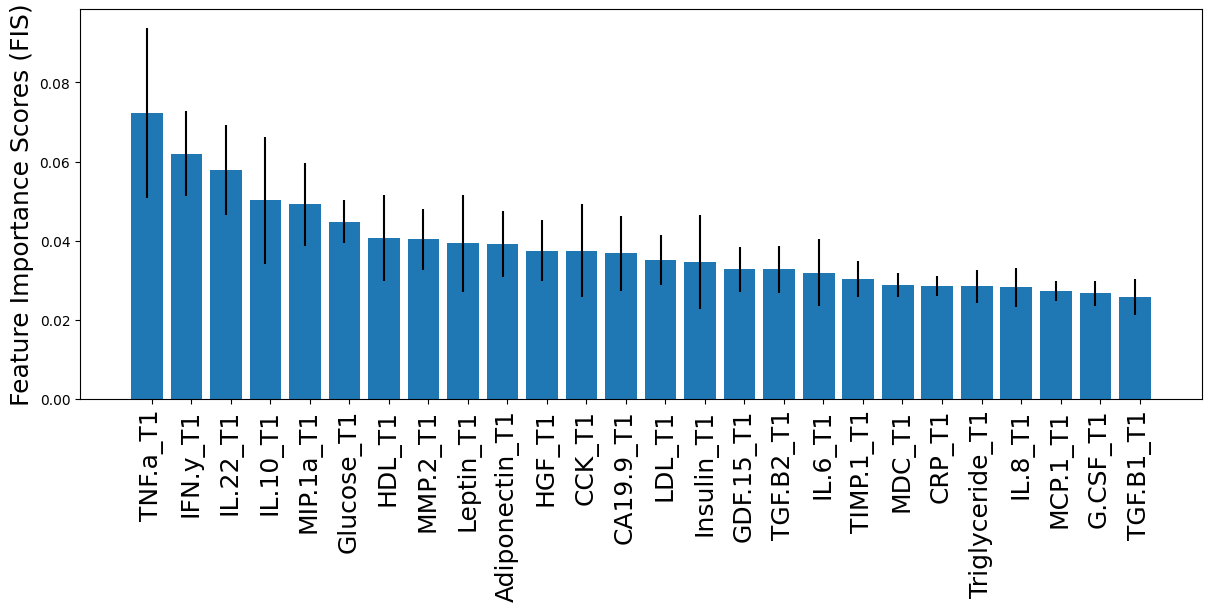

In [68]:

x = np.arange(len(s_mean_std_list))  # the label locations
width = 0.12  # the width of the bars
multiplier = 0

#print(x)

fig, ax = plt.subplots(layout='constrained', figsize=(12,6))

for i in range(len(s_mean_std_list)):
    ax.bar(s_mean_std_list[i][0], s_mean_std_list[i][1], yerr=s_mean_std_list[i][2], color='C0')
    # ax.barh(s_mean_std_list[i][0], s_mean_std_list[i][1], yerr=s_mean_std_list[i][2], color='C0')
    
ax.set_xticks(x + width, s_features, rotation='vertical', fontsize=18)
ax.set_ylabel('Feature Importance Scores (FIS)', fontsize=18)


# x = np.arange(len(s_mean_std_list))  # the label locations
# width = 0.12  # the width of the bars
# multiplier = 0

# #print(x)

# fig, ax = plt.subplots(layout='constrained', figsize=(12,6))

# for i in range(len(s_mean_std_list)):
#     ax.bar(s_mean_std_list[i][0], s_mean_std_list[i][1], yerr=s_mean_std_list[i][2], color='C0')
#     # ax.barh(s_mean_std_list[i][0], s_mean_std_list[i][1], yerr=s_mean_std_list[i][2], color='C0')
    
# ax.set_xticks(x + width, s_features, rotation='vertical')
# ax.set_ylabel('Feature Importance Scores (FIS)')

savefig('./figs/PCa_Ca_ft')

In [69]:
#
Xt1_bt1 = Xt1_bt1.reset_index(); Xv1_bt1 = Xv1_bt1.reset_index(); yt1_bt1 = yt1_bt1.reset_index(); yv1_bt1 = yv1_bt1.reset_index()
Xt1_bt2 = Xt1_bt2.reset_index(); Xv1_bt2 = Xv1_bt2.reset_index(); yt1_bt2 = yt1_bt2.reset_index(); yv1_bt2 = yv1_bt2.reset_index()
Xt1_bt3 = Xt1_bt3.reset_index(); Xv1_bt3 = Xv1_bt3.reset_index(); yt1_bt3 = yt1_bt3.reset_index(); yv1_bt3 = yv1_bt3.reset_index()
Xt1_bt4 = Xt1_bt4.reset_index(); Xv1_bt4 = Xv1_bt4.reset_index(); yt1_bt4 = yt1_bt4.reset_index(); yv1_bt4 = yv1_bt4.reset_index()
Xt1_bt5 = Xt1_bt5.reset_index(); Xv1_bt5 = Xv1_bt5.reset_index(); yt1_bt5 = yt1_bt5.reset_index(); yv1_bt5 = yv1_bt5.reset_index()

Xt2_bt1 = Xt2_bt1.reset_index(); Xv2_bt1 = Xv2_bt1.reset_index(); yt2_bt1 = yt2_bt1.reset_index(); yv2_bt1 = yv2_bt1.reset_index()
Xt2_bt2 = Xt2_bt2.reset_index(); Xv2_bt2 = Xv2_bt2.reset_index(); yt2_bt2 = yt2_bt2.reset_index(); yv2_bt2 = yv2_bt2.reset_index()
Xt2_bt3 = Xt2_bt3.reset_index(); Xv2_bt3 = Xv2_bt3.reset_index(); yt2_bt3 = yt2_bt3.reset_index(); yv2_bt3 = yv2_bt3.reset_index()
Xt2_bt4 = Xt2_bt4.reset_index(); Xv2_bt4 = Xv2_bt4.reset_index(); yt2_bt4 = yt2_bt4.reset_index(); yv2_bt4 = yv2_bt4.reset_index()
Xt2_bt5 = Xt2_bt5.reset_index(); Xv2_bt5 = Xv2_bt5.reset_index(); yt2_bt5 = yt2_bt5.reset_index(); yv2_bt5 = yv2_bt5.reset_index()

#
Xv1_bt1 = Xv1_bt1.drop('index', axis=1); yv1_bt1 = yv1_bt1.drop('index', axis=1); Xt1_bt1 = Xt1_bt1.drop('index', axis=1); yt1_bt1 = yt1_bt1.drop('index', axis=1)
Xv1_bt2 = Xv1_bt2.drop('index', axis=1); yv1_bt2 = yv1_bt2.drop('index', axis=1); Xt1_bt2 = Xt1_bt2.drop('index', axis=1); yt1_bt2 = yt1_bt2.drop('index', axis=1)
Xv1_bt3 = Xv1_bt3.drop('index', axis=1); yv1_bt3 = yv1_bt3.drop('index', axis=1); Xt1_bt3 = Xt1_bt3.drop('index', axis=1); yt1_bt3 = yt1_bt3.drop('index', axis=1)
Xv1_bt4 = Xv1_bt4.drop('index', axis=1); yv1_bt4 = yv1_bt4.drop('index', axis=1); Xt1_bt4 = Xt1_bt4.drop('index', axis=1); yt1_bt4 = yt1_bt4.drop('index', axis=1)
Xv1_bt5 = Xv1_bt5.drop('index', axis=1); yv1_bt5 = yv1_bt5.drop('index', axis=1); Xt1_bt5 = Xt1_bt5.drop('index', axis=1); yt1_bt5 = yt1_bt5.drop('index', axis=1)

Xv2_bt1 = Xv2_bt1.drop('index', axis=1); yv2_bt1 = yv2_bt1.drop('index', axis=1); Xt2_bt1 = Xt2_bt1.drop('index', axis=1); yt2_bt1 = yt2_bt1.drop('index', axis=1)
Xv2_bt2 = Xv2_bt2.drop('index', axis=1); yv2_bt2 = yv2_bt2.drop('index', axis=1); Xt2_bt2 = Xt2_bt2.drop('index', axis=1); yt2_bt2 = yt2_bt2.drop('index', axis=1)
Xv2_bt3 = Xv2_bt3.drop('index', axis=1); yv2_bt3 = yv2_bt3.drop('index', axis=1); Xt2_bt3 = Xt2_bt3.drop('index', axis=1); yt2_bt3 = yt2_bt3.drop('index', axis=1)
Xv2_bt4 = Xv2_bt4.drop('index', axis=1); yv2_bt4 = yv2_bt4.drop('index', axis=1); Xt2_bt4 = Xt2_bt4.drop('index', axis=1); yt2_bt4 = yt2_bt4.drop('index', axis=1)
Xv2_bt5 = Xv2_bt5.drop('index', axis=1); yv2_bt5 = yv2_bt5.drop('index', axis=1); Xt2_bt5 = Xt2_bt5.drop('index', axis=1); yt2_bt5 = yt2_bt5.drop('index', axis=1)




In [70]:
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

datasets = [
    (Xt1_bt1, Xv1_bt1, yt1_bt1, yv1_bt1),
    (Xt1_bt2, Xv1_bt2, yt1_bt2, yv1_bt2),
    (Xt1_bt3, Xv1_bt3, yt1_bt3, yv1_bt3),
    (Xt1_bt4, Xv1_bt4, yt1_bt4, yv1_bt4),
    (Xt1_bt5, Xv1_bt5, yt1_bt5, yv1_bt5),
    (Xt2_bt1, Xv2_bt1, yt2_bt1, yv2_bt1),
    (Xt2_bt2, Xv2_bt2, yt2_bt2, yv2_bt2),
    (Xt2_bt3, Xv2_bt3, yt2_bt3, yv2_bt3),
    (Xt2_bt4, Xv2_bt4, yt2_bt4, yv2_bt4),
    (Xt2_bt5, Xv2_bt5, yt2_bt5, yv2_bt5),
]

# --- Store best-so-far accuracies for each replicate ---
acc_list_all = []

for Xt, Xv, yt, yv in datasets:
    yt = np.ravel(yt)  # ensure 1D
    yv = np.ravel(yv)
    
    acc_list = []
    # Start with first feature
    Xtr = Xt[[s_mean_std_list[0][0]]]
    Xte = Xv[[s_mean_std_list[0][0]]]
    rf = RandomForestClassifier(n_estimators=1800, random_state=0).fit(Xtr, yt)
    acc_list.append(rf.score(Xte, yv))
    
    # Add features sequentially
    for i in range(1, len(s_mean_std_list)):
        Xtr = pd.concat([Xtr, Xt[[s_mean_std_list[i][0]]]], axis=1)
        Xte = pd.concat([Xte, Xv[[s_mean_std_list[i][0]]]], axis=1)
        rf = RandomForestClassifier(n_estimators=1800, random_state=0).fit(Xtr, yt)
        acc_list.append(rf.score(Xte, yv))
    
    # Apply best-so-far smoothing
    acc_list_best = np.maximum.accumulate(acc_list)
    acc_list_all.append(acc_list_best)
    # acc_list_all.append(acc_list)

acc_array = np.array(acc_list_all)


# --- Mean ± 95% CI ---
mean_acc = acc_array.mean(axis=0)
ci95 = 1.96 * acc_array.std(axis=0, ddof=1) / np.sqrt(acc_array.shape[0])
x = np.arange(1, len(mean_acc) + 1)

# --- Find elbow ---
knee = KneeLocator(x, mean_acc, curve="concave", direction="increasing")
elbow_point = knee.knee


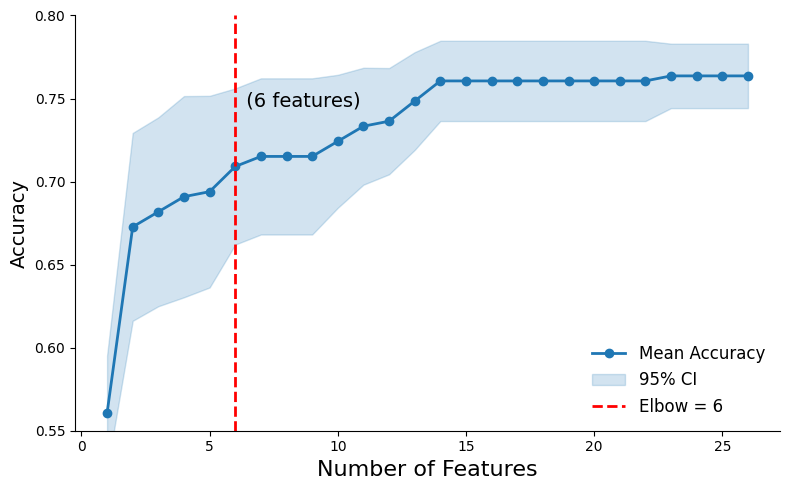

In [71]:
# --- Plot (Updated Formatting like Code B) ---
plt.figure(figsize=(8, 5))

plt.plot(x, mean_acc, marker='o', color='C0', linewidth=2, label='Mean Accuracy')
plt.fill_between(x, mean_acc - ci95, mean_acc + ci95, color='C0', alpha=0.2, label='95% CI')

if elbow_point is not None:
    plt.axvline(elbow_point, color='red', linestyle='--', lw=2, label=f'Elbow = {elbow_point}')
    plt.annotate(
        f' ({elbow_point} features) ',
        xy=(elbow_point, mean_acc[int(elbow_point)]),
        xytext=(elbow_point + 0.2, mean_acc[int(elbow_point)] + 0.03),
        arrowprops=None, fontsize=14
    )

plt.xlabel("Number of Features", fontsize=16)
plt.ylabel("Accuracy", fontsize=14)
plt.ylim([0.55, 0.80])  # Adjust y-axis limits like Code B
# plt.grid(True)

# Remove top and right spines
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

plt.legend(frameon=False, fontsize=12)
plt.tight_layout()
plt.show()


In [72]:
# # visualize confusion matrix with seaborn heatmap

# def my_cm(c_matrix):
#     labels = ['TP','FN','FP','TN']
#     categories = ['PCa', 'NCa']
#     make_confusion_matrix(c_matrix,
#                           group_names=labels,
#                           categories=categories,
#                           cmap='Blues')

# visualize confusion matrix with seaborn heatmap

def my_cm(c_matrix):
    labels = ['TP','FN','FP','TN']
    categories = ['PCa', 'Ca']
    make_confusion_matrix(c_matrix,
                          group_names=labels,
                          categories=categories,
                          cmap='Blues')

In [73]:
# run_it_oob_optimization(oob_probs, labels_train, thresholds, ThOpt_metrics = 'Kappa'):

def run_it_oob_optimization(oob_probs, labels_train, thresholds, ThOpt_metrics):
    # Optmize the decision threshold based on the Cohen's Kappa coefficient
    if ThOpt_metrics == 'Kappa':
        tscores = []
        # evaluate the score on the oob using different thresholds
        for thresh in thresholds:
            scores = [1 if x>=thresh else -1 for x in oob_probs]
            kappa = metrics.cohen_kappa_score(labels_train,scores)
            tscores.append((np.round(kappa,3),thresh))
        # select the threshold providing the highest kappa score as optimal
        tscores.sort(reverse=True)
        imb_mcc_kap = tscores[0][0]
        thresh = tscores[0][-1]
    # Optmize the decision threshold based on the MCC
    elif ThOpt_metrics == 'MCC':
        tscores = []
        # evaluate the score on the oob using different thresholds
        for thresh in thresholds:
            scores = [1 if x>=thresh else -1 for x in oob_probs]
            mcc = metrics.matthews_corrcoef(labels_train,scores)
            tscores.append((np.round(mcc,3),thresh))
        # select the threshold providing the highest mcc score as optimal
        tscores.sort(reverse=True)
        imb_mcc_kap = tscores[0][0]
        thresh = tscores[0][-1]
    
    return imb_mcc_kap, thresh

In [74]:
from sklearn import metrics
import numpy as np

def calc_metrics(labels_test, test_probs, threshold, ThOpt_metrics):
    if ThOpt_metrics == 'Kappa':
        scores = [1 if x>=threshold else -1 for x in test_probs]
        auc = metrics.roc_auc_score(labels_test, test_probs)
        kappa = metrics.cohen_kappa_score(labels_test,scores)
        confusion = metrics.confusion_matrix(labels_test,scores, labels=list(set(labels_test)))
        print('thresh: %.4f, kappa: %.4f, AUC test-set: %.4f'%(threshold, kappa, auc))
        print(confusion)
        print(metrics.classification_report(labels_test,scores))
    elif ThOpt_metrics == 'MCC':
        scores = [1 if x>=threshold else -1 for x in test_probs]
        auc = metrics.roc_auc_score(labels_test, test_probs)
        mcc = metrics.matthews_corrcoef(labels_test,scores)
        confusion = metrics.confusion_matrix(labels_test,scores, labels=list(set(labels_test)))
        print('thresh: %.4f, mcc: %.4f, AUC test-set: %.4f'%(threshold, mcc, auc))
        print(confusion)
        print(metrics.classification_report(labels_test,scores))
    return confusion

In [75]:
def best_param_svm_search(X_train,y_train,n_splits,hyper_params,Cs,gammas,filename1,filename2,kl,rnd_st):
    
    # creating a KFold object with n splits
    folds = KFold(n_splits = n_splits, shuffle = True, random_state = rnd_st)
    model = SVC(kernel=kl)  # specify model
    
    # set up GridSearchCV()
    model_cv = GridSearchCV(estimator = model, param_grid = hyper_params, \
                        scoring= 'accuracy', cv = folds, verbose = 1,\
                        return_train_score=True, n_jobs = -1)
    # fit the model
    model_cv.fit(X_train, y_train)
    
    # obtaining the optimal accuracy score and hyperparameters
    best_score = model_cv.best_score_
    best_hyperparams = model_cv.best_params_
    
    best_C = best_hyperparams['C']
    best_gamma = best_hyperparams['gamma']
    
    cv_res = pd.DataFrame(model_cv.cv_results_)
    cv_res[["param_C", "param_gamma"]] = cv_res[["param_C", "param_gamma"]].astype(np.float64)
    
    # reshape values into a matrix with 'X' and 'Y' grid equals 'C' and 'gamma' respt
    test_scores_matrix = cv_res.pivot(
        index="param_gamma", columns="param_C", values="mean_test_score")
    
    train_scores_matrix = cv_res.pivot(
        index="param_gamma", columns="param_C", values="mean_train_score")
    
    # # values corresponding to 'best_C' and 'best_gamma' 
    # z1 = test_scores_matrix.loc[best_C,best_gamma]   # this line may be buggy
    # z2 = train_scores_matrix.loc[best_C,best_gamma]  # this line may be buggy
    
    ###########################################################################################
    
    
    fig1, (ax1, ax2) = plt.subplots(figsize=(13, 4), ncols=2)
    
    # plot imshow test accuracy
    Z1 = test_scores_matrix
    im1 = ax1.imshow(Z1, interpolation='none', cmap=cm.coolwarm,
                   origin='lower', extent=[Cs[0], Cs[-1], gammas[0], gammas[-1]], aspect=6)  # cmap='seismic', cmap=cm.coolwarm
    ax1.plot(best_C, best_gamma, marker='*', color="black")
    ax1.annotate(
        f'best param \n ({best_C:.3f}, {best_gamma:.3f})',
        xy=(best_C, best_gamma),
        xytext=(best_C+0.2, best_gamma+0.03),
        arrowprops=None, fontsize=10)
    ax1.set_xlabel("C", fontsize=15)
    ax1.set_ylabel(r'$\gamma$', fontsize=15)
    ax1.set_title("Test Accuracy \n Kernel = {} \n cv = {:d}".format(kl,n_splits), fontsize=15)
    bar1 = plt.colorbar(im1)
    
    # plot imshow training accuracy
    Z2 = train_scores_matrix
    im2 = ax2.imshow(Z2, interpolation='none', cmap=cm.coolwarm,
                   origin='lower', extent=[Cs[0], Cs[-1], gammas[0], gammas[-1]], aspect=6)  # cmap='seismic', cmap=cm.coolwarm
    ax2.plot(best_C, best_gamma, marker='*', color="black")
    ax2.annotate(
        f'best param \n ({best_C:.3f}, {best_gamma:.3f})',
        xy=(best_C, best_gamma),
        xytext=(best_C+0.2, best_gamma+0.03),
        arrowprops=None, fontsize=10)
    ax2.set_xlabel("C", fontsize=15)
    ax2.set_ylabel(r'$\gamma$', fontsize=15)
    ax2.set_title("Train Accuracy \n Kernel = {} \n cv = {:d}".format(kl,n_splits), fontsize=15)
    bar2 = plt.colorbar(im2)
    
    plt.tight_layout
    # plt.gca().format_coord = fmt
    savefig(filename1)
    
    #############################################################################################
    
    fig2, (ax1, ax2) = plt.subplots(subplot_kw={"projection": "3d"},figsize=(12, 5), ncols=2)
    
    # Plot the surface for test accuracy.
    X1 = Cs; Y1 = gammas; 
    X1, Y1 = np.meshgrid(X1, Y1)
    Z1 = test_scores_matrix
    surf1 = ax1.plot_surface(X1, Y1, Z1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
    
    # ax1.text(best_C, best_gamma, z1, "*", color='black')
    ax1.set_xlabel("C", fontsize=15)
    ax1.set_ylabel(r'$\gamma$', fontsize=15)
    ax1.yaxis._axinfo['label']['space_factor'] = 3.0
    ax1.zaxis.set_rotate_label(True)
    ax1.set_zlabel('Accuracy', fontsize=15, rotation = -90)
    ax1.set_title("Test Accuracy \n Kernel = {} \n cv = {:d}".format(kl,n_splits), fontsize=15)
    bar1 = plt.colorbar(surf1, shrink=0.6, pad=0.05,location='left')
    
    # Plot the surface for train accuracy.
    X2 = Cs; Y2 = gammas; 
    X2, Y2 = np.meshgrid(X2, Y2)
    Z2 = train_scores_matrix
    surf2 = ax2.plot_surface(X2, Y2, Z2, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
    
    # ax2.text(best_C, best_gamma, z2, "*", color='black')
    ax2.set_xlabel("C", fontsize=15)
    ax2.set_ylabel(r'$\gamma$', fontsize=15)
    ax2.yaxis._axinfo['label']['space_factor'] = 3.0
    ax2.zaxis.set_rotate_label(True)
    ax2.set_zlabel('Accuracy', fontsize=15, rotation = -90)
    ax2.set_title("Train Accuracy \n Kernel = {} \n cv = {:d}".format(kl,n_splits), fontsize=15)
    bar2 = plt.colorbar(surf2, shrink=0.6, pad=0.05,location='left')
    
    plt.tight_layout
    # plt.gca().format_coord = fmt
    savefig(filename2)
    
    # plt.show()
    
    return best_score, best_hyperparams

#, z1, z2


In [76]:

# # NCa v PCa
# ndata_NCa_PCa = ndata_noR_md[ndata_noR_md["CACHEXSTAGE0VIG"] != 2]
# ndata_NCa_PCa.reset_index(drop=True, inplace=True)
# print(ndata_NCa_PCa.shape)


# PCa v Ca
ndata_PCa_Ca = ndata_noR_md[ndata_noR_md["CACHEXSTAGE0VIG"] != 0]
ndata_PCa_Ca.reset_index(drop=True, inplace=True)
print(ndata_PCa_Ca.shape)


(156, 27)


In [77]:
# ## NCa v PCa

# # Replace all occurrences of 0 with -1
# ndata_NCa_PCa["CACHEXSTAGE0VIG"] = ndata_NCa_PCa["CACHEXSTAGE0VIG"].replace(0, -1)

# ndata_NCa_PCa = ndata_NCa_PCa.apply(pd.to_numeric) # convert all columns of Ndata to numerics

# X = ndata_NCa_PCa.iloc[:,:-1]
# y = ndata_NCa_PCa.iloc[:, -1] #.values

# # X.head()

## PCa v Ca

# Replace all occurrences of 2 with -1
ndata_PCa_Ca["CACHEXSTAGE0VIG"] = ndata_PCa_Ca["CACHEXSTAGE0VIG"].replace(2, -1)

ndata_PCa_Ca = ndata_PCa_Ca.apply(pd.to_numeric) # convert all columns of Ndata to numerics

X = ndata_PCa_Ca.iloc[:,:-1]
y = ndata_PCa_Ca.iloc[:, -1] #.values

# X.head()



In [78]:
#

X_train, X_test, y_train, y_test = data_split(X,y,rnd_st=1234,tst_sz=0.30)        # working best for now


In [79]:
# X_train

X_train_9f = X_train[['TNF.a_T1', 'IFN.y_T1', 'IL.22_T1', 'IL.10_T1', 'MIP.1a_T1', 'Glucose_T1',]] # 'Lumican_T1', 'MMP.2_T1', 'Glucose_T1']]
    
    #'TNF.a_T1', 'IFN.y_T1', 'MIP.1a_T1', 'IL.10_T1', 'IL.22_T1', 'Glucose_T1', 'TGF.B2_T1', 'MMP.2_T1', 
     #                 'MIP.3a_T1', 'Lumican_T1', 'Leptin_T1', 'HDL_T1', 'Adiponectin_T1']]

# X_train_9f = X_train[['CRP_T1', 'ZAG_T1', 'Insulin_T1',]]
                       

X_train_9f.head()

TNF.a_T1    IFN.y_T1     IL.22_T1   IL.10_T1  MIP.1a_T1  Glucose_T1
5     47.38120   61.991651     1.129430  10.268042  237.80502      74.872
29    23.67767  226.174962  1667.403196   1.940140  112.06227      77.262
102  148.64877  129.288644    12.634103  61.283754  493.19249     163.506
1     52.76875  129.541610    22.245552  21.200147  224.14982     110.053
57    41.17249  168.143289     2.977499   9.272504  169.82977      78.100

In [80]:
# X_test

X_test_9f = X_test[['TNF.a_T1', 'IFN.y_T1', 'IL.22_T1', 'IL.10_T1', 'MIP.1a_T1', 'Glucose_T1',]] # 'Lumican_T1', 'MMP.2_T1', 'Glucose_T1']]
    
    #'TNF.a_T1', 'IFN.y_T1', 'MIP.1a_T1', 'IL.10_T1', 'IL.22_T1', 'Glucose_T1', 'TGF.B2_T1', 'MMP.2_T1', 
     #                 'MIP.3a_T1', 'Lumican_T1', 'Leptin_T1', 'HDL_T1', 'Adiponectin_T1']] 
        
# X_test_9f = X_test[['CRP_T1', 'ZAG_T1', 'Insulin_T1',]]

X_test_9f.head()

TNF.a_T1    IFN.y_T1   IL.22_T1   IL.10_T1  MIP.1a_T1  Glucose_T1
116  60.36252  125.865614  24.753866  13.982123  180.85196      72.738
4    50.65338   75.390487   3.830507   6.770730  204.15563      61.746
17   38.47259  915.135372  18.684440  15.093198  200.49830      75.562
23   31.89892    9.787331   0.948488  17.147024  305.95819     158.150
68   26.22025   81.936459   2.940799   1.866093  127.60723      97.875

In [81]:
scaler = StandardScaler().fit(X_train_9f) # build a scaler for the training data


In [82]:
# scaled x_train

X_train_sc = scaler.transform(X_train_9f) # use the scaler to transform the training data

In [83]:
# scaled x_test

X_test_sc = scaler.transform(X_test_9f) # use the scaler to transform the testing data


In [84]:
print(X_train_sc.shape)

(109, 6)


In [85]:
print(X_test_sc.shape)

(47, 6)


In [86]:
# print(y_train)

In [87]:
print(y_test)

116   -1.0
4      1.0
17     1.0
23    -1.0
68    -1.0
125   -1.0
104   -1.0
85    -1.0
60    -1.0
2     -1.0
38    -1.0
47    -1.0
155   -1.0
91     1.0
82     1.0
72     1.0
130    1.0
61    -1.0
113   -1.0
44    -1.0
51    -1.0
10     1.0
55    -1.0
3     -1.0
117   -1.0
152   -1.0
58     1.0
143   -1.0
109    1.0
40     1.0
24     1.0
65     1.0
0     -1.0
121   -1.0
144   -1.0
101   -1.0
90    -1.0
153    1.0
79    -1.0
32     1.0
77    -1.0
39     1.0
30    -1.0
45    -1.0
16     1.0
80    -1.0
150   -1.0
Name: CACHEXSTAGE0VIG, dtype: float64


In [88]:
# We aim to create a 95% confidence interval

import scipy.stats

def accuracy_normal(y_true, y_pred):
    digits=4
    confidence = 0.95  # Change to your desired confidence level
    z_value = scipy.stats.norm.ppf((1 + confidence) / 2.0)
    check_consistent_length(y_true, y_pred)
    acc_test = accuracy_score(y_true, y_pred)
    ci_length = z_value * np.sqrt((acc_test * (1 - acc_test)) / y_true.shape[0])
    ci_lower = acc_test - ci_length
    ci_upper = acc_test + ci_length
    bounds = np.array([round(ci_lower, digits), round(ci_upper, digits)])
    return bounds

def recall_normal(y_true, y_pred):
    digits=4
    confidence = 0.95  # Change to your desired confidence level
    z_value = scipy.stats.norm.ppf((1 + confidence) / 2.0)
    check_consistent_length(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred,labels=list(set(y_true)))
    recall    = cm[0,0] / sum(cm[0,:])
    ci_length = z_value * np.sqrt((recall * (1 - recall)) / y_true.shape[0])
    ci_lower = recall - ci_length
    ci_upper = recall + ci_length
    bounds = np.array([round(ci_lower, digits), round(ci_upper, digits)])
    return bounds

def precision_normal(y_true, y_pred):
    digits=4
    confidence = 0.95  # Change to your desired confidence level
    z_value = scipy.stats.norm.ppf((1 + confidence) / 2.0)
    check_consistent_length(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred,labels=list(set(y_true)))
    precision = cm[0,0] / sum(cm[:,0])
    ci_length = z_value * np.sqrt((precision * (1 - precision)) / y_true.shape[0])
    ci_lower = precision - ci_length
    ci_upper = precision + ci_length
    bounds = np.array([round(ci_lower, digits), round(ci_upper, digits)])
    return bounds

def npv_normal(y_true, y_pred):
    digits=4
    confidence = 0.95  # Change to your desired confidence level
    z_value = scipy.stats.norm.ppf((1 + confidence) / 2.0)
    check_consistent_length(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred,labels=list(set(y_true)))
    npv    = cm[1,1] / sum(cm[:,1])
    ci_length = z_value * np.sqrt((npv * (1 - npv)) / y_true.shape[0])
    ci_lower = npv - ci_length
    ci_upper = npv + ci_length
    bounds = np.array([round(ci_lower, digits), round(ci_upper, digits)])
    return bounds

def specificity_normal(y_true, y_pred):
    digits=4
    confidence = 0.95  # Change to your desired confidence level
    z_value = scipy.stats.norm.ppf((1 + confidence) / 2.0)
    check_consistent_length(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred,labels=list(set(y_true)))
    specificity = cm[1,1] / sum(cm[1,:])
    ci_length = z_value * np.sqrt((specificity * (1 - specificity)) / y_true.shape[0])
    ci_lower = specificity - ci_length
    ci_upper = specificity + ci_length
    bounds = np.array([round(ci_lower, digits), round(ci_upper, digits)])
    return bounds
    





In [89]:
# We aim to create a 95% confidence interval, so we use a :code:`z_score` of 1.959964
z_score = 1.959964
digits_of_precision = 4
error_labels_legend = "95% Confidence Interval"


def general_wilson(p, n, digits=4, z=1.959964):
    """Return lower and upper bound of a Wilson confidence interval.

    Parameters
    ----------
    p : float
        Proportion of successes.
    n : int
        Total number of trials.
    digits : int
        Digits of precision to which the returned bound will be rounded
    z : float
        Z-score, which indicates the number of standard deviations of confidence.
        The default value of 1.959964 is for a 95% confidence interval

    Returns
    -------
        np.ndarray
        Array of length 2 of form: [lower_bound, upper_bound]
    """
    denominator = 1 + z**2 / n
    centre_adjusted_probability = p + z * z / (2 * n)
    adjusted_standard_deviation = np.sqrt((p * (1 - p) + z * z / (4 * n))) / np.sqrt(n)
    lower_bound = (
        centre_adjusted_probability - z * adjusted_standard_deviation
    ) / denominator
    upper_bound = (
        centre_adjusted_probability + z * adjusted_standard_deviation
    ) / denominator
    return np.array([round(lower_bound, digits), round(upper_bound, digits)])

def accuracy_wilson(y_true, y_pred):
    check_consistent_length(y_true, y_pred)
    score = accuracy_score(y_true, y_pred)
    bounds = general_wilson(score, len(y_true), digits_of_precision, z_score)
    return bounds

def recall_wilson(y_true, y_pred):
    # Sensitivity / True positive rate
    check_consistent_length(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred,labels=list(set(y_true)))
    tp = cm[0,0]; fn = cm[0,1]; fp = cm[1,0]; tn = cm[1,1]
    # tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    bounds = general_wilson(tp / (tp + fn), tp + fn, digits_of_precision, z_score)
    return bounds

def precision_wilson(y_true, y_pred):
    # Positive predictive value
    check_consistent_length(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred,labels=list(set(y_true)))
    tp = cm[0,0]; fn = cm[0,1]; fp = cm[1,0]; tn = cm[1,1]
    # tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    bounds = general_wilson(tp / (tp + fp), tp + fp, digits_of_precision, z_score)
    return bounds

def npv_wilson(y_true, y_pred):
    check_consistent_length(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred,labels=list(set(y_true)))
    tp = cm[0,0]; fn = cm[0,1]; fp = cm[1,0]; tn = cm[1,1]
    # tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    bounds = general_wilson(tn / (tn + fn), tn + fn, digits_of_precision, z_score)
    return bounds

def specificity_wilson(y_true, y_pred):
    check_consistent_length(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred,labels=list(set(y_true)))
    tp = cm[0,0]; fn = cm[0,1]; fp = cm[1,0]; tn = cm[1,1]
    # tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    bounds = general_wilson(tn / (tn + fp), tn + fp, digits_of_precision, z_score)
    return bounds


In [90]:
def conc_arrX_vecY(X,y):
    y_arr = y.reshape((y.shape[0], 1))
    Xy = np.append(X, y_arr,1)
    return Xy

def bootstrap_sampl(X,num_samples):
    bootstrap_means = np.zeros(num_samples)
    bootstrap_tr_list = [[] for _ in range(num_samples)]
    
    for i in range(num_samples):
        rng = np.random.default_rng()
        bootstrap_sample_tr = rng.choice(X, size=int(0.7*len(X)), replace=False)
        bootstrap_tr_list[i].append(bootstrap_sample_tr)
        bootstrap_mean = np.mean(bootstrap_sample_tr)
        bootstrap_means[i] = bootstrap_mean      
    est_mean = np.mean(bootstrap_means)
    est_std = np.std(bootstrap_means, ddof=1)
    
    return bootstrap_tr_list,est_mean,est_std

In [91]:
def model_svm_predict(X_train,y_train,X_test,y_test,best_hyperparams,n_splits,K_R_M,kl):
    model = SVC(C = best_hyperparams['C'], 
                gamma = best_hyperparams['gamma'], 
                kernel=kl,
                probability=True)
    model.fit(X_train, y_train)
    
    # predict
    y_pred = model.predict(X_test)
    
    # Get prediction probabilities for the test set
    test_probs = model.predict_proba(X_test)[:,1]
    
    fpr1, tpr1, _ = roc_curve(y_test,test_probs)
    auc1 = round(roc_auc_score(y_test,test_probs),4)
    
    tpr1_mean = np.mean(tpr1); tpr1_std = np.std(tpr1)
    
     ###################################################################################################################
    # Print confusion matrix and classification metrics (test set)
    cm_test_50=calc_metrics(y_test, test_probs, threshold = 0.5,ThOpt_metrics = K_R_M)
    
    # extract oob prediction probabilities from the trained svm model
    oob_probs = model.predict_proba(X_train)[:,1] # this shd be an oob from the training set
    
    # optmize the threshold 
    thresholds = np.round(np.arange(0.1,0.9,0.0001),4)
    mcc_opt,threshold_Opt = run_it_oob_optimization(oob_probs, y_train, thresholds, ThOpt_metrics = K_R_M)
    
    # Print confusion matrix and classification metrics (test set)
    cm_test_Opt=calc_metrics(y_test, test_probs, threshold = threshold_Opt,ThOpt_metrics = K_R_M)
    
    ###################################################################################################################
    fig1, (ax1, ax2) = plt.subplots(figsize=(16, 8), ncols=2)
    # subplot 1
    ax1.plot(fpr1,tpr1, label="Test Data, AUC={:.3f}".format(auc1),lw=2,alpha=0.8)
    ax1.set_ylabel("True positive rate (Sensitivity)", fontsize=20)
    ax1.set_xlabel("False positive rate (1 - Specificity)", fontsize=20)
    ax1.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05])
    xx = np.linspace(0,1,100)
    yy = xx
    ax1.plot(xx,yy,'k--')
    ax1.legend();
    
    # subplot 2
    ax2.plot(fpr1,tpr1, label="Test Data, AUC={:.3f}".format(auc1),lw=2,alpha=0.8)
    ax2.fill_between(fpr1,
                     tpr1-(1.96*tpr1_std/np.sqrt(tpr1.shape[0])),
                     tpr1+(1.96*tpr1_std/np.sqrt(tpr1.shape[0])),
                     alpha=0.2)
    ax2.set_ylabel("True positive rate (Sensitivity)", fontsize=20)
    ax2.set_xlabel("False positive rate (1 - Specificity)", fontsize=20)
    ax2.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05])
    
    xx = np.linspace(0,1,100)
    yy = xx
    ax2.plot(xx,yy,'k--')
    ax2.legend();
    

    return mcc_opt,threshold_Opt,y_pred,y_test,test_probs,cm_test_50,cm_test_Opt
    


In [92]:
# specify range of hyperparameters

rndSt = 123

c = np.arange(0, 10, 0.01)
gamma = np.arange(0, 2, 0.01)

hyper_params = [{'C': c, 'gamma': gamma}]


 ########################################################################## 

Fitting 2 folds for each of 200000 candidates, totalling 400000 fits
Highest test score found by GridSearchCV = 0.6885521885521886
Best hyperparameters found by GridSearchCV = {'C': 8.46, 'gamma': 0.03}


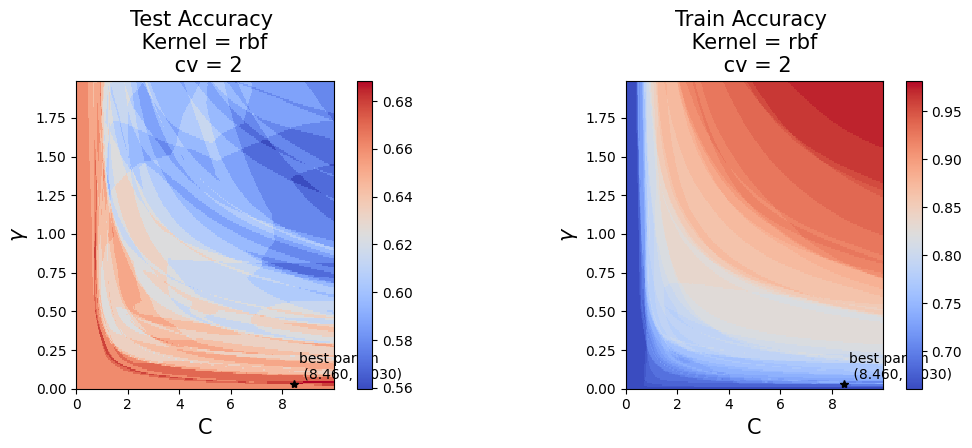

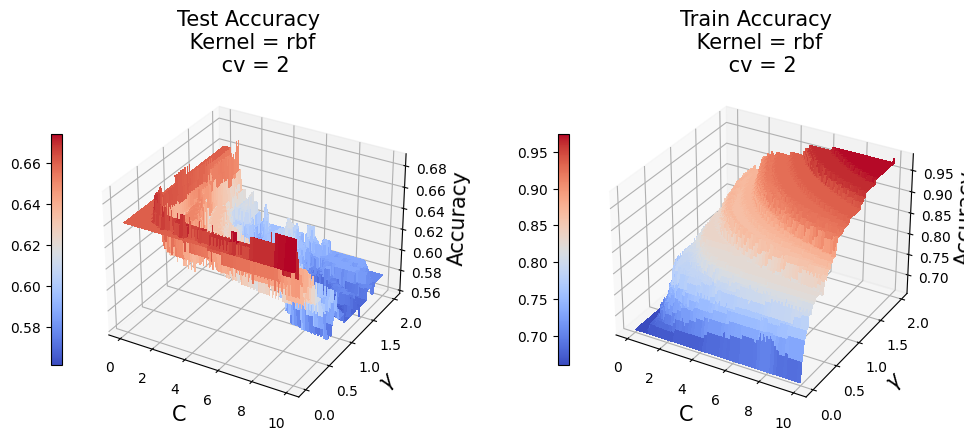

In [93]:
# cv = 2, kl = rbf, plot_surface and im_show

print('\n ########################################################################## \n')

best_score_cv2, best_hyperparams_cv2 = best_param_svm_search(X_train_sc,y_train,
                                                             2,hyper_params,c,gamma,
                                                             './figs/im_cv2','./figs/surf_cv2',
                                                             kl ="rbf",rnd_st=1234)
# cv is optimal if |best_test_score - best_train_score| is minimum

print("Highest test score found by GridSearchCV = " + str(best_score_cv2))
print("Best hyperparameters found by GridSearchCV = " + str(best_hyperparams_cv2))

# print("BestParam test score found from surface plot = " + str(best_test_sc_cv2))
# print("BestParam train score found from surface plot = " + str(best_train_sc_cv2))
# print("|bestParam_test_sc - bestParam_train_sc| =" + str(np.abs(best_test_sc_cv2 - best_train_sc_cv2)))


 ########################################################################## 

Fitting 3 folds for each of 200000 candidates, totalling 600000 fits
Highest test score found by GridSearchCV = 0.6966966966966966
Best hyperparameters found by GridSearchCV = {'C': 0.88, 'gamma': 1.21}


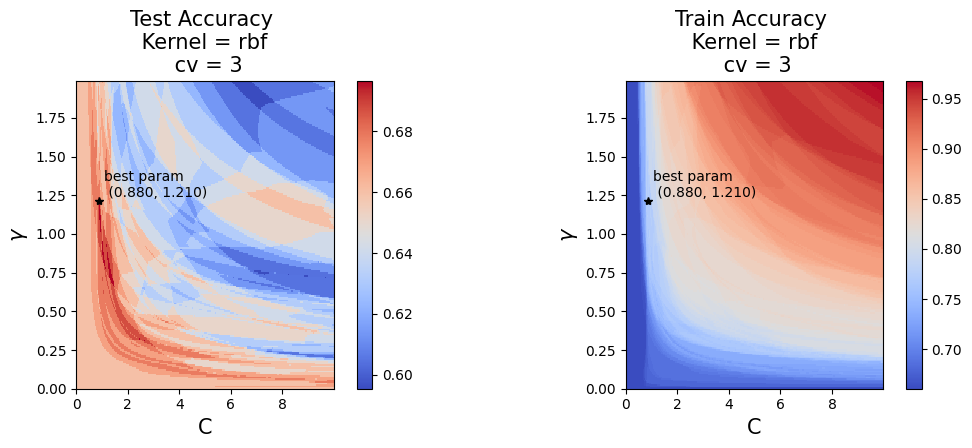

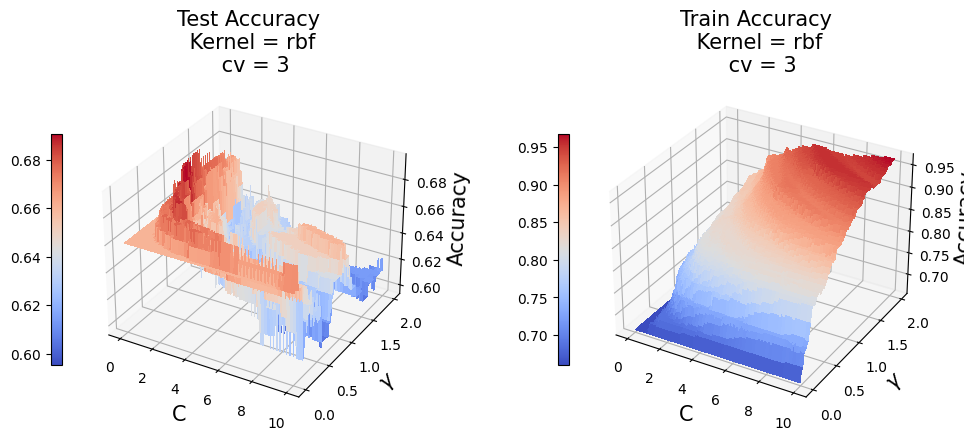

In [94]:
# cv = 3, kl = rbf, plot_surface and im_show

print('\n ########################################################################## \n')

best_score_cv3, best_hyperparams_cv3  = best_param_svm_search(X_train_sc,y_train,
                                                              3,hyper_params,c,gamma,
                                                              './figs/im_cv3','./figs/surf_cv3',
                                                              kl ="rbf",rnd_st=1234)
# cv is optimal if |best_test_score - best_train_score| is minimum

print("Highest test score found by GridSearchCV = " + str(best_score_cv3))
print("Best hyperparameters found by GridSearchCV = " + str(best_hyperparams_cv3))

# print("BestParam test score found from surface plot = " + str(best_test_sc_cv3))
# print("BestParam train score found from surface plot = " + str(best_train_sc_cv3))
# print("|bestParam_test_sc - bestParam_train_sc| =" + str(np.abs(best_test_sc_cv3 - best_train_sc_cv3)))


 ########################################################################## 

Fitting 4 folds for each of 200000 candidates, totalling 800000 fits
Highest test score found by GridSearchCV = 0.6689814814814815
Best hyperparameters found by GridSearchCV = {'C': 4.4, 'gamma': 0.01}


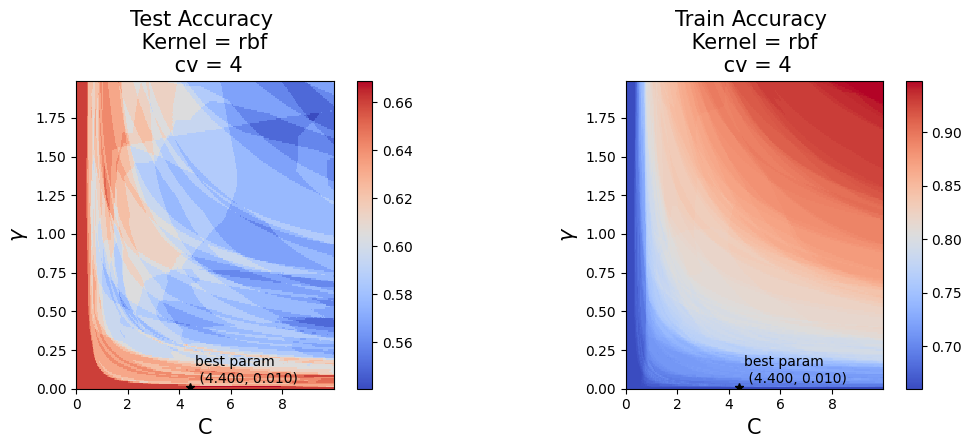

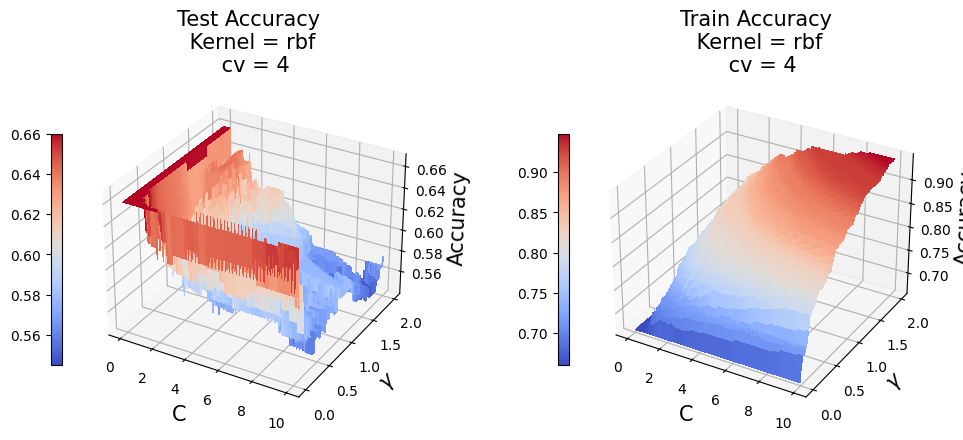

In [95]:
# cv = 4, kl = rbf, plot_surface and im_show

print('\n ########################################################################## \n')

best_score_cv4, best_hyperparams_cv4  = best_param_svm_search(X_train_sc,y_train,
                                                              4,hyper_params,c,gamma,
                                                              './figs/im_cv4','./figs/surf_cv4',
                                                              kl ="rbf",rnd_st=1234)
# cv is optimal if |best_test_score - best_train_score| is minimum

print("Highest test score found by GridSearchCV = " + str(best_score_cv4))
print("Best hyperparameters found by GridSearchCV = " + str(best_hyperparams_cv4))

# print("BestParam test score found from surface plot = " + str(best_test_sc_cv4))
# print("BestParam train score found from surface plot = " + str(best_train_sc_cv4))
# print("|bestParam_test_sc - bestParam_train_sc| =" + str(np.abs(best_test_sc_cv4 - best_train_sc_cv4)))


 ########################################################################## 

Fitting 5 folds for each of 200000 candidates, totalling 1000000 fits
Highest test score found by GridSearchCV = 0.6696969696969697
Best hyperparameters found by GridSearchCV = {'C': 2.11, 'gamma': 0.54}


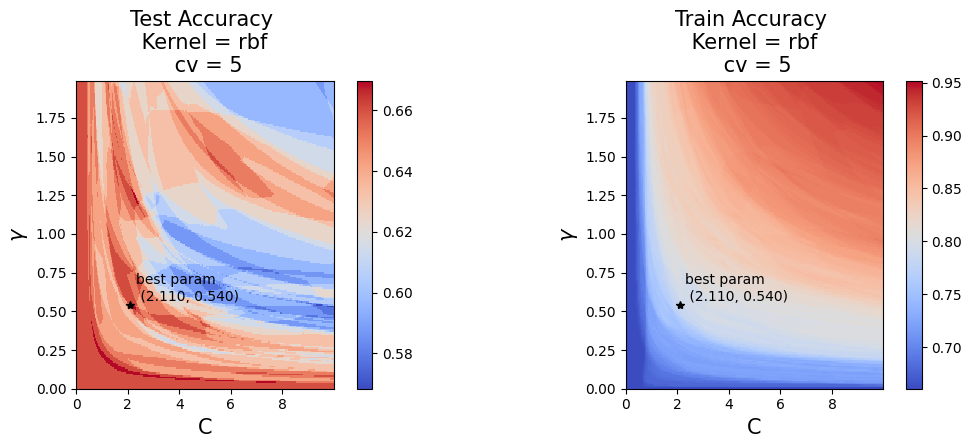

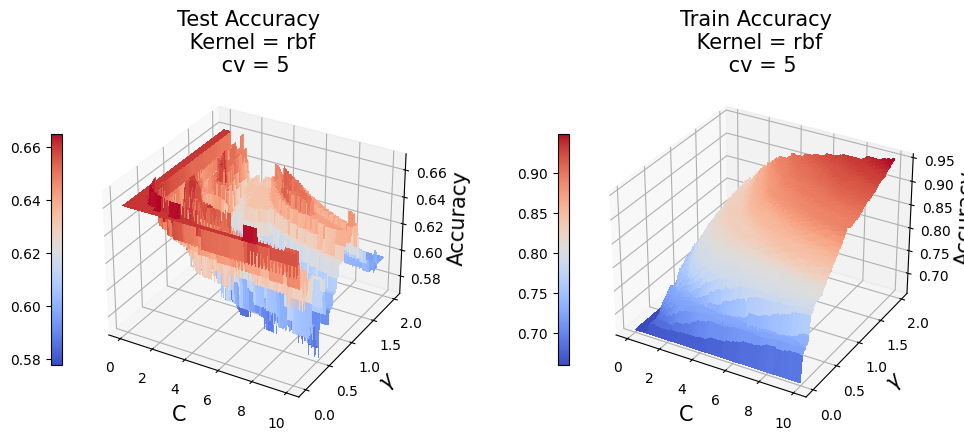

In [96]:
# cv = 5, kl = rbf, plot_surface and im_show

print('\n ########################################################################## \n')

best_score_cv5, best_hyperparams_cv5  = best_param_svm_search(X_train_sc,y_train,
                                                              5,hyper_params,c,gamma,
                                                              './figs/im_cv5','./figs/surf_cv5',
                                                              kl ="rbf",rnd_st=1234)
# cv is optimal if |best_test_score - best_train_score| is minimum

print("Highest test score found by GridSearchCV = " + str(best_score_cv5))
print("Best hyperparameters found by GridSearchCV = " + str(best_hyperparams_cv5))

# print("BestParam test score found from surface plot = " + str(best_test_sc_cv5))
# print("BestParam train score found from surface plot = " + str(best_train_sc_cv5))
# print("|bestParam_test_sc - bestParam_train_sc| =" + str(np.abs(best_test_sc_cv5 - best_train_sc_cv5)))


 ########################################################################## 

Fitting 6 folds for each of 200000 candidates, totalling 1200000 fits
Highest test score found by GridSearchCV = 0.6876218323586745
Best hyperparameters found by GridSearchCV = {'C': 1.41, 'gamma': 0.37}


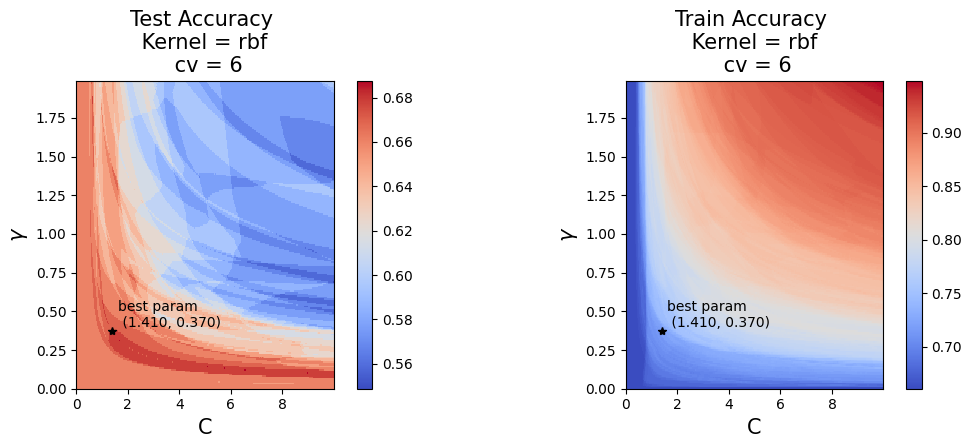

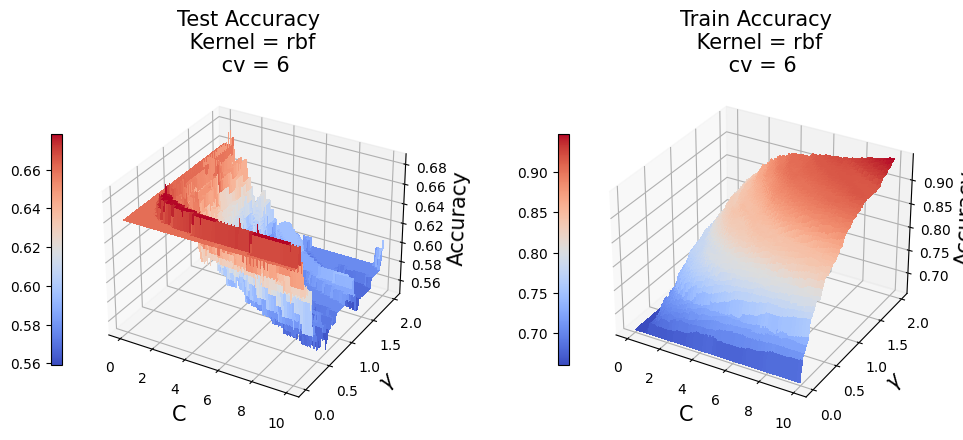

In [97]:
# cv = 6, kl = rbf, plot_surface and im_show

print('\n ########################################################################## \n')

best_score_cv6, best_hyperparams_cv6  = best_param_svm_search(X_train_sc,y_train,
                                                              6,hyper_params,c,gamma,
                                                              './figs/im_cv6','./figs/surf_cv6',
                                                              kl ="rbf",rnd_st=1234)
# cv is optimal if |best_test_score - best_train_score| is minimum

print("Highest test score found by GridSearchCV = " + str(best_score_cv6))
print("Best hyperparameters found by GridSearchCV = " + str(best_hyperparams_cv6))

# print("BestParam test score found from surface plot = " + str(best_test_sc_cv6))
# print("BestParam train score found from surface plot = " + str(best_train_sc_cv6))
# print("|bestParam_test_sc - bestParam_train_sc| =" + str(np.abs(best_test_sc_cv6 - best_train_sc_cv6)))


 ########################################################################## 

Fitting 7 folds for each of 200000 candidates, totalling 1400000 fits
Highest test score found by GridSearchCV = 0.6976190476190477
Best hyperparameters found by GridSearchCV = {'C': 0.75, 'gamma': 1.87}


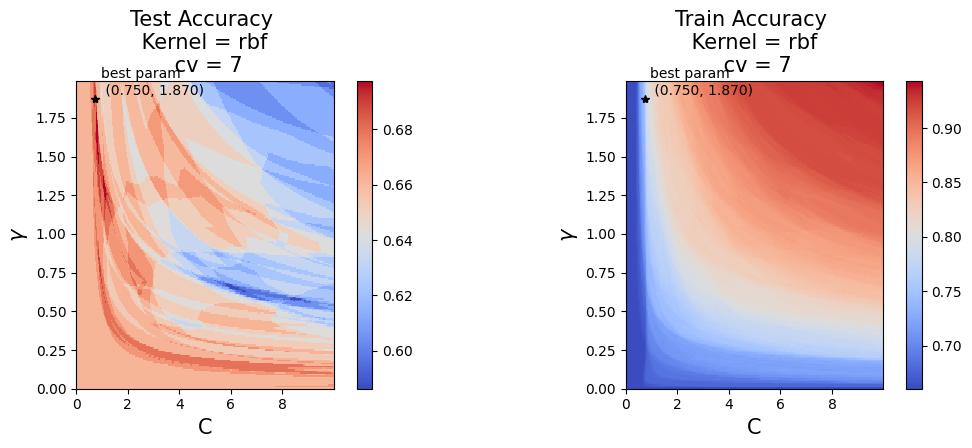

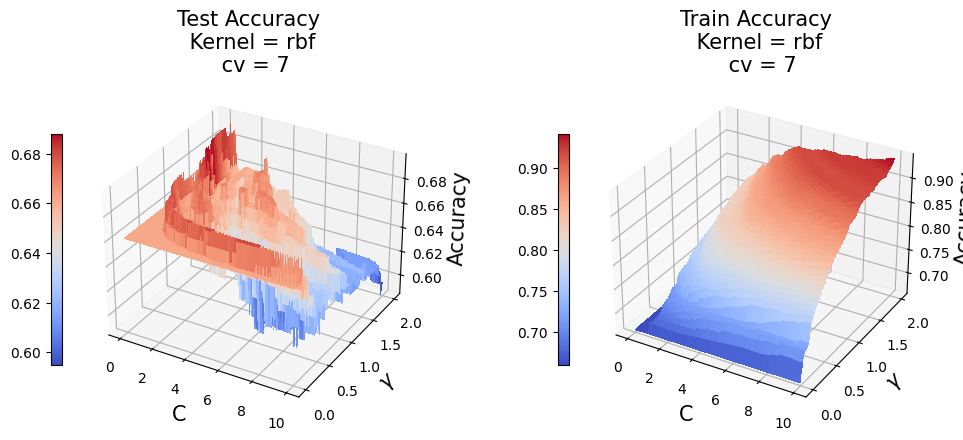

In [98]:
# cv = 7, kl = rbf, plot_surface and im_show

print('\n ########################################################################## \n')

best_score_cv7, best_hyperparams_cv7  = best_param_svm_search(X_train_sc,y_train,
                                                              7,hyper_params,c,gamma,
                                                              './figs/im_cv7','./figs/surf_cv7',
                                                              kl ="rbf",rnd_st=1234)
# cv is optimal if |best_test_score - best_train_score| is minimum

print("Highest test score found by GridSearchCV = " + str(best_score_cv7))
print("Best hyperparameters found by GridSearchCV = " + str(best_hyperparams_cv7))

# print("BestParam test score found from surface plot = " + str(best_test_sc_cv7))
# print("BestParam train score found from surface plot = " + str(best_train_sc_cv7))
# print("|bestParam_test_sc - bestParam_train_sc| =" + str(np.abs(best_test_sc_cv7 - best_train_sc_cv7)))


 ########################################################################## 

Fitting 8 folds for each of 200000 candidates, totalling 1600000 fits
Highest test score found by GridSearchCV = 0.6875
Best hyperparameters found by GridSearchCV = {'C': 1.41, 'gamma': 1.6500000000000001}


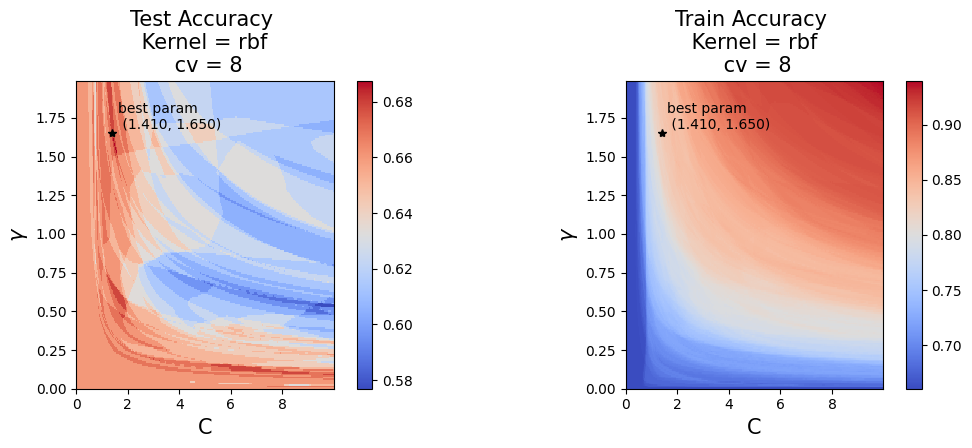

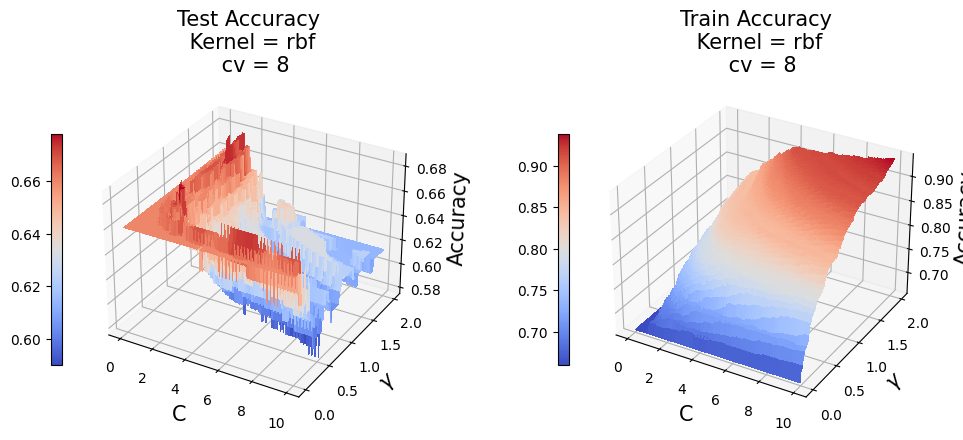

In [99]:
# cv = 8, kl = rbf, plot_surface and im_show

print('\n ########################################################################## \n')

best_score_cv8, best_hyperparams_cv8  = best_param_svm_search(X_train_sc,y_train,
                                                              8,hyper_params,c,gamma,
                                                              './figs/im_cv8','./figs/surf_cv8',
                                                              kl ="rbf",rnd_st=1234)
# cv is optimal if |best_test_score - best_train_score| is minimum

print("Highest test score found by GridSearchCV = " + str(best_score_cv8))
print("Best hyperparameters found by GridSearchCV = " + str(best_hyperparams_cv8))

# print("BestParam test score found from surface plot = " + str(best_test_sc_cv8))
# print("BestParam train score found from surface plot = " + str(best_train_sc_cv8))
# print("|bestParam_test_sc - bestParam_train_sc| =" + str(np.abs(best_test_sc_cv8 - best_train_sc_cv8)))


 ########################################################################## 

Fitting 9 folds for each of 200000 candidates, totalling 1800000 fits
Highest test score found by GridSearchCV = 0.688034188034188
Best hyperparameters found by GridSearchCV = {'C': 2.2600000000000002, 'gamma': 0.49}


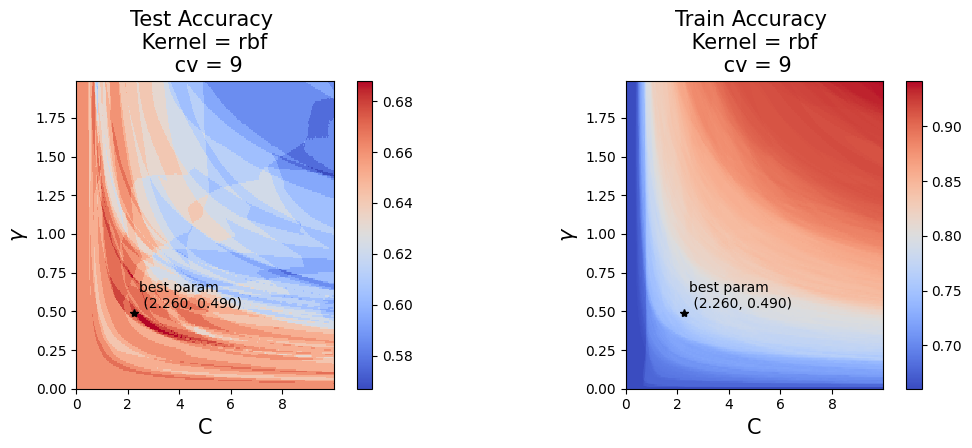

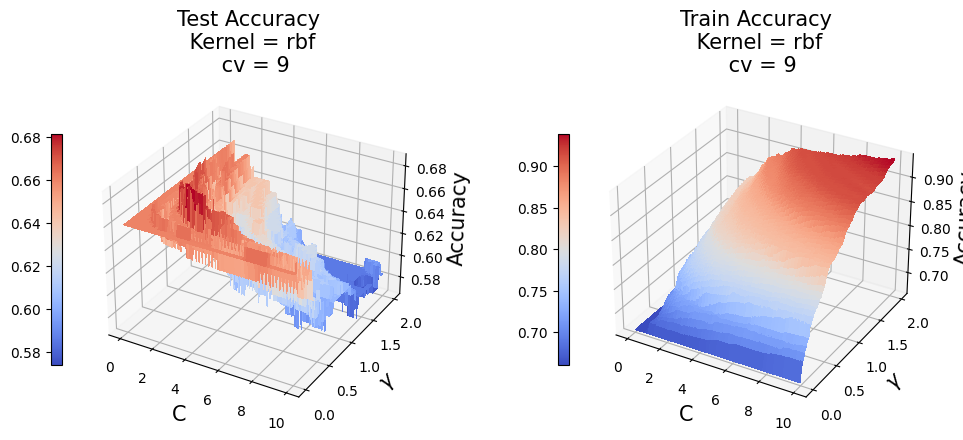

In [100]:
# cv = 9, kl = rbf, plot_surface and im_show

print('\n ########################################################################## \n')

best_score_cv9, best_hyperparams_cv9  = best_param_svm_search(X_train_sc,y_train,
                                                              9,hyper_params,c,gamma,
                                                              './figs/im_cv9','./figs/surf_cv9',
                                                              kl ="rbf",rnd_st=1234)
# cv is optimal if |best_test_score - best_train_score| is minimum

print("Highest test score found by GridSearchCV = " + str(best_score_cv9))
print("Best hyperparameters found by GridSearchCV = " + str(best_hyperparams_cv9))

# print("BestParam test score found from surface plot = " + str(best_test_sc_cv9))
# print("BestParam train score found from surface plot = " + str(best_train_sc_cv9))
# print("|bestParam_test_sc - bestParam_train_sc| =" + str(np.abs(best_test_sc_cv9 - best_train_sc_cv9)))


 ########################################################################## 

Fitting 10 folds for each of 200000 candidates, totalling 2000000 fits
Highest test score found by GridSearchCV = 0.6790909090909092
Best hyperparameters found by GridSearchCV = {'C': 1.48, 'gamma': 1.42}


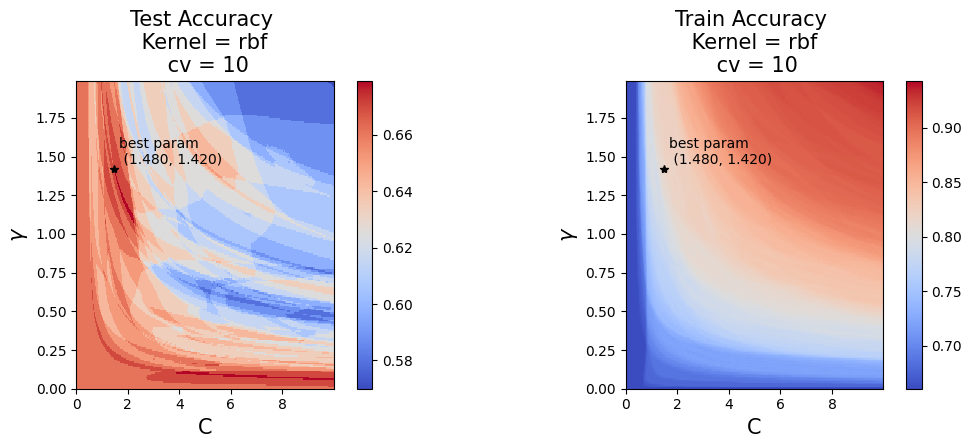

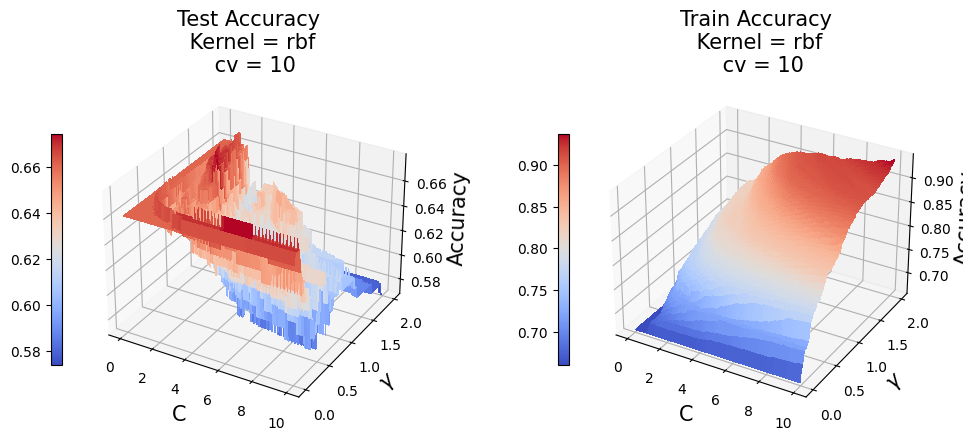

In [101]:
# cv = 10, kl = rbf, plot_surface and im_show

print('\n ########################################################################## \n')

best_score_cv10, best_hyperparams_cv10  = best_param_svm_search(X_train_sc,y_train,
                                                                10,hyper_params,c,gamma,
                                                                './figs/im_cv10','./figs/surf_cv10',
                                                                kl ="rbf",rnd_st=1234)
# cv is optimal if |best_test_score - best_train_score| is minimum

print("Highest test score found by GridSearchCV = " + str(best_score_cv10))
print("Best hyperparameters found by GridSearchCV = " + str(best_hyperparams_cv10))

# print("BestParam test score found from surface plot = " + str(best_test_sc_cv10))
# print("BestParam train score found from surface plot = " + str(best_train_sc_cv10))
# print("|bestParam_test_sc - bestParam_train_sc| =" + str(np.abs(best_test_sc_cv10 - best_train_sc_cv10)))

thresh: 0.5000, mcc: 0.0000, AUC test-set: 0.7560
[[ 0 16]
 [ 0 31]]
              precision    recall  f1-score   support

        -1.0       0.66      1.00      0.79        31
         1.0       0.00      0.00      0.00        16

    accuracy                           0.66        47
   macro avg       0.33      0.50      0.40        47
weighted avg       0.44      0.66      0.52        47

thresh: 0.3421, mcc: 0.3915, AUC test-set: 0.7560
[[ 6 10]
 [ 2 29]]
              precision    recall  f1-score   support

        -1.0       0.74      0.94      0.83        31
         1.0       0.75      0.38      0.50        16

    accuracy                           0.74        47
   macro avg       0.75      0.66      0.66        47
weighted avg       0.75      0.74      0.72        47

mcc on training = 0.429
threshold on training = 0.3421
 normal 
accuracy_CI_2 = [0.62   0.8693]
recall_CI_2 = [0.2366 0.5134]
precision_CI_2 = [0.6262 0.8738]
specificity_CI_2 = [0.8652 1.0057]
npv_CI_2 = [0.

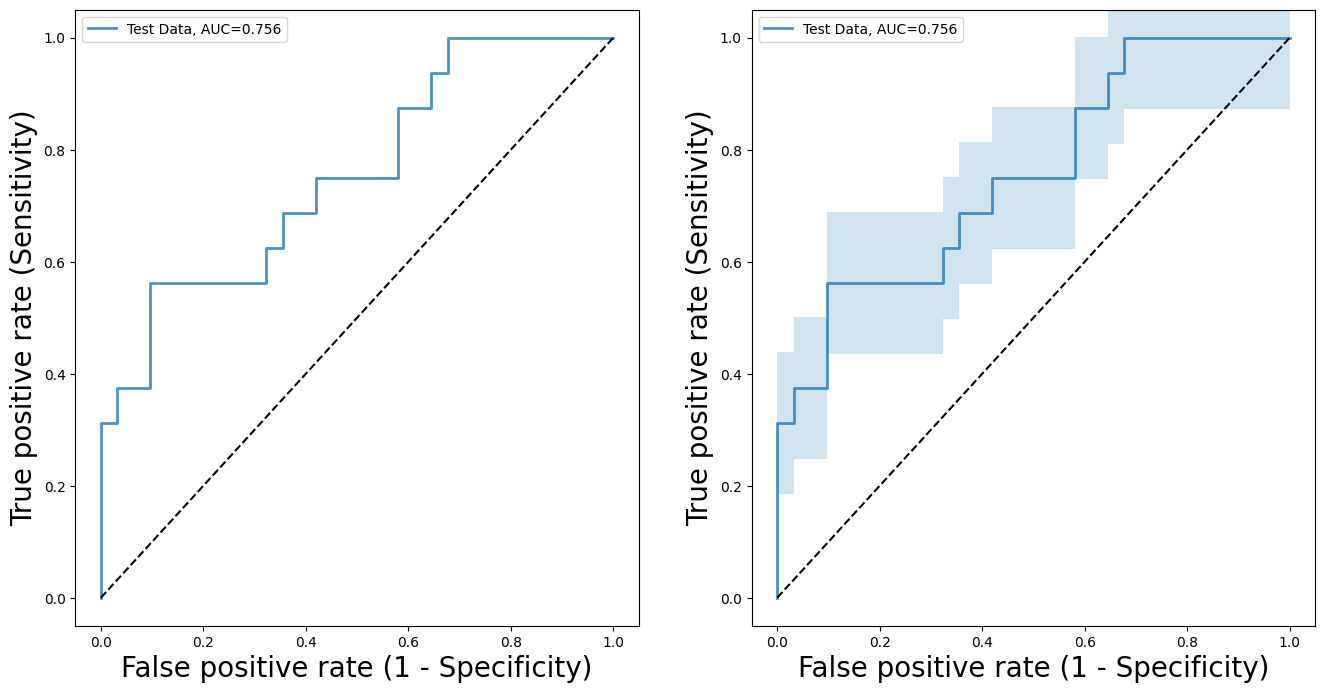

In [129]:
# cv = 2, kl = rbf

# 'MCC'
mcc_Opt_2,thr_Opt_2,y_pred_2,y_test_2,test_probs_2,cm_50_2,cm_Opt_2 = model_svm_predict(X_train_sc,y_train,
                                                                    X_test_sc,y_test,
                                                                    best_hyperparams_cv2,2,
                                                                    K_R_M = 'MCC',kl ="rbf")
print("mcc on training = " + str(mcc_Opt_2))
print("threshold on training = " + str(thr_Opt_2))


# confidence intervals for accuracy,recall,precision,specificity
y_pred_opt_2 = []
threshold = thr_Opt_2

y_pred_opt_2 = [1 if x>=threshold else -1 for x in test_probs_2]

print(' normal ')
bb_acc2_n = accuracy_normal(y_test_2, y_pred_opt_2)
bb_rec2_n = recall_normal(y_test_2, y_pred_opt_2)
bb_prec2_n = precision_normal(y_test_2, y_pred_opt_2)
bb_spec2_n = specificity_normal(y_test_2, y_pred_opt_2)
bb_npv2_n = npv_normal(y_test_2, y_pred_opt_2)

print("accuracy_CI_2 = " + str(bb_acc2_n))
print("recall_CI_2 = " + str(bb_rec2_n))
print("precision_CI_2 = " + str(bb_prec2_n))
print("specificity_CI_2 = " + str(bb_spec2_n))
print("npv_CI_2 = " + str(bb_npv2_n))

print(' wilson ')
bb_acc2 = accuracy_wilson(y_test_2, y_pred_opt_2)
bb_rec2 = recall_wilson(y_test_2, y_pred_opt_2)
bb_prec2 = precision_wilson(y_test_2, y_pred_opt_2)
bb_spec2 = specificity_wilson(y_test_2, y_pred_opt_2)
bb_npv2 = npv_wilson(y_test_2, y_pred_opt_2)

print("accuracy_CI_2 = " + str(bb_acc2))
print("recall_CI_2 = " + str(bb_rec2))
print("precision_CI_2 = " + str(bb_prec2))
print("specificity_CI_2 = " + str(bb_spec2))
print("npv_CI_2 = " + str(bb_npv2))

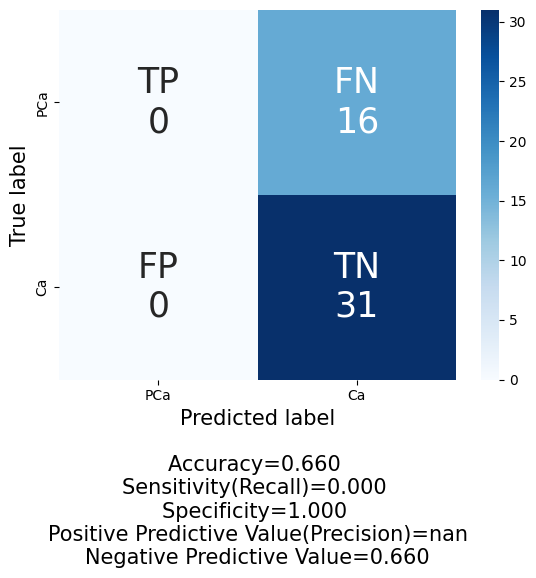

In [130]:
my_cm(cm_50_2)

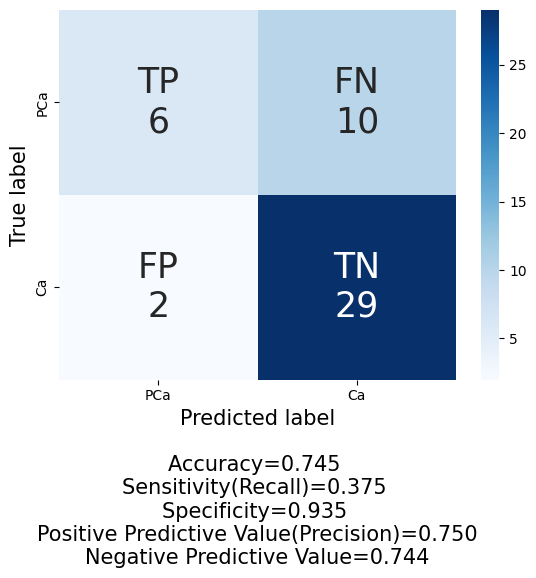

In [131]:
my_cm(cm_Opt_2)

thresh: 0.5000, mcc: 0.0000, AUC test-set: 0.7460
[[ 0 16]
 [ 0 31]]
              precision    recall  f1-score   support

        -1.0       0.66      1.00      0.79        31
         1.0       0.00      0.00      0.00        16

    accuracy                           0.66        47
   macro avg       0.33      0.50      0.40        47
weighted avg       0.44      0.66      0.52        47

thresh: 0.3273, mcc: 0.2435, AUC test-set: 0.7460
[[14  2]
 [20 11]]
              precision    recall  f1-score   support

        -1.0       0.85      0.35      0.50        31
         1.0       0.41      0.88      0.56        16

    accuracy                           0.53        47
   macro avg       0.63      0.61      0.53        47
weighted avg       0.70      0.53      0.52        47

mcc on training = 0.672
threshold on training = 0.3273
 normal 
accuracy_CI_3 = [0.3893 0.6746]
recall_CI_3 = [0.7805 0.9695]
precision_CI_3 = [0.2711 0.5525]
specificity_CI_3 = [0.2181 0.4916]
npv_CI_3 = [0.

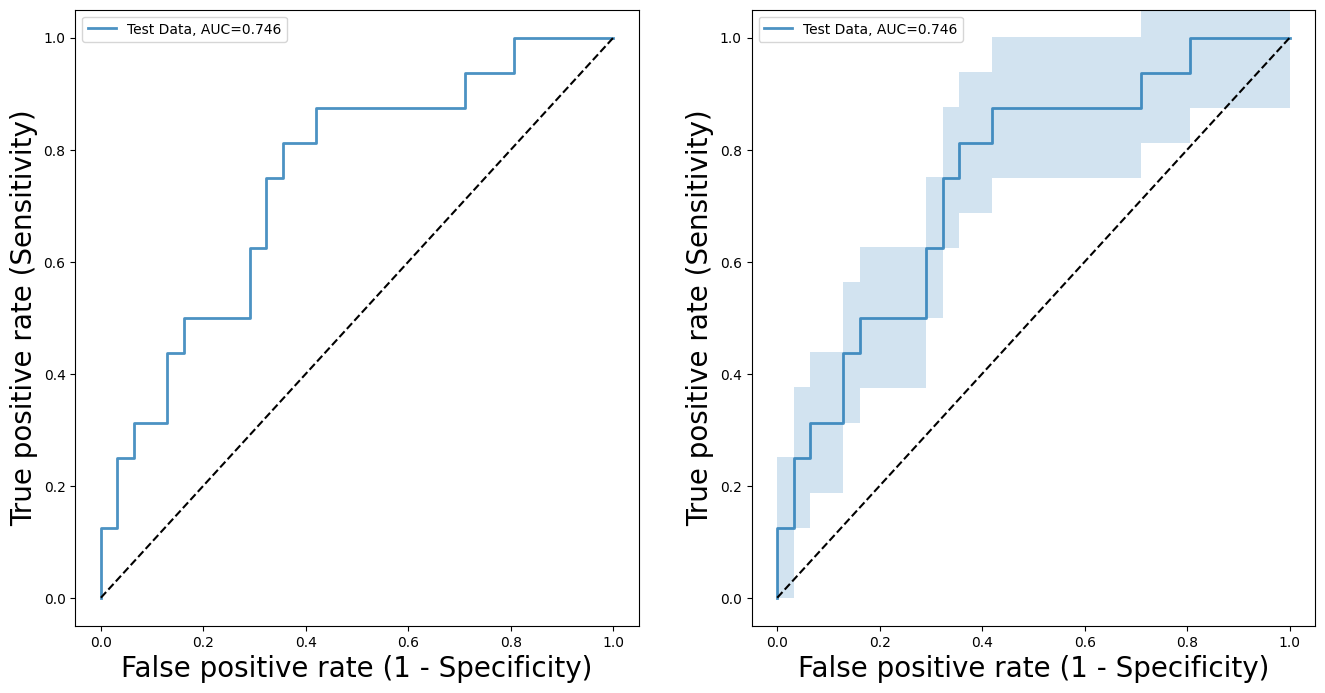

In [105]:
# cv = 3, kl = rbf

# 'MCC'
mcc_Opt_3,thr_Opt_3,y_pred_3,y_test_3,test_probs_3,cm_50_3,cm_Opt_3 = model_svm_predict(X_train_sc,y_train,
                                                                    X_test_sc,y_test,
                                                                    best_hyperparams_cv3,3,
                                                                    K_R_M = 'MCC',kl ="rbf")
print("mcc on training = " + str(mcc_Opt_3))
print("threshold on training = " + str(thr_Opt_3))


# confidence intervals for accuracy,recall,precision,specificity
y_pred_opt_3 = []
threshold = thr_Opt_3

y_pred_opt_3 = [1 if x>=threshold else -1 for x in test_probs_3]

print(' normal ')
bb_acc3_n = accuracy_normal(y_test_3, y_pred_opt_3)
bb_rec3_n = recall_normal(y_test_3, y_pred_opt_3)
bb_prec3_n = precision_normal(y_test_3, y_pred_opt_3)
bb_spec3_n = specificity_normal(y_test_3, y_pred_opt_3)
bb_npv3_n = npv_normal(y_test_3, y_pred_opt_3)

print("accuracy_CI_3 = " + str(bb_acc3_n))
print("recall_CI_3 = " + str(bb_rec3_n))
print("precision_CI_3 = " + str(bb_prec3_n))
print("specificity_CI_3 = " + str(bb_spec3_n))
print("npv_CI_3 = " + str(bb_npv3_n))

print(' wilson ')
bb_acc3 = accuracy_wilson(y_test_3, y_pred_opt_3)
bb_rec3 = recall_wilson(y_test_3, y_pred_opt_3)
bb_prec3 = precision_wilson(y_test_3, y_pred_opt_3)
bb_spec3 = specificity_wilson(y_test_3, y_pred_opt_3)
bb_npv3 = npv_wilson(y_test_3, y_pred_opt_3)

print("accuracy_CI_3 = " + str(bb_acc3))
print("recall_CI_3 = " + str(bb_rec3))
print("precision_CI_3 = " + str(bb_prec3))
print("specificity_CI_3 = " + str(bb_spec3))
print("npv_CI_3 = " + str(bb_npv3))

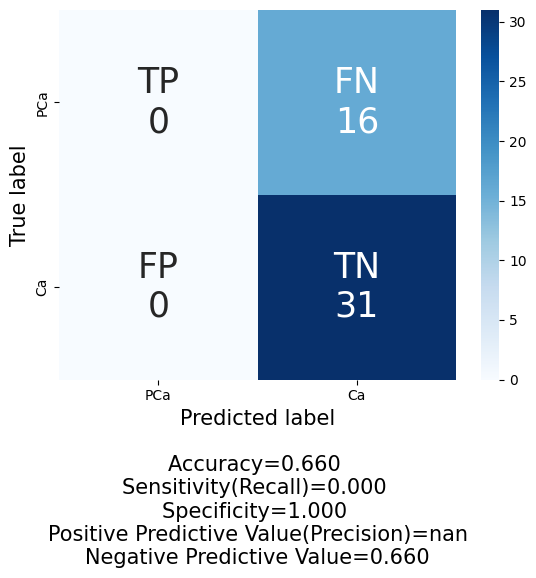

In [106]:
my_cm(cm_50_3)

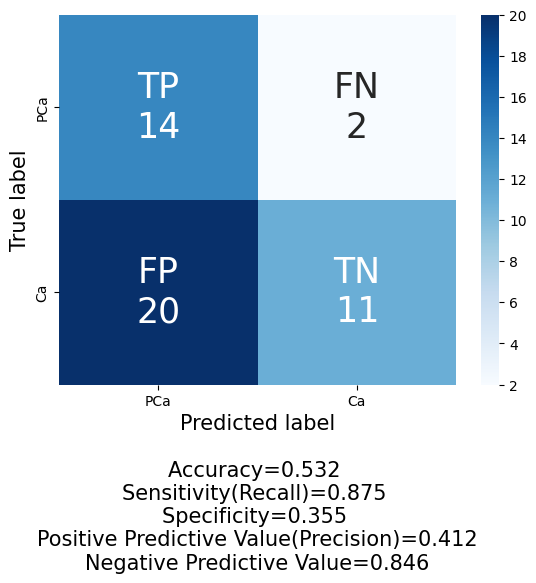

In [107]:
my_cm(cm_Opt_3)

thresh: 0.5000, mcc: 0.0000, AUC test-set: 0.7319
[[ 0 16]
 [ 0 31]]
              precision    recall  f1-score   support

        -1.0       0.66      1.00      0.79        31
         1.0       0.00      0.00      0.00        16

    accuracy                           0.66        47
   macro avg       0.33      0.50      0.40        47
weighted avg       0.44      0.66      0.52        47

thresh: 0.3547, mcc: 0.3915, AUC test-set: 0.7319
[[ 6 10]
 [ 2 29]]
              precision    recall  f1-score   support

        -1.0       0.74      0.94      0.83        31
         1.0       0.75      0.38      0.50        16

    accuracy                           0.74        47
   macro avg       0.75      0.66      0.66        47
weighted avg       0.75      0.74      0.72        47

mcc on training = 0.394
threshold on training = 0.3547
 normal 
accuracy_CI_4 = [0.62   0.8693]
recall_CI_4 = [0.2366 0.5134]
precision_CI_4 = [0.6262 0.8738]
specificity_CI_4 = [0.8652 1.0057]
npv_CI_4 = [0.

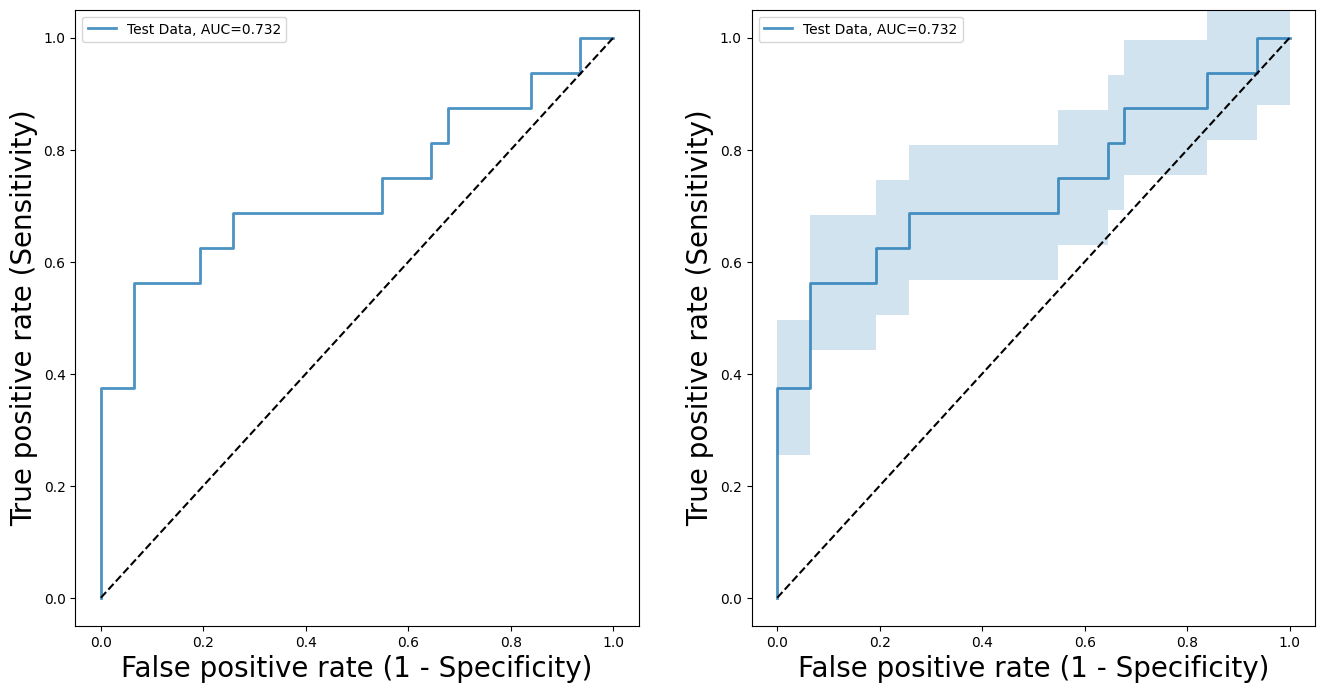

In [108]:
# cv = 4, kl = rbf

# 'MCC'
mcc_Opt_4,thr_Opt_4,y_pred_4,y_test_4,test_probs_4,cm_50_4,cm_Opt_4 = model_svm_predict(X_train_sc,y_train,
                                                                    X_test_sc,y_test,
                                                                    best_hyperparams_cv4,4,
                                                                    K_R_M = 'MCC',kl ="rbf")
print("mcc on training = " + str(mcc_Opt_4))
print("threshold on training = " + str(thr_Opt_4))

# confidence intervals for accuracy,recall,precision,specificity
y_pred_opt_4 = []
threshold = thr_Opt_4

y_pred_opt_4 = [1 if x>=threshold else -1 for x in test_probs_4]

print(' normal ')
bb_acc4_n = accuracy_normal(y_test_4, y_pred_opt_4)
bb_rec4_n = recall_normal(y_test_4, y_pred_opt_4)
bb_prec4_n = precision_normal(y_test_4, y_pred_opt_4)
bb_spec4_n = specificity_normal(y_test_4, y_pred_opt_4)
bb_npv4_n = npv_normal(y_test_4, y_pred_opt_4)

print("accuracy_CI_4 = " + str(bb_acc4_n))
print("recall_CI_4 = " + str(bb_rec4_n))
print("precision_CI_4 = " + str(bb_prec4_n))
print("specificity_CI_4 = " + str(bb_spec4_n))
print("npv_CI_4 = " + str(bb_npv4_n))

print(' wilson ')
bb_acc4 = accuracy_wilson(y_test_4, y_pred_opt_4)
bb_rec4 = recall_wilson(y_test_4, y_pred_opt_4)
bb_prec4 = precision_wilson(y_test_4, y_pred_opt_4)
bb_spec4 = specificity_wilson(y_test_4, y_pred_opt_4)
bb_npv4 = npv_wilson(y_test_4, y_pred_opt_4)

print("accuracy_CI_4 = " + str(bb_acc4))
print("recall_CI_4 = " + str(bb_rec4))
print("precision_CI_4 = " + str(bb_prec4))
print("specificity_CI_4 = " + str(bb_spec4))
print("npv_CI_4 = " + str(bb_npv4))

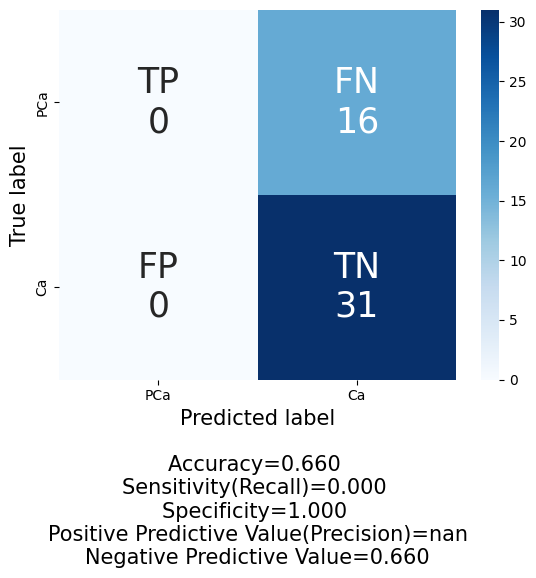

In [109]:
my_cm(cm_50_4)

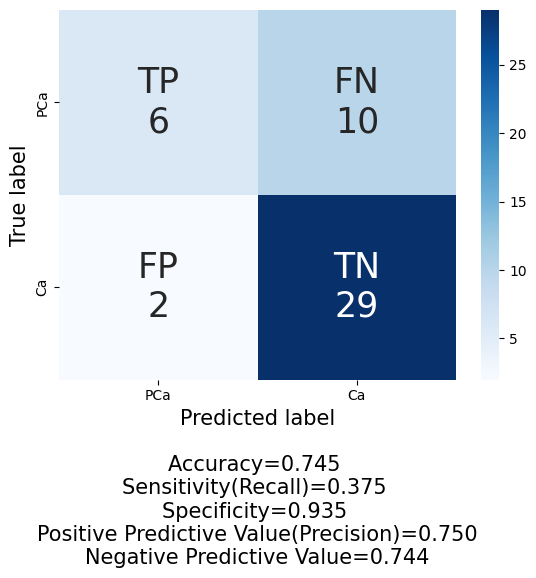

In [110]:
my_cm(cm_Opt_4)

thresh: 0.5000, mcc: 0.0000, AUC test-set: 0.7802
[[ 0 16]
 [ 0 31]]
              precision    recall  f1-score   support

        -1.0       0.66      1.00      0.79        31
         1.0       0.00      0.00      0.00        16

    accuracy                           0.66        47
   macro avg       0.33      0.50      0.40        47
weighted avg       0.44      0.66      0.52        47

thresh: 0.3448, mcc: 0.3367, AUC test-set: 0.7802
[[ 9  7]
 [ 7 24]]
              precision    recall  f1-score   support

        -1.0       0.77      0.77      0.77        31
         1.0       0.56      0.56      0.56        16

    accuracy                           0.70        47
   macro avg       0.67      0.67      0.67        47
weighted avg       0.70      0.70      0.70        47

mcc on training = 0.577
threshold on training = 0.3448
 normal 
accuracy_CI_5 = [0.5714 0.8329]
recall_CI_5 = [0.4207 0.7043]
precision_CI_5 = [0.4207 0.7043]
specificity_CI_5 = [0.6547 0.8937]
npv_CI_5 = [0.

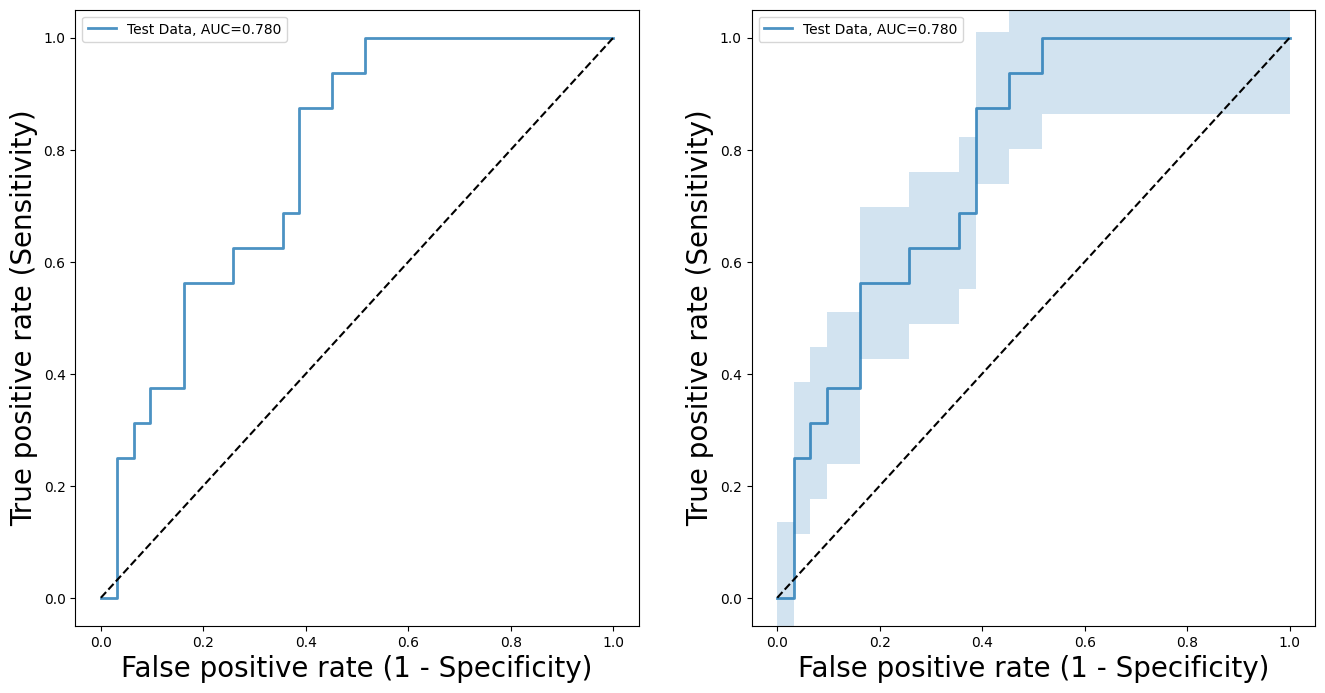

In [111]:
# cv = 5, kl = rbf

# 'MCC'
mcc_Opt_5,thr_Opt_5,y_pred_5,y_test_5,test_probs_5,cm_50_5,cm_Opt_5 = model_svm_predict(X_train_sc,y_train,
                                                                    X_test_sc,y_test,
                                                                    best_hyperparams_cv5,5,
                                                                    K_R_M = 'MCC',kl ="rbf")
print("mcc on training = " + str(mcc_Opt_5))
print("threshold on training = " + str(thr_Opt_5))

# confidence intervals for accuracy,recall,precision,specificity
y_pred_opt_5 = []
threshold = thr_Opt_5

y_pred_opt_5 = [1 if x>=threshold else -1 for x in test_probs_5]

print(' normal ')
bb_acc5_n = accuracy_normal(y_test_5, y_pred_opt_5)
bb_rec5_n = recall_normal(y_test_5, y_pred_opt_5)
bb_prec5_n = precision_normal(y_test_5, y_pred_opt_5)
bb_spec5_n = specificity_normal(y_test_5, y_pred_opt_5)
bb_npv5_n = npv_normal(y_test_5, y_pred_opt_5)

print("accuracy_CI_5 = " + str(bb_acc5_n))
print("recall_CI_5 = " + str(bb_rec5_n))
print("precision_CI_5 = " + str(bb_prec5_n))
print("specificity_CI_5 = " + str(bb_spec5_n))
print("npv_CI_5 = " + str(bb_npv5_n))

print(' wilson ')
bb_acc5 = accuracy_wilson(y_test_5, y_pred_opt_5)
bb_rec5 = recall_wilson(y_test_5, y_pred_opt_5)
bb_prec5 = precision_wilson(y_test_5, y_pred_opt_5)
bb_spec5 = specificity_wilson(y_test_5, y_pred_opt_5)
bb_npv5 = npv_wilson(y_test_5, y_pred_opt_5)

print("accuracy_CI_5 = " + str(bb_acc5))
print("recall_CI_5 = " + str(bb_rec5))
print("precision_CI_5 = " + str(bb_prec5))
print("specificity_CI_5 = " + str(bb_spec5))
print("npv_CI_5 = " + str(bb_npv5))

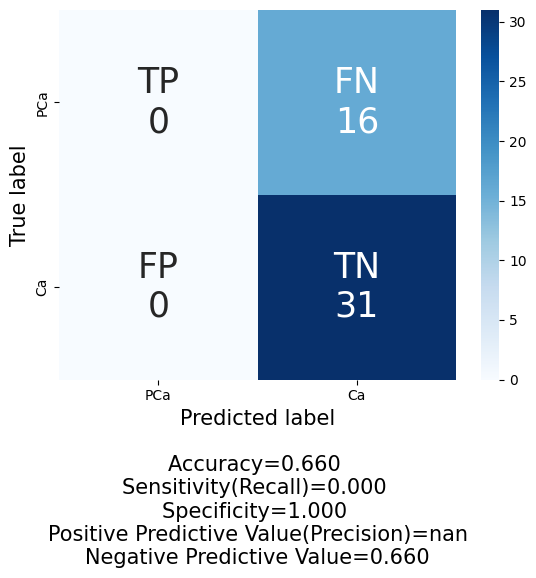

In [112]:
my_cm(cm_50_5)

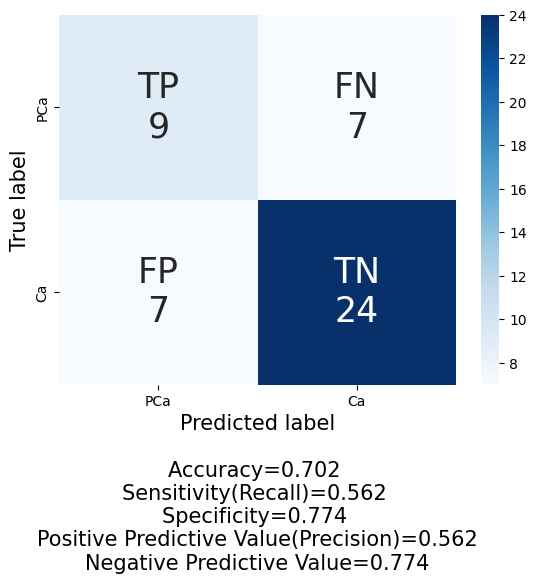

In [113]:
my_cm(cm_Opt_5)

thresh: 0.5000, mcc: 0.0000, AUC test-set: 0.8105
[[ 0 16]
 [ 0 31]]
              precision    recall  f1-score   support

        -1.0       0.66      1.00      0.79        31
         1.0       0.00      0.00      0.00        16

    accuracy                           0.66        47
   macro avg       0.33      0.50      0.40        47
weighted avg       0.44      0.66      0.52        47

thresh: 0.3440, mcc: 0.3751, AUC test-set: 0.8105
[[ 9  7]
 [ 6 25]]
              precision    recall  f1-score   support

        -1.0       0.78      0.81      0.79        31
         1.0       0.60      0.56      0.58        16

    accuracy                           0.72        47
   macro avg       0.69      0.68      0.69        47
weighted avg       0.72      0.72      0.72        47

mcc on training = 0.508
threshold on training = 0.344
 normal 
accuracy_CI_6 = [0.5955 0.8513]
recall_CI_6 = [0.4207 0.7043]
precision_CI_6 = [0.4599 0.7401]
specificity_CI_6 = [0.6935 0.9194]
npv_CI_6 = [0.6

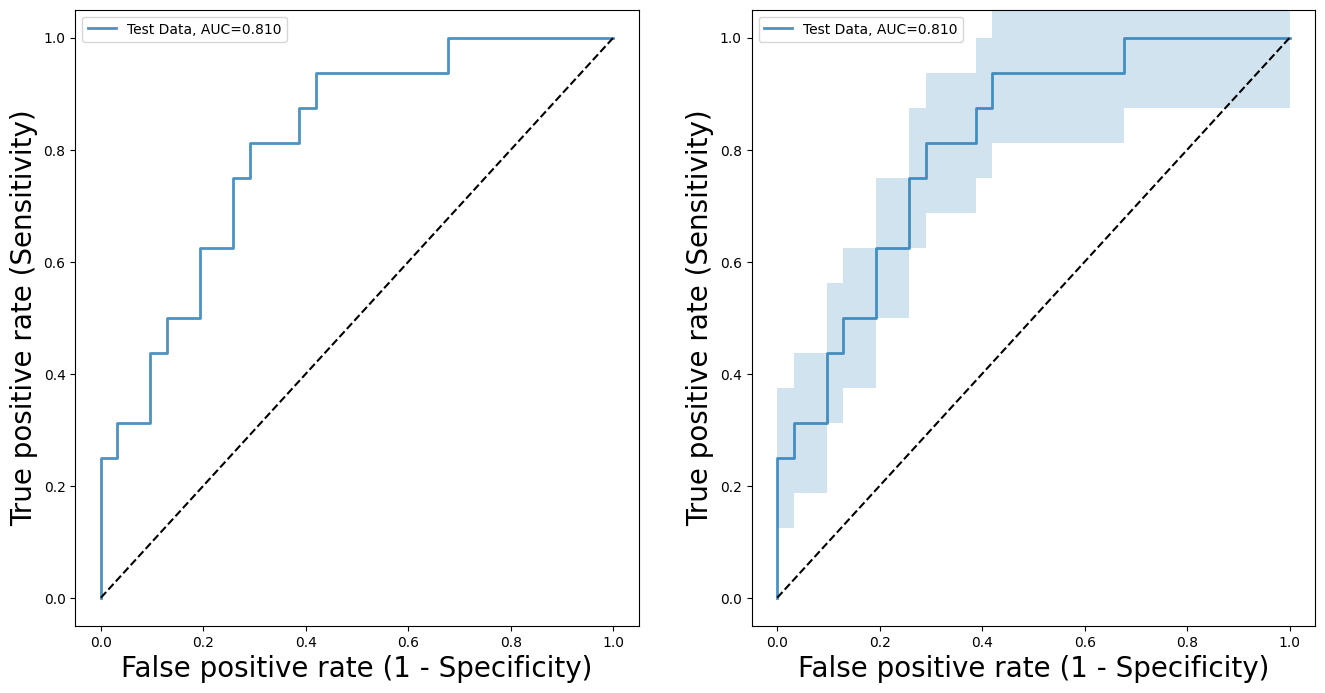

In [132]:
# cv = 6, kl = rbf

# 'MCC'
mcc_Opt_6,thr_Opt_6,y_pred_6,y_test_6,test_probs_6,cm_50_6,cm_Opt_6 = model_svm_predict(X_train_sc,y_train,
                                                                    X_test_sc,y_test,
                                                                    best_hyperparams_cv6,6,
                                                                    K_R_M = 'MCC',kl ="rbf")
print("mcc on training = " + str(mcc_Opt_6))
print("threshold on training = " + str(thr_Opt_6))

# confidence intervals for accuracy,recall,precision,specificity
y_pred_opt_6 = []
threshold = thr_Opt_6

y_pred_opt_6 = [1 if x>=threshold else -1 for x in test_probs_6]

print(' normal ')
bb_acc6_n = accuracy_normal(y_test_6, y_pred_opt_6)
bb_rec6_n = recall_normal(y_test_6, y_pred_opt_6)
bb_prec6_n = precision_normal(y_test_6, y_pred_opt_6)
bb_spec6_n = specificity_normal(y_test_6, y_pred_opt_6)
bb_npv6_n = npv_normal(y_test_6, y_pred_opt_6)

print("accuracy_CI_6 = " + str(bb_acc6_n))
print("recall_CI_6 = " + str(bb_rec6_n))
print("precision_CI_6 = " + str(bb_prec6_n))
print("specificity_CI_6 = " + str(bb_spec6_n))
print("npv_CI_6 = " + str(bb_npv6_n))

print(' wilson ')
bb_acc6 = accuracy_wilson(y_test_6, y_pred_opt_6)
bb_rec6 = recall_wilson(y_test_6, y_pred_opt_6)
bb_prec6 = precision_wilson(y_test_6, y_pred_opt_6)
bb_spec6 = specificity_wilson(y_test_6, y_pred_opt_6)
bb_npv6 = npv_wilson(y_test_6, y_pred_opt_6)

print("accuracy_CI_6 = " + str(bb_acc6))
print("recall_CI_6 = " + str(bb_rec6))
print("precision_CI_6 = " + str(bb_prec6))
print("specificity_CI_6 = " + str(bb_spec6))
print("npv_CI_6 = " + str(bb_npv6))

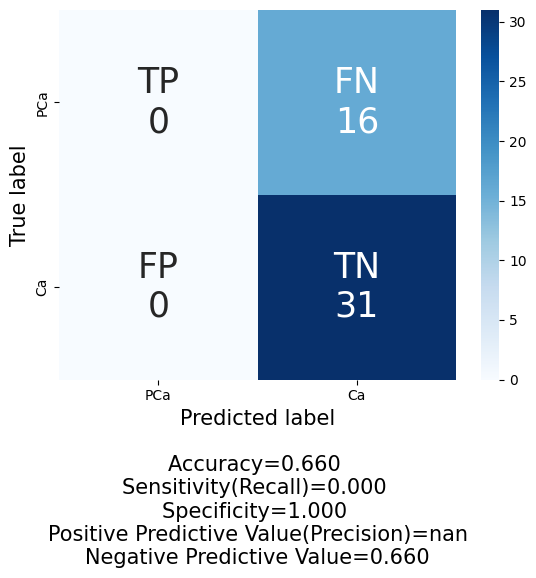

In [133]:
my_cm(cm_50_6)

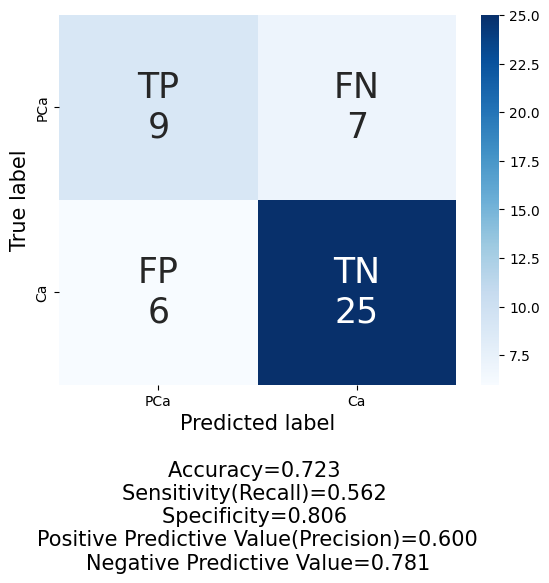

In [134]:
my_cm(cm_Opt_6)

thresh: 0.5000, mcc: 0.0000, AUC test-set: 0.7238
[[ 0 16]
 [ 0 31]]
              precision    recall  f1-score   support

        -1.0       0.66      1.00      0.79        31
         1.0       0.00      0.00      0.00        16

    accuracy                           0.66        47
   macro avg       0.33      0.50      0.40        47
weighted avg       0.44      0.66      0.52        47

thresh: 0.3358, mcc: 0.2147, AUC test-set: 0.7238
[[14  2]
 [21 10]]
              precision    recall  f1-score   support

        -1.0       0.83      0.32      0.47        31
         1.0       0.40      0.88      0.55        16

    accuracy                           0.51        47
   macro avg       0.62      0.60      0.51        47
weighted avg       0.69      0.51      0.49        47

mcc on training = 0.764
threshold on training = 0.3358
 normal 
accuracy_CI_7 = [0.3677 0.6536]
recall_CI_7 = [0.7805 0.9695]
precision_CI_7 = [0.2599 0.5401]
specificity_CI_7 = [0.1889 0.4562]
npv_CI_7 = [0.

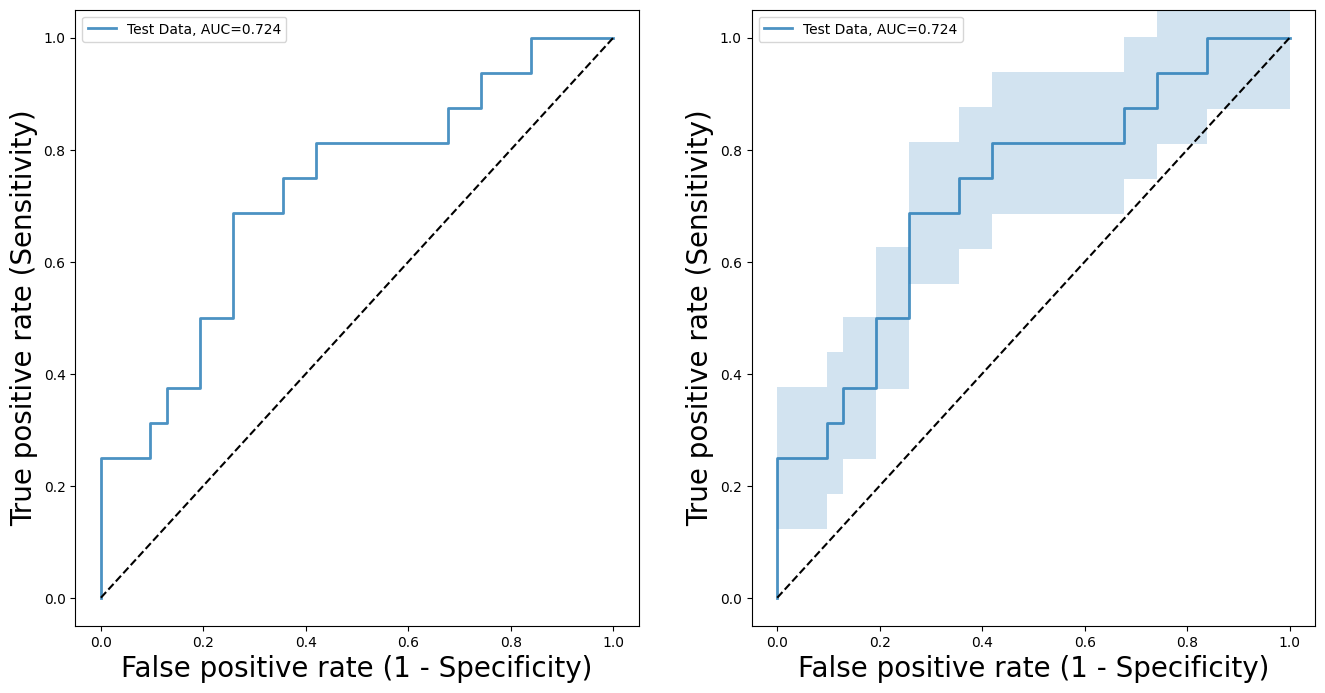

In [117]:
# cv = 7, kl = rbf

# 'MCC'
mcc_Opt_7,thr_Opt_7,y_pred_7,y_test_7,test_probs_7,cm_50_7,cm_Opt_7 = model_svm_predict(X_train_sc,y_train,
                                                                    X_test_sc,y_test,
                                                                    best_hyperparams_cv7,7,
                                                                    K_R_M = 'MCC',kl ="rbf")
print("mcc on training = " + str(mcc_Opt_7))
print("threshold on training = " + str(thr_Opt_7))

# confidence intervals for accuracy,recall,precision,specificity
y_pred_opt_7 = []
threshold = thr_Opt_7

y_pred_opt_7 = [1 if x>=threshold else -1 for x in test_probs_7]

print(' normal ')
bb_acc7_n = accuracy_normal(y_test_7, y_pred_opt_7)
bb_rec7_n = recall_normal(y_test_7, y_pred_opt_7)
bb_prec7_n = precision_normal(y_test_7, y_pred_opt_7)
bb_spec7_n = specificity_normal(y_test_7, y_pred_opt_7)
bb_npv7_n = npv_normal(y_test_7, y_pred_opt_7)

print("accuracy_CI_7 = " + str(bb_acc7_n))
print("recall_CI_7 = " + str(bb_rec7_n))
print("precision_CI_7 = " + str(bb_prec7_n))
print("specificity_CI_7 = " + str(bb_spec7_n))
print("npv_CI_7 = " + str(bb_npv7_n))

print(' wilson ')
bb_acc7 = accuracy_wilson(y_test_7, y_pred_opt_7)
bb_rec7 = recall_wilson(y_test_7, y_pred_opt_7)
bb_prec7 = precision_wilson(y_test_7, y_pred_opt_7)
bb_spec7 = specificity_wilson(y_test_7, y_pred_opt_7)
bb_npv7 = npv_wilson(y_test_7, y_pred_opt_7)

print("accuracy_CI_7 = " + str(bb_acc7))
print("recall_CI_7 = " + str(bb_rec7))
print("precision_CI_7 = " + str(bb_prec7))
print("specificity_CI_7 = " + str(bb_spec7))
print("npv_CI_7 = " + str(bb_npv7))

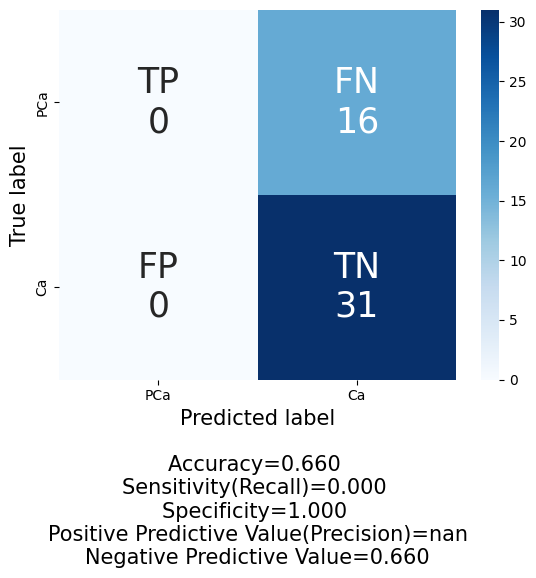

In [118]:
my_cm(cm_50_7)

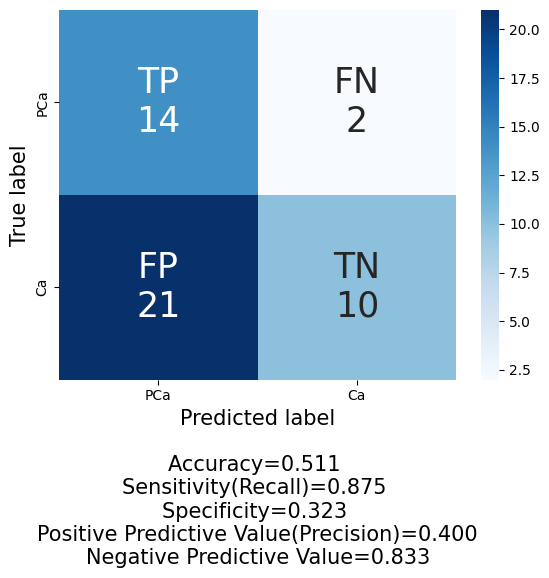

In [119]:
my_cm(cm_Opt_7)

thresh: 0.5000, mcc: 0.0000, AUC test-set: 0.7319
[[ 0 16]
 [ 0 31]]
              precision    recall  f1-score   support

        -1.0       0.66      1.00      0.79        31
         1.0       0.00      0.00      0.00        16

    accuracy                           0.66        47
   macro avg       0.33      0.50      0.40        47
weighted avg       0.44      0.66      0.52        47

thresh: 0.3152, mcc: 0.2716, AUC test-set: 0.7319
[[14  2]
 [19 12]]
              precision    recall  f1-score   support

        -1.0       0.86      0.39      0.53        31
         1.0       0.42      0.88      0.57        16

    accuracy                           0.55        47
   macro avg       0.64      0.63      0.55        47
weighted avg       0.71      0.55      0.55        47

mcc on training = 0.779
threshold on training = 0.3152
 normal 
accuracy_CI_8 = [0.4111 0.6953]
recall_CI_8 = [0.7805 0.9695]
precision_CI_8 = [0.2829 0.5655]
specificity_CI_8 = [0.2478 0.5263]
npv_CI_8 = [0.

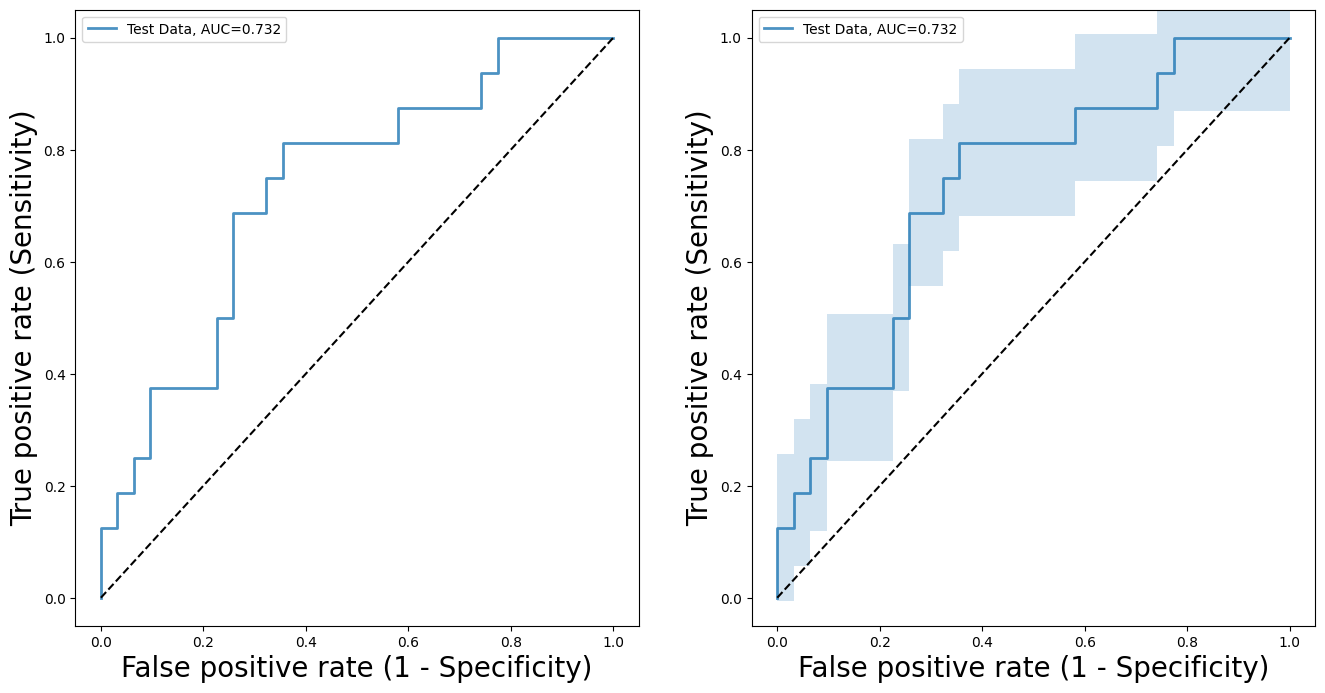

In [120]:
# cv = 8, kl = rbf

# 'MCC'
mcc_Opt_8,thr_Opt_8,y_pred_8,y_test_8,test_probs_8,cm_50_8,cm_Opt_8 = model_svm_predict(X_train_sc,y_train,
                                                                    X_test_sc,y_test,
                                                                    best_hyperparams_cv8,8,
                                                                    K_R_M = 'MCC',kl ="rbf")
print("mcc on training = " + str(mcc_Opt_8))
print("threshold on training = " + str(thr_Opt_8))

# confidence intervals for accuracy,recall,precision,specificity (test data)
y_pred_opt_8 = []
threshold = thr_Opt_8

y_pred_opt_8 = [1 if x>=threshold else -1 for x in test_probs_8]

# # confidence intervals for accuracy,recall,precision,specificity (ext data)
# val_pred_opt_8 = []
# threshold = thr_Opt_8

# val_pred_opt_8 = [1 if x>=threshold else -1 for x in val_probs_8]

print(' normal ')
bb_acc8_n = accuracy_normal(y_test_8, y_pred_opt_8)
bb_rec8_n = recall_normal(y_test_8, y_pred_opt_8)
bb_prec8_n = precision_normal(y_test_8, y_pred_opt_8)
bb_spec8_n = specificity_normal(y_test_8, y_pred_opt_8)
bb_npv8_n = npv_normal(y_test_8, y_pred_opt_8)

print("accuracy_CI_8 = " + str(bb_acc8_n))
print("recall_CI_8 = " + str(bb_rec8_n))
print("precision_CI_8 = " + str(bb_prec8_n))
print("specificity_CI_8 = " + str(bb_spec8_n))
print("npv_CI_8 = " + str(bb_npv8_n))

print(' wilson ')
bb_acc8 = accuracy_wilson(y_test_8, y_pred_opt_8)
bb_rec8 = recall_wilson(y_test_8, y_pred_opt_8)
bb_prec8 = precision_wilson(y_test_8, y_pred_opt_8)
bb_spec8 = specificity_wilson(y_test_8, y_pred_opt_8)
bb_npv8 = npv_wilson(y_test_8, y_pred_opt_8)

print("accuracy_CI_8 = " + str(bb_acc8))
print("recall_CI_8 = " + str(bb_rec8))
print("precision_CI_8 = " + str(bb_prec8))
print("specificity_CI_8 = " + str(bb_spec8))
print("npv_CI_8 = " + str(bb_npv8))

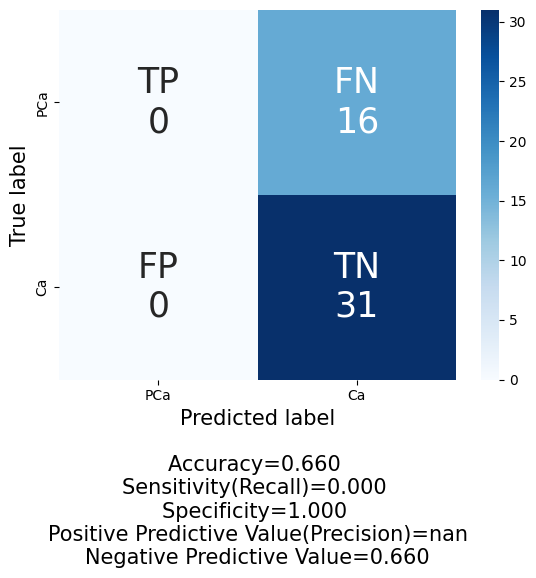

In [121]:
my_cm(cm_50_8)

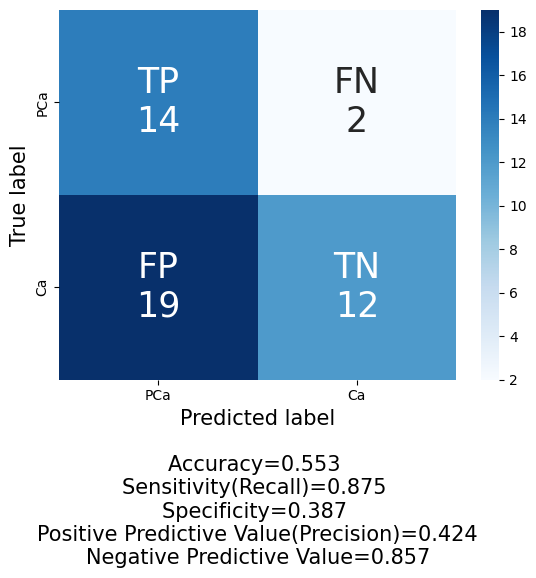

In [122]:
my_cm(cm_Opt_8)

thresh: 0.5000, mcc: 0.0000, AUC test-set: 0.7762
[[ 0 16]
 [ 0 31]]
              precision    recall  f1-score   support

        -1.0       0.66      1.00      0.79        31
         1.0       0.00      0.00      0.00        16

    accuracy                           0.66        47
   macro avg       0.33      0.50      0.40        47
weighted avg       0.44      0.66      0.52        47

thresh: 0.3416, mcc: 0.3367, AUC test-set: 0.7762
[[ 9  7]
 [ 7 24]]
              precision    recall  f1-score   support

        -1.0       0.77      0.77      0.77        31
         1.0       0.56      0.56      0.56        16

    accuracy                           0.70        47
   macro avg       0.67      0.67      0.67        47
weighted avg       0.70      0.70      0.70        47

mcc on training = 0.554
threshold on training = 0.3416
 normal 
accuracy_CI_9 = [0.5714 0.8329]
recall_CI_9 = [0.4207 0.7043]
precision_CI_9 = [0.4207 0.7043]
specificity_CI_9 = [0.6547 0.8937]
npv_CI_9 = [0.

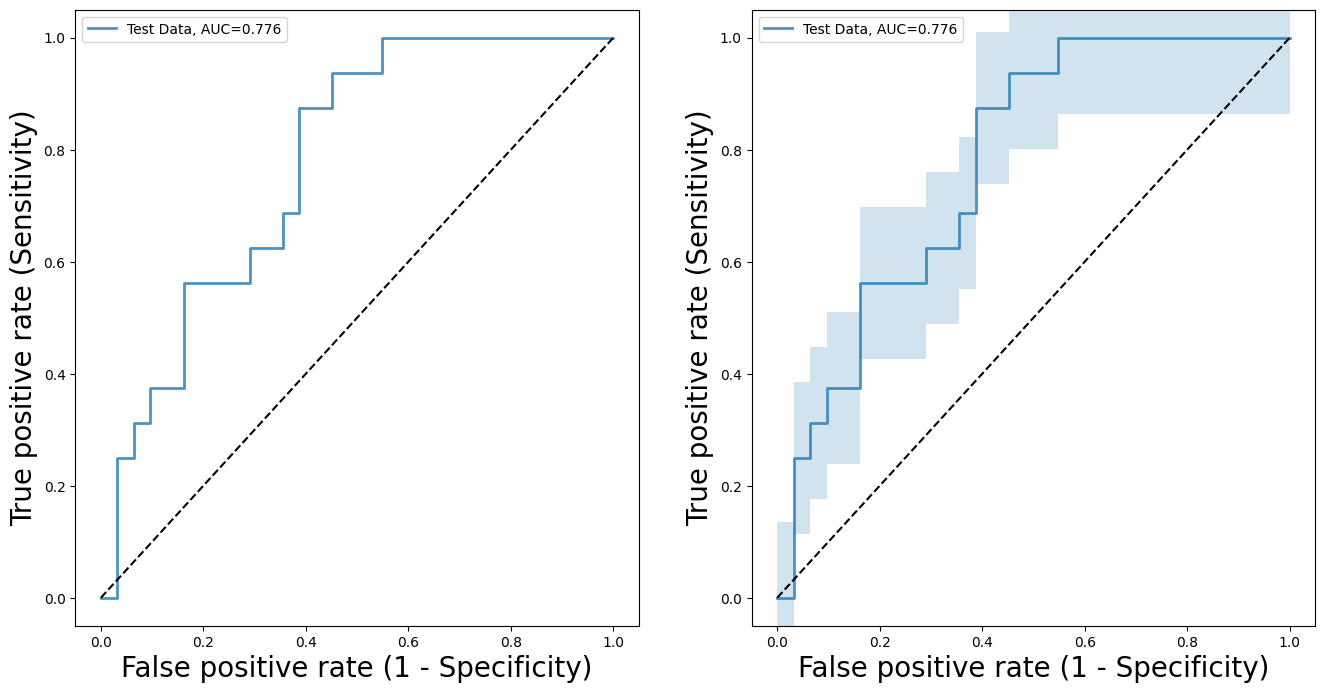

In [123]:
# cv = 9, kl = rbf

# 'MCC'
mcc_Opt_9,thr_Opt_9,y_pred_9,y_test_9,test_probs_9,cm_50_9,cm_Opt_9 = model_svm_predict(X_train_sc,y_train,
                                                                    X_test_sc,y_test,
                                                                    best_hyperparams_cv9,9,
                                                                    K_R_M = 'MCC',kl ="rbf")
print("mcc on training = " + str(mcc_Opt_9))
print("threshold on training = " + str(thr_Opt_9))

# confidence intervals for accuracy,recall,precision,specificity
y_pred_opt_9 = []
threshold = thr_Opt_9

y_pred_opt_9 = [1 if x>=threshold else -1 for x in test_probs_9]

print(' normal ')
bb_acc9_n = accuracy_normal(y_test_9, y_pred_opt_9)
bb_rec9_n = recall_normal(y_test_9, y_pred_opt_9)
bb_prec9_n = precision_normal(y_test_9, y_pred_opt_9)
bb_spec9_n = specificity_normal(y_test_9, y_pred_opt_9)
bb_npv9_n = npv_normal(y_test_9, y_pred_opt_9)

print("accuracy_CI_9 = " + str(bb_acc9_n))
print("recall_CI_9 = " + str(bb_rec9_n))
print("precision_CI_9 = " + str(bb_prec9_n))
print("specificity_CI_9 = " + str(bb_spec9_n))
print("npv_CI_9 = " + str(bb_npv9_n))

print(' wilson ')
bb_acc9 = accuracy_wilson(y_test_9, y_pred_opt_9)
bb_rec9 = recall_wilson(y_test_9, y_pred_opt_9)
bb_prec9 = precision_wilson(y_test_9, y_pred_opt_9)
bb_spec9 = specificity_wilson(y_test_9, y_pred_opt_9)
bb_npv9 = npv_wilson(y_test_9, y_pred_opt_9)

print("accuracy_CI_9 = " + str(bb_acc9))
print("recall_CI_9 = " + str(bb_rec9))
print("precision_CI_9 = " + str(bb_prec9))
print("specificity_CI_9 = " + str(bb_spec9))
print("npv_CI_9 = " + str(bb_npv9))

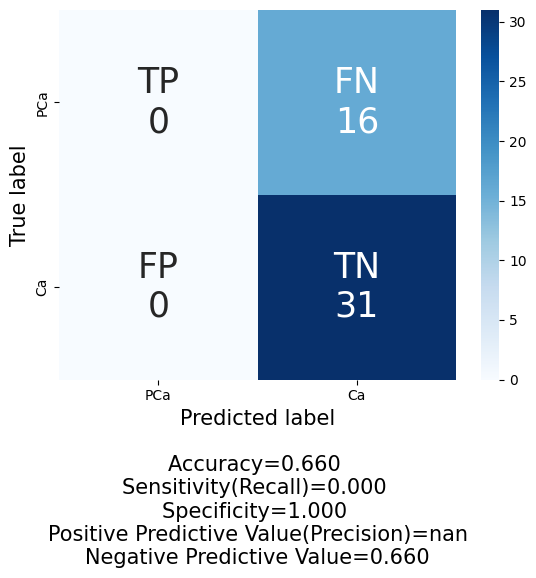

In [124]:
my_cm(cm_50_9)

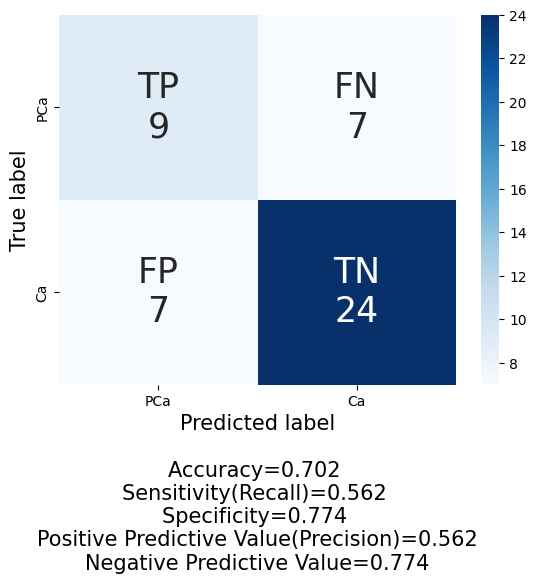

In [125]:
my_cm(cm_Opt_9)

thresh: 0.5000, mcc: 0.0000, AUC test-set: 0.7379
[[ 0 16]
 [ 0 31]]
              precision    recall  f1-score   support

        -1.0       0.66      1.00      0.79        31
         1.0       0.00      0.00      0.00        16

    accuracy                           0.66        47
   macro avg       0.33      0.50      0.40        47
weighted avg       0.44      0.66      0.52        47

thresh: 0.3078, mcc: 0.2992, AUC test-set: 0.7379
[[14  2]
 [18 13]]
              precision    recall  f1-score   support

        -1.0       0.87      0.42      0.57        31
         1.0       0.44      0.88      0.58        16

    accuracy                           0.57        47
   macro avg       0.65      0.65      0.57        47
weighted avg       0.72      0.57      0.57        47

mcc on training = 0.779
threshold on training = 0.3078
 normal 
accuracy_CI_10 = [0.4331 0.7158]
recall_CI_10 = [0.7805 0.9695]
precision_CI_10 = [0.2957 0.5793]
specificity_CI_10 = [0.2783 0.5604]
npv_CI_10 

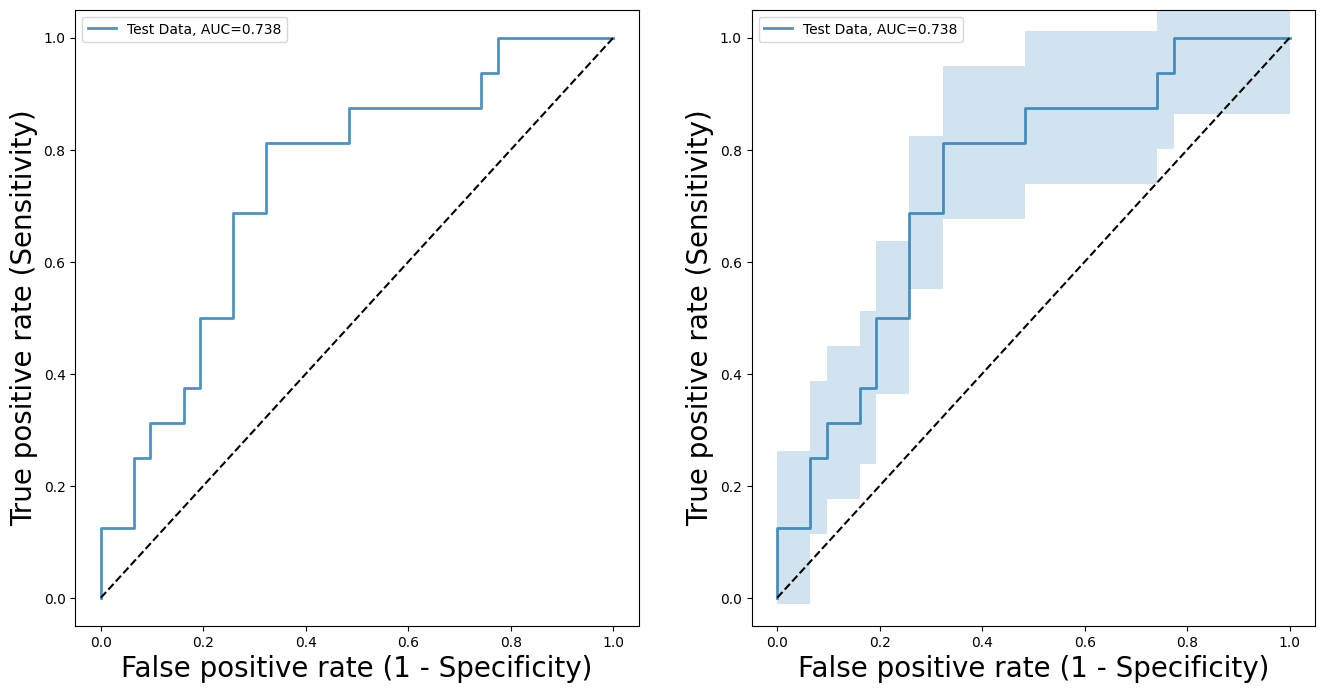

In [126]:
# cv = 10, kl = rbf

# 'MCC'
mcc_Opt_10,thr_Opt_10,y_pred_10,y_test_10,test_probs_10,cm_50_10,cm_Opt_10 = model_svm_predict(X_train_sc,y_train,
                                                                         X_test_sc,y_test,
                                                                    best_hyperparams_cv10,10,
                                                                    K_R_M = 'MCC',kl ="rbf")
print("mcc on training = " + str(mcc_Opt_10))
print("threshold on training = " + str(thr_Opt_10))

# confidence intervals for accuracy,recall,precision,specificity
y_pred_opt_10 = []
threshold = thr_Opt_10

y_pred_opt_10 = [1 if x>=threshold else -1 for x in test_probs_10]

print(' normal ')
bb_acc10_n = accuracy_normal(y_test_10, y_pred_opt_10)
bb_rec10_n = recall_normal(y_test_10, y_pred_opt_10)
bb_prec10_n = precision_normal(y_test_10, y_pred_opt_10)
bb_spec10_n = specificity_normal(y_test_10, y_pred_opt_10)
bb_npv10_n = npv_normal(y_test_10, y_pred_opt_10)

print("accuracy_CI_10 = " + str(bb_acc10_n))
print("recall_CI_10 = " + str(bb_rec10_n))
print("precision_CI_10 = " + str(bb_prec10_n))
print("specificity_CI_10 = " + str(bb_spec10_n))
print("npv_CI_10 = " + str(bb_npv10_n))

print(' wilson ')
bb_acc10 = accuracy_wilson(y_test_10, y_pred_opt_10)
bb_rec10 = recall_wilson(y_test_10, y_pred_opt_10)
bb_prec10 = precision_wilson(y_test_10, y_pred_opt_10)
bb_spec10 = specificity_wilson(y_test_10, y_pred_opt_10)
bb_npv10 = npv_wilson(y_test_10, y_pred_opt_10)

print("accuracy_CI_10 = " + str(bb_acc10))
print("recall_CI_10 = " + str(bb_rec10))
print("precision_CI_10 = " + str(bb_prec10))
print("specificity_CI_10 = " + str(bb_spec10))
print("npv_CI_10 = " + str(bb_npv10))

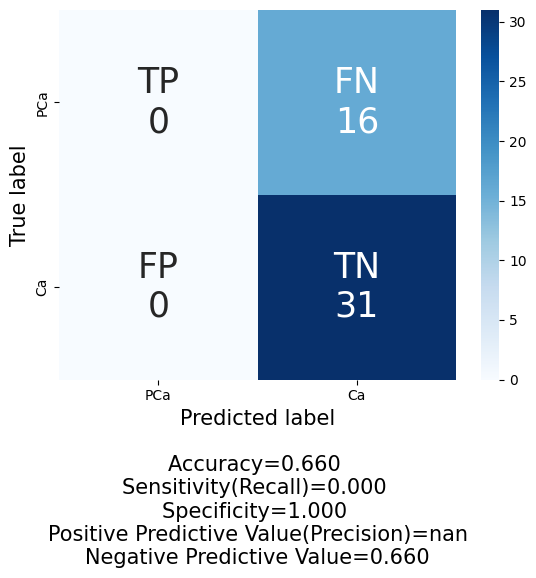

In [127]:
my_cm(cm_50_10)

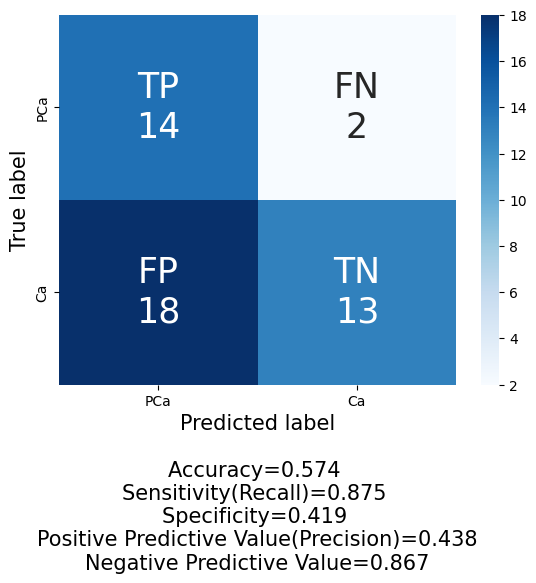

In [128]:
my_cm(cm_Opt_10)